# Unlocking Insights: Exploring Human Resources Dynamics

**Author:** Dan H.<br>
**Date Last Updated:** 19th March 2024<br>
**GitHub Repository:** https://github.com/DanPkg/HR-Analytics-Insights-Project


## Table of Contents:
* [Introduction](#Introduction)
* [Data Description](#Data-Description)
* [Project Objectives](#Project-Objectives)
* [Data Preparation](#Data-Preparation)
* [Initial Pre-processing Phase](#Initial-Pre-processing-Phase)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Overview of the Dataset](#Overview-of-the-Dataset)
    - [Descriptive Statistical Analysis](#Descriptive-Statistical-Analysis)
    - [General Correlation Analysis](#General-Correlation-Analysis)
    - [Visual EDA](#Visual-EDA)
        - [Distribution of Employment Status](#Distribution-of-Employment-Status)
        - [Termination Reasons Distribution](#Termination-Reasons-Distribution)
        - [Employee Distribution Across Departments](#Employee-Distribution-Across-Departments)
        - [Diversity Profile](#Diversity-Profile)
        - [Gender and Position-Based Salary Analysis](#Gender-and-Position-Based-Salary-Analysis)
        - [Overall Performance Score Distribution](#Overall-Performance-Score-Distribution)
        - [Recruitment Source Distribution and by Race Analysis](#Recruitment-Source-Distribution-and-by-Race-Analysis)
        - [Exploring Department and Manager-Level Performance Analysis](#Exploring-Department-and-Manager-Level-Performance-Analysis)
    - [Attrition Rate and Turnover Analysis](#Attrition-Rate-and-Turnover-Analysis)
        - [Attrition by Age and Age Bins](#Attrition-by-Age)
        - [Department Attrition Rate and Termination Reasons](#Department-Attrition-Rate-and-Termination-Reasons)
        - [Attrition Rate by Race Description](#Attrition-Rate-by-Race-Description)
        - [Race Attrition Rate impact on Total Workforce](#Race-Attrition-Rate-impact-on-Total-Workforce)
        - [Top 3 Termination Reasons by Race](#Top-3-Termination-Reasons-by-Race)
        - [Attrition Rate by Special Projects Count](#Attrition-Rate-by-Special-Projects-Count)
        - [Identifying the Peak Year of Terminations](#Identifying-the-Peak-Year-of-Terminations)
        - [Attrition Rate in Years of Service](#Attrition-Rate-in-Years-of-Service)
        - [Attrition-Rate-by-Salary-Bins](#Attrition-Rate-by-Salary-Bins)
        - [Attrition Rate by Manager](#Attrition-Rate-by-Manager)
        - [Gender-based Attrition Rate](#Gender-based-Attrition-Rate)
        - [Employee Satisfaction by Termination Status](#Employee-Satisfaction-by-Termination-Status)
        - [Attrition Rate by Martical Description](#Attrition-Rate-by-Martical-Description)
    - [Extending Correlation Analysis: A Deeper Dive](#Extending-Correlation-Analysis:-A-Deeper-Dive)
        - [Salary and EngagementSurvey](#Salary-and-EngagementSurvey)
        - [DaysLateLast30 and EngagementSurvey](#DaysLateLast30-and-EngagementSurvey)
        - [Salary and PerformanceScore analysis](#Salary-and-PerformanceScore-analysis)
        - [Salary and Employee Satisfaction analysis](#Salary-and-Employee-Satisfaction-analysis)
        - [Salary Distribution across Departments](#Salary-Distribution-across-Departments)
        - [Absences by Special Projects Count](#Absences-by-Special-Projects-Count)
        - [Special Projects Count and Performance Score](#Special-Projects-Count-and-Performance-Score)
* Final Pre-processing and Feature Engineering (*Next Update*)
    - Age Bins, Salary Bins, and Performance Score Encoding
    - Feature Selection with Random Forest
    - Standardisation
* Predictive-Modelling (*Next Update*)
* [Conclusion](#Conclusion)
    - [Summary of the analysis](#Summary-of-the-analysis)
    - [Interesting Key Findings](#Interesting-Key-Findings)
    - [Actionable Insights](#Actionable-Insights)

## Introduction

In this analysis, I explore a comprehensive human resources dataset covering various attributes like personal details (names, DOBs, age, gender, marital status) and employment specifics (date of hire, termination reasons, department, employment status, position title, pay rate, manager name, performance score). Recent additions include absences, most recent performance review date, and employee engagement score. My goal is to uncover interesting and actionable insights to enhance understanding of workforce dynamics and inform strategic decision-making.

## Data Description

The provided CSV dataset is a synthetic dataset generated to simulate human resources data within a fictitious company. It encompasses essential attributes for human resources analysis.

**Dataset Source:** [Kaggle - Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)


The attributes, key features, and variables essential for comprehensive workforce analysis include, but not limited to:

**Personal Details:**
* Names
* DOB
* Age
* Gender
* Marital Status
* RaceDesc

**Employment Specifics:**
* Date of Hire
* Date of Termination
* Reasons for Termination
* Department
* Employment Status (Active or Terminated)
* Position Title
* Pay Rate
* Manager Name 
* Recruitment Source
* Special Projects Count

**Performance and Engagement:**
* Performance Score
* Employee Satisfaction
* FromDiversityJobFairID - Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no

**Additional Metrics:**
* Absences
* Most Recent Performance Review Date

[Back to Top](#Table-of-Contents:)

## Project Objectives

Before starting my analysis, it's important to outline the objectives of the project. I have defined the goals and focus areas of my analysis. 

**The primary objectives include:**

* Analysing attrition rates within the company
* Identifying factors contributing to employee turnover
* Exploring trends and patterns in employee performance
* Assessing engagement levels and satisfaction among employees
* Assessing pay disparity within the organisation

**Other Questions to Explore:**

1. Is there any relationship between who a person works for and their performance score?
2. What is the overall diversity profile of the organisation?
3. What are our best recruiting sources if we want to ensure a diverse organisation?
4. Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
5. Are there areas of the company where pay is not equitable?

[Back to Top](#Table-of-Contents:)

***

## Data Preparation

In [1]:
# Import modules
import os

import pandas as pd
import numpy as np
import scipy.stats as stats

import re # regex
import missingno as msno # matrix for missing values

# Plotting.
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('future.no_silent_downcasting', True)

In [2]:
# Load the HR dataset into a dataframe.
df = pd.read_csv("/kaggle/input/human-resources-data-set/HRDataset_v14.csv", header=0, sep=',')

***

## Initial Pre-processing Phase
[Back to Top](#Table-of-Contents:)

#### Integrity - Basic Data Quality Checks

In [3]:
# Check for inifinite values np.inf.
numeric_df = df._get_numeric_data()
inf_count = np.isinf(numeric_df).values.sum()
print("Contains " + str(inf_count) + " infinite values") 

# Check for duplicate rows.
duplicate_rows = df.duplicated().sum()
print("Contains " + str(duplicate_rows) + " duplicate rows")

Contains 0 infinite values
Contains 0 duplicate rows


In [4]:
# Check for values that contain question mark.
print(f"Count of values with ?: {df.eq('?').sum().sum()}")

Count of values with ?: 0


In [5]:
# Function to check for leading and trailing spaces in an object column.
def check_leading_trailing_spaces(column):
    return column.str.strip().fillna('') != column.fillna('')

# Function to store columns with leading or trailing spaces in a Dictionary
def check_columns_for_spaces(df):
    columns_with_spaces = {}  # Dictionary to store columns.
    for col in df.select_dtypes(include='object').columns:
        has_spaces = check_leading_trailing_spaces(df[col])
        if has_spaces.any():  # Check if any leading or trailing spaces are found
            columns_with_spaces[col] = has_spaces.sum()  # Store the count of rows with spaces
    return columns_with_spaces

# Function to Trim columns with leading or trailing spaces.
def trim_columns(df, cols):
    for col in cols:
        df[col] = df[col].str.strip()

In [6]:
# Call the function to check for spaces in all object type columns.
columns_with_spaces = check_columns_for_spaces(df)

print("Columns with leading or trailing spaces and their counts:")
for col, count in columns_with_spaces.items():
    print(f"{col}: {count}")

Columns with leading or trailing spaces and their counts:
Employee_Name: 70
Position: 1
Sex: 135
Department: 209


#### Remove trailing spaces in object columns

In [7]:
# Iterate over each column name with leading or trailing spaces.
for col, count in columns_with_spaces.items():
    # Check for leading or trailing spaces in the current column.
    has_spaces = check_leading_trailing_spaces(df[col])
    # Filter rows with leading or trailing spaces in the current column.
    rows_with_spaces = df[has_spaces]
    
    # Print column name.
    print(f"Sample of Rows with leading or trailing spaces in '{col}' column:")
    if not rows_with_spaces.empty:
        print(rows_with_spaces[col].head(3))
    else:
        print("No rows with leading or trailing spaces found in this column.")
    print()  # Add an empty line for separation between columns.

Sample of Rows with leading or trailing spaces in 'Employee_Name' column:
1    Ait Sidi, Karthikeyan   
4            Anderson, Carol 
5           Anderson, Linda  
Name: Employee_Name, dtype: object

Sample of Rows with leading or trailing spaces in 'Position' column:
249    Data Analyst 
Name: Position, dtype: object

Sample of Rows with leading or trailing spaces in 'Sex' column:
0    M 
1    M 
7    M 
Name: Sex, dtype: object

Sample of Rows with leading or trailing spaces in 'Department' column:
0    Production       
2    Production       
3    Production       
Name: Department, dtype: object



In [8]:
# Call the function to Trim columns.
trim_columns(df, columns_with_spaces)

# Call the function to check for spaces again.
columns_with_spaces = check_columns_for_spaces(df)

# Verification - Check if any leading or trailing spaces remain after trimming.
verification_result = not columns_with_spaces
print("Verification - Columns contain no leading or trailing spaces:", verification_result)

Verification - Columns contain no leading or trailing spaces: True


#### Handling Two-Digit Year (DOB) Ambiguity in CSV Dataset

**Note:** The csv dataset contains 2-year digits, as well as 4-year digits.
Pandas is attributing 2 digit years with 2000 century.

Specifically values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

E.g. 11/1/65 becomes 11/1/2065 after converting to date column.
https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year

To overcome this in this particular case, I make an assumption and append 19 to those specific entries using a custom Function.

In [9]:
# Filter rows where 'DOB' has length 8.
dob_2_digit_years = df[df['DOB'].str.len() == 8]

# Select a random instance from the filtered Dataframe.
random_test_instance = dob_2_digit_years.sample(random_state=42) # Use a fixed random state for reproducibility.

# Test instance.
random_test_instance_index = random_test_instance.index[0]
dob_value = random_test_instance['DOB'].iloc[0]
print(f'DOB value on test instance (index={random_test_instance_index}):', dob_value)

DOB value on test instance (index=290): 10/10/68


In [10]:
dob_test = df.copy()

dob_test["DOB"] = pd.to_datetime(dob_test['DOB'], format='%m/%d/%y', errors='coerce')
dob_test['DOB'].to_csv('dob.csv', index=False, header=['DOB'])
print("Inspect dob.csv export for confirmation of issue.\n")

# Extract year component and find min max of Year.
dob_test['Year'] = dob_test['DOB'].dt.year
year_min = dob_test['Year'].min()
year_max = dob_test['Year'].max()
print(f"Range of years: {year_min} to {year_max}\n")

# Calculate age for each employee with this issue.
current_year = pd.Timestamp.now().year
dob_test['Age'] = current_year - dob_test['Year']
print(f"Average age of employee with issue: {dob_test['Age'].mean():.0f}\n")

Inspect dob.csv export for confirmation of issue.

Range of years: 1969 to 2068

Average age of employee with issue: 32



In [11]:
# Define a function to parse dates.
def parse_date(date_str):

    # This retrieves all characters of the string after the last forward slash.
    year_str = date_str.split('/')[-1]

    # If the year is only 2 digits, append '19' or '20' to it 
    if len(year_str) == 2:            
        
        current_year = datetime.now().year
        if int(year_str) <= current_year % 100:         
            # Append '20' if the year is less than or equal to the last two digits of the current year (24) 
            # e.g. DOB is 2006, assuming person is 18 years old not 118.
            date_str = date_str[:-2] + '20' + date_str[-2:]
        else:
            # Append the string '19' to represent the 20th century.
            # This retrieves the date up until last two digits, appends 19 then retrieves last 
            # two characters of the string, which represent the two-digit year
            date_str = date_str[:-2] + '19' + date_str[-2:]            
        
    try:
        # Attempt to parse the date assuming a month/day/year format
        return datetime.strptime(date_str, '%m/%d/%Y').date()
    except ValueError:
        pass
    try:
        # Attempt to parse the date with a different format
        return datetime.strptime(date_str, '%m/%d/%y').date()
    except ValueError:
        pass
    
    # If parsing fails, return None
    return None

#### Testing and Confirming parsing dates using custom function

In [12]:
# Copy original dataframe for testing purposes.
parse_date_df_test = df.copy()

# Apply the parse_date function to the 'DOB' column
parse_date_df_test['Parsed_DOB'] = parse_date_df_test['DOB'].apply(parse_date)

# Extract year, month, and day into separate columns
parse_date_df_test[['Year', 'Month', 'Day']] = pd.DataFrame([(d.year, d.month, d.day) if d else (None, None, None) for d in parse_date_df_test['Parsed_DOB']])

In [13]:
# Test function to print range of years and average age.
def test_dob_parsing(df):
    
    # Find min max of Year
    year_min = parse_date_df_test['Year'].min()
    year_max = parse_date_df_test['Year'].max()
    print(f"Range of years: {year_min} to {year_max}\n")

    # Calculate average age for employees.
    current_year = pd.Timestamp.now().year
    parse_date_df_test['Age'] = current_year - parse_date_df_test['Year']
    print(f"Average age of employee with issue rectified: {parse_date_df_test['Age'].mean():.0f}\n")

In [14]:
# Confirm parsing success.
test_dob_parsing(parse_date_df_test)

# Display the test case.
parsed_dob_value = parse_date_df_test.loc[random_test_instance_index, 'Parsed_DOB'].strftime('%m/%d/%Y')
print("Parsed_DOB value on test instance:", parsed_dob_value)

Range of years: 1951 to 1992

Average age of employee with issue rectified: 45

Parsed_DOB value on test instance: 10/10/1968


#### Apply parse date function on original dataframe

In [15]:
# Apply the parse_date function to the 'DOB' column
df['Parsed_DOB'] = df['DOB'].apply(parse_date)

# Extract year, month, and day into separate columns
df[['Year', 'Month', 'Day']] = pd.DataFrame([(d.year, d.month, d.day) if d else (None, None, None) for d in df['Parsed_DOB']])

# Display the dataframe.
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Parsed_DOB,Year,Month,Day
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,4.60,5,0,1/17/2019,0,1,1983-07-10,1983,7,10
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.96,3,6,2/24/2016,0,17,1975-05-05,1975,5,5
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3.02,3,0,5/15/2012,0,3,1988-09-19,1988,9,19
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,4.84,5,0,1/3/2019,0,15,1988-09-27,1988,9,27
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,5.00,4,0,2/1/2016,0,2,1989-09-08,1989,9,8


In [16]:
# Confirm issue addressed on original dataframe.
test_dob_parsing(df)

# Confirm test instance applied.
parsed_dob_value = df.loc[random_test_instance_index, 'Parsed_DOB'].strftime('%m/%d/%Y')
print("Parsed_DOB value on test instance:", parsed_dob_value)

Range of years: 1951 to 1992

Average age of employee with issue rectified: 45

Parsed_DOB value on test instance: 10/10/1968


#### Calculate and Add Age attribute to Dataframe

In [17]:
# Calculate age for each employee.
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year']
df[['Age', 'Parsed_DOB']].sample()

,Age,Parsed_DOB
236,39,1985-01-07


***

## Exploratory Data Analysis (EDA)
[Back to Top](#Table-of-Contents:)

### Overview of the Dataset

In [18]:
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Parsed_DOB,Year,Month,Day,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,1/17/2019,0,1,1983-07-10,1983,7,10,41
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,3,6,2/24/2016,0,17,1975-05-05,1975,5,5,49
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3,0,5/15/2012,0,3,1988-09-19,1988,9,19,36


In [19]:
df.sample(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Parsed_DOB,Year,Month,Day,Age
266,"Stanford,Barbara M",10278,0,2,0,1,5,3,0,47961,...,4,0,2/7/2019,0,9,1982-08-25,1982,8,25,42
256,"Sloan, Constance",10095,0,0,0,5,5,3,0,63878,...,4,0,4/2/2015,0,20,1987-11-25,1987,11,25,37
216,"Perry, Shakira",10171,0,0,0,5,5,3,0,45998,...,4,0,5/13/2014,0,5,1986-07-20,1986,7,20,38


In [20]:
# Inspect non-numeric columns.
df.select_dtypes(include=['object']).head(3)

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date,Parsed_DOB
0,"Adinolfi, Wilson K",Production Technician I,MA,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,1/17/2019,1983-07-10
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,2/24/2016,1975-05-05
2,"Akinkuolie, Sarah",Production Technician II,MA,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,5/15/2012,1988-09-19


In [21]:
# Print instance and column counts.
print(f"HR dataset contains: \nRows: \t\t{df.shape[0]}")
print(f"Columns: \t{df.shape[1]}") 

HR dataset contains: 
Rows: 		311
Columns: 	41


In [22]:
# List the data types of each attribute.
print(df.dtypes.sort_values())

Age                             int64
EmpSatisfaction                 int64
Day                             int64
SpecialProjectsCount            int64
DaysLateLast30                  int64
Absences                        int64
Zip                             int64
Year                            int64
PositionID                      int64
Termd                           int64
Month                           int64
FromDiversityJobFairID          int64
PerfScoreID                     int64
DeptID                          int64
EmpStatusID                     int64
GenderID                        int64
MaritalStatusID                 int64
MarriedID                       int64
EmpID                           int64
Salary                          int64
EngagementSurvey              float64
ManagerID                     float64
RecruitmentSource              object
Parsed_DOB                     object
LastPerformanceReview_Date     object
PerformanceScore               object
Employee_Nam

In [23]:
missing_counts = df.isna().sum()

# Display only attributes with missing values.
missing_counts_filtered = missing_counts[missing_counts > 0]
print(f"Missing values:\n{missing_counts_filtered}")

Missing values:
DateofTermination    207
ManagerID              8
dtype: int64


<Axes: >

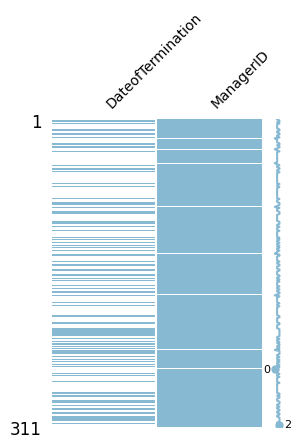

In [24]:
# Missingno matrix - positional information of the missing values.
msno.matrix(df[['DateofTermination', 'ManagerID']], figsize=(3,4), fontsize=10,
            color=(135/255, 185/255, 210/255)) # Tuple of RGB colors.

* The date of termination missing values are spread throughout the dataset. Missing At Random.

In [25]:
# Calculate Attrition Rate
total_employees = df.shape[0]
print(f"Total Employees: {total_employees}")

total_terminated = df[df['EmploymentStatus'] != 'Active'].shape[0]
print(f"Total Terminated: {total_terminated}\n")

attrition_rate = (total_terminated / total_employees) * 100
print(f"ATTRITION RATE: {attrition_rate:.2f}%")

Total Employees: 311
Total Terminated: 104

ATTRITION RATE: 33.44%


***

### Descriptive Statistical Analysis
[Back to Top](#Table-of-Contents:)

#### Summary Statistics

In [26]:
# Summary statistics of all numerical attributes.
df.describe(include='number')

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Year,Month,Day,Age
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942,1978.591640,6.659164,14.971061,45.408360
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596,8.870236,3.202757,8.734939,8.870236
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000,1951.000000,1.000000,1.000000,32.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000,1973.000000,4.000000,7.000000,38.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000,1980.000000,7.000000,15.000000,44.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000,1986.000000,9.000000,22.000000,51.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000,1992.000000,12.000000,31.000000,73.000000


In [27]:
# Exclude the column names containing ID.
columns_to_exclude = [col for col in df.columns if 'ID' in col]

# Drop the columns.
filtered_df = df.drop(columns=columns_to_exclude)

# Use describe() on the filtered dataframe.
describe_no_id = filtered_df.describe(include='number')

# Display summary statistics.
describe_no_id

,Salary,Termd,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Year,Month,Day,Age
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,69020.684887,0.334405,6555.482315,4.110000,3.890675,1.218650,0.414791,10.237942,1978.591640,6.659164,14.971061,45.408360
std,25156.636930,0.472542,16908.396884,0.789938,0.909241,2.349421,1.294519,5.852596,8.870236,3.202757,8.734939,8.870236
min,45046.000000,0.000000,1013.000000,1.120000,1.000000,0.000000,0.000000,1.000000,1951.000000,1.000000,1.000000,32.000000
25%,55501.500000,0.000000,1901.500000,3.690000,3.000000,0.000000,0.000000,5.000000,1973.000000,4.000000,7.000000,38.000000
50%,62810.000000,0.000000,2132.000000,4.280000,4.000000,0.000000,0.000000,10.000000,1980.000000,7.000000,15.000000,44.000000
75%,72036.000000,1.000000,2355.000000,4.700000,5.000000,0.000000,0.000000,15.000000,1986.000000,9.000000,22.000000,51.000000
max,250000.000000,1.000000,98052.000000,5.000000,5.000000,8.000000,6.000000,20.000000,1992.000000,12.000000,31.000000,73.000000


* **EngagementSurvey** and **EmpSatisfaction** have std deviations of approx. 0.789 and 0.909, respectively. Given the scale ranges from 1 to 5 for both, these suggest a moderate level of variability in responses. 

* **DaysLateLast30** has a std deviation of approx. 1.295, indicating a moderate degree of variability in punctuality among employees

* **SpecialProjectsCount** and **Absences** have std deviations of approx. 1.219 and 5.853, respectively. These figures imply a noteworthy degree of variability in the number of special projects worked on and absences taken by employees. 

* Given the minimum **Salary** is 45,046 and the maximum is 250,000, a std deviation of 25,156 seems reasonable. It indicates that there is significant variance in salaries across employees


In [28]:
# Summary statistics of all non-numerical attributes.
df.describe(include='object')

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date,Parsed_DOB
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311,311
unique,311,31,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137,307
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019,1965-09-09
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18,2


**General overview in key attributes:**

* **Gender:** &nbsp;2 unique genders, with "F" being the most common.
* **Marital Status:** "&nbsp;Single" is the most common with 137 occurrences. 
* **Citizenship:** &nbsp;Majority are US citizens (295 occurrences).
* **Race:** &nbsp;Various racial backgrounds, with "White" being the most common.
* **Date of Hire:** &nbsp;January 10th, 2011, is the most frequent, with 14 hires on that day.
* **Department:** &nbsp;"Production" is the most common department.
* **Manager:** &nbsp;Michael Albert is the most common manager name, associated with 22 employees.
* **Position:** &nbsp;The most common employee position is "Production Technician I", with 137 occurrences.
* **Recruitment Source:** &nbsp;"Indeed" is the most common with 87 occurrences.
* **Performance Score**: &nbsp;The most common score is "Fully Meets" with 243 occurrences
* **State**: &nbsp;Employees come from 28 different states.

In [29]:
# Calculate unique counts for specific ID columns to explore the distribution of categorical variables.
columns_of_interest = ['GenderID', 'MaritalStatusID', 'MarriedID', 'EmpStatusID']
for col in columns_of_interest:
    unique_counts = df[col].value_counts()
    print(f"Unique counts for column '{col}':\n{unique_counts}\n")

Unique counts for column 'GenderID':
GenderID
0    176
1    135
Name: count, dtype: int64

Unique counts for column 'MaritalStatusID':
MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: count, dtype: int64

Unique counts for column 'MarriedID':
MarriedID
0    187
1    124
Name: count, dtype: int64

Unique counts for column 'EmpStatusID':
EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: count, dtype: int64



#### Distributions for Continuous Variables

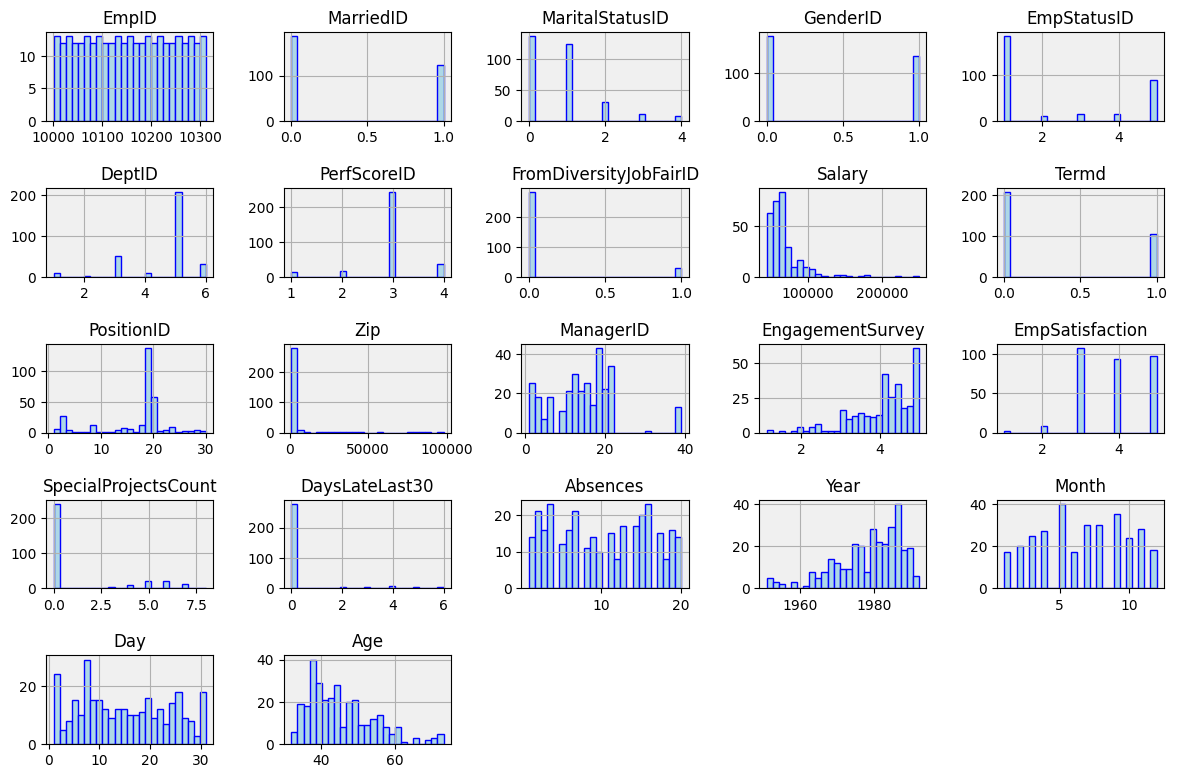

In [30]:
# Histograms of continuous variables.
ax = df.hist(bins=25, figsize=(12,8),                
                edgecolor='blue', 
                facecolor='lightblue',
                grid=True)

# Set facecolor.
for axes in ax.flatten():
    axes.set_facecolor('#F0F0F0')
    
plt.tight_layout(pad=1.5)
plt.show()

* The **Salary** distribution exhibits right skewness, with a majority of histogram bins concentrated on the left side of the distribution, gradually thinning out towards higher values. Possibly indicating income disparities within the dataset. This insight could be further explored to understand factors contributing to these disparities, such as job positions, years of service, etc.

* The **Engagement Survey** results exhibit left skewness, suggesting that most individuals perform well or report high levels of engagement, with fewer individuals reporting lower levels of engagement. While most employees may report positive engagement, it's essential to investigate the reasons behind lower engagement levels reported by a minority of individuals. Addressing these areas for improvement can help enhance overall organisational performance and employee well-being.

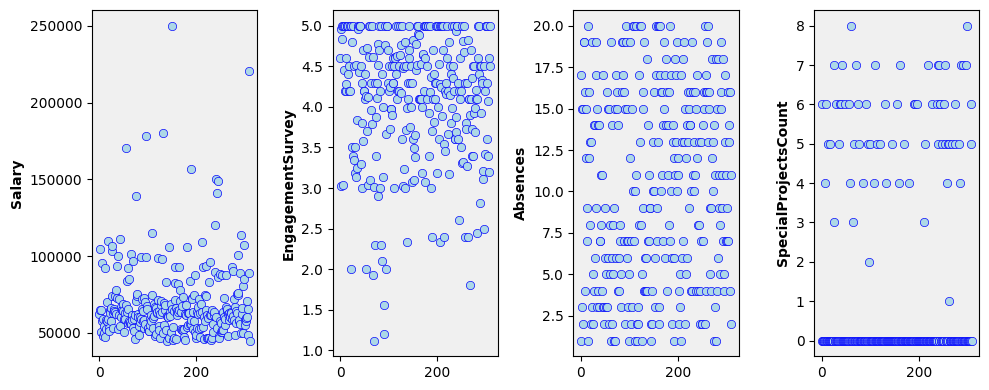

In [31]:
# Investigate distribution and any outliers on specific continuous variables.
scatterplot_cols = ['Salary', 'EngagementSurvey', 'Absences', 'SpecialProjectsCount']

fig, ax = plt.subplots(1,len(scatterplot_cols), figsize=(10,4)) 

# Set facecolor.
for axes in ax.flatten():
    axes.set_facecolor('#F0F0F0')

for idx, col in enumerate(df[scatterplot_cols]):
    sns.scatterplot(data = df[col], ax = ax[idx], color='lightblue', edgecolor='blue')
    ax[idx].set_ylabel(col, fontweight='bold')  # Set y-axis label to bold
    
fig.tight_layout()
fig.show()

* Potential outliers in the **EngagementSurvey** and **Salary** variables may indicate salaries associated with executive positions, possibly including CEO roles.
* **Absences** attribute evenly spread out may not be correlated with the other variables and therefore may not be an informative attribute to provide EDA insights in its current form.

#### Potential Outliers Detection Using IQR (Interquartile Range) Method

In [32]:
# Calculate description statistics
description = df[['Salary', 'EngagementSurvey']].describe()

# Calculate IQR for Salary
Q1_salary = description.loc['25%', 'Salary']
Q3_salary = description.loc['75%', 'Salary']
IQR_salary = Q3_salary - Q1_salary

# Calculate IQR for EngagementSurvey
Q1_engagement = description.loc['25%', 'EngagementSurvey']
Q3_engagement = description.loc['75%', 'EngagementSurvey']
IQR_engagement = Q3_engagement - Q1_engagement

# Identify potential outliers for Salary.
outlier_threshold = 2.5 #1.5 
potential_outliers_salary = (df['Salary'] < (Q1_salary - outlier_threshold * IQR_salary)) | (df['Salary'] > (Q3_salary + outlier_threshold * IQR_salary))

# Identify potential outliers for EngagementSurvey.
potential_outliers_engagement = (df['EngagementSurvey'] < (Q1_engagement - outlier_threshold * IQR_engagement)) | (df['EngagementSurvey'] > (Q3_engagement + outlier_threshold * IQR_engagement))

# Threshold adjustment - determined after visual analysis of scatterplots.
print(f"Adjusted outlier threshold to: {outlier_threshold}\n")

# Print potential outliers for Salary.
print("Potential outliers for Salary:")
print(df[potential_outliers_salary]['Salary'].sort_values(ascending=False))

# Print potential outliers for EngagementSurvey.
print("\nPotential outliers for EngagementSurvey:")
print(df[potential_outliers_engagement]['EngagementSurvey'].sort_values(ascending=False))

Adjusted outlier threshold to: 2.5

Potential outliers for Salary:
150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
239    120000
108    114800
292    113999
Name: Salary, dtype: int64

Potential outliers for EngagementSurvey:
69    1.12
Name: EngagementSurvey, dtype: float64


***

## General Correlation Analysis
[Back to Top](#Table-of-Contents:)

In [33]:
# Correlation with Termination status.
termd_corr = df.corr(numeric_only=True)['Termd'].sort_values()
termd_corr.corr

<bound method Series.corr of SpecialProjectsCount     -0.147429
Zip                      -0.139006
Year                     -0.101995
Salary                   -0.093994
PerfScoreID              -0.089061
EngagementSurvey         -0.017543
GenderID                 -0.015741
Day                      -0.015623
EmpSatisfaction          -0.004732
Month                     0.005216
DeptID                    0.065922
MarriedID                 0.077028
EmpID                     0.092389
Absences                  0.098274
MaritalStatusID           0.099367
Age                       0.101995
DaysLateLast30            0.136379
PositionID                0.147042
FromDiversityJobFairID    0.147717
ManagerID                 0.209113
EmpStatusID               0.948058
Termd                     1.000000
Name: Termd, dtype: float64>

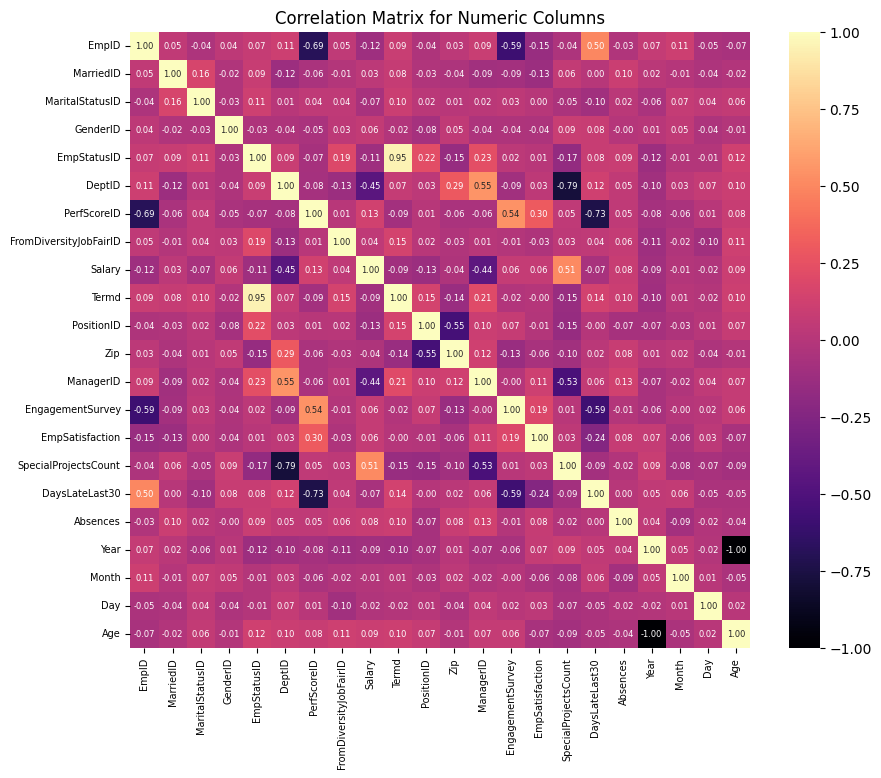

In [34]:
# Plot heatmap for correlation analysis.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", annot_kws={"size": 6})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

* **Absenteeism** has a very low correlation with other features in the dataset. This could indicate it is more influenced by external reasons such as personal circumstances not captured in the dataset, possible outliers or noise affecting the correlation, or the need for more data.

* **ManagerID** shows a medium positive correlation coefficient with **Termination** status. If ManagerID aligns with ManagerName, it suggests that certain managers may have a higher tendency to lead to terminations. This could imply that some managers may have a managerial style, approach, or oversight that impacts employee retention negatively.

 - It could be a useful predictor for determining termination status. By identifying which managers are associated with higher termination rates, organisations can potentially intervene with targeted training, support, or changes in management practices to improve employee retention and reduce turnover.
 
 
* Other interesting **negative correlations** include:

    - *PerfScoreID and DaysLateLast30* - suggests that employees with higher performance scores tend to have fewer days late in the last 30 days.
    - *ManagerID and SpecialProjectsCount* - indicates that certain managers may allocate fewer special projects to their team members.
    
    
* Other interesting **positive correlations** include:

    - *Salary and SpecialProjectsCount* - implies that employees with higher salaries tend to be assigned more special projects.
    - *Abscences and EmpID* - suggests that there may be some consistency or patterns in the absences of employees based on their employee ID.

***

## Visual EDA
[Back to Top](#Table-of-Contents:)

In [35]:
# Function to generate pastel colours for visuals.
def generate_pastel_palette(num_colors):
    return sns.color_palette("pastel", num_colors, desat=0.95)

# Configure settings and colors for charts.
chart_bg_color = '#FFFFF5' # Pale yellow.
bar_edge_color = 'darkblue'
pie_wedge_color = 'darkblue'
annotation_color = 'darkblue'
scatter_edge_color = 'darkblue'

# Define common label parameter values in a dictionary.
title_label_params = {'fontweight': 'bold', 'pad': 10}

### Distribution of Employment Status 

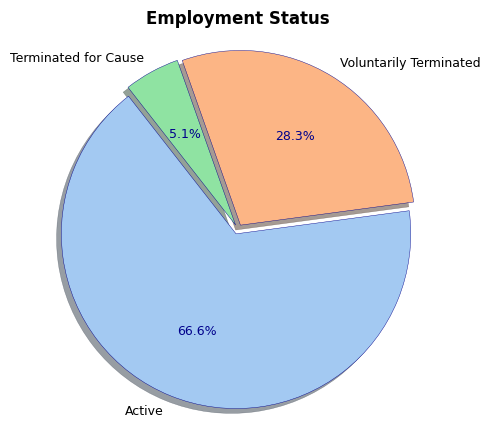

In [36]:
# Count the occurrences of each reason for termination.
employment_status_counts = df['EmploymentStatus'].value_counts()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(len(employment_status_counts))

# Create a list of explode values to increase space between slices.
explode = [0.028] * len(employment_status_counts)

plt.figure(figsize=(5, 5))
patches, texts, _ = plt.pie(employment_status_counts, 
        labels=employment_status_counts.index, 
        autopct='%1.1f%%',
        startangle=128,
        colors=pastel_colors,
        explode=explode,
        shadow=True,
        textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '9'},
        wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
        labeldistance=1.09)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employment Status', **title_label_params)

# Set font color of text labels.
for text in texts:
    text.set_color('black')
    text.set_fontsize('9')
    
plt.show()

***

### Termination Reasons Distribution

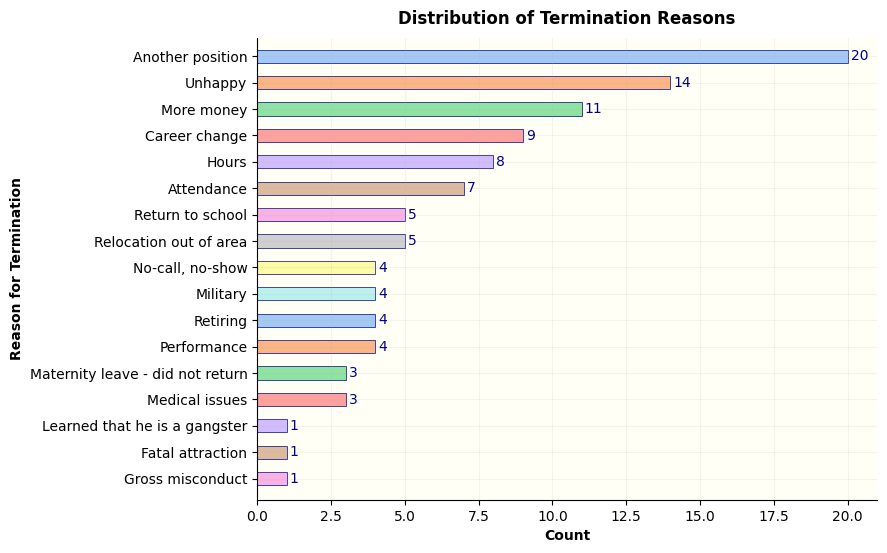

In [37]:
# Count the occurrences of each reason for termination.
reason_counts = df[df['TermReason'] != 'N/A-StillEmployed']['TermReason'].value_counts()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(len(reason_counts))

# Create a horizontal bar plot.
fig, ax = plt.subplots(figsize=(8, 6))
reason_counts.plot(kind='barh', color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5)
ax.set_facecolor(chart_bg_color)

# Annotate each bar with its count.
for i, count in enumerate(reason_counts):
    ax.text(count + 0.1, i, str(count), va='center', color=annotation_color)
    
# Adjust the limits of the y-axis to provide more room.
ax.set_ylim(-0.7, len(reason_counts) -  0.2)

 # Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

# Convert x-labels to have uppercase for first letter.
ax.set_yticklabels([label.capitalize() for label in reason_counts.index])

plt.xlabel('Count', fontweight='bold')
plt.ylabel('Reason for Termination', fontweight='bold')
plt.title('Distribution of Termination Reasons', **title_label_params)
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent reasons at the top.
plt.grid(True, alpha=0.15)
plt.show()

* The high frequency of employees departing for 'Another position' reflects a prominent pattern highlighting the value placed on internal career progression within the company.
* The presence of 14 departures attributed to employees feeling "unhappy" suggests a significant issue with job satisfaction and morale within the company.
* 11 individuals selected "more money" as the reason for departure, suggests a potential need to investigate pay gaps within the company and those available in the external job market.

***

### Employee Distribution Across Departments

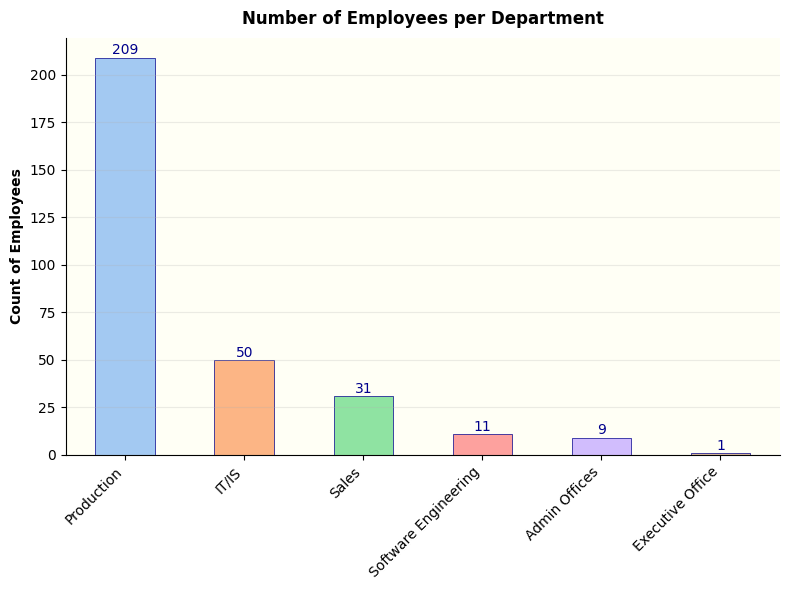

In [38]:
# Count number of employees per department.
dept_counts = df['Department'].str.strip().value_counts()

# Generate a pastel color palette based on the department.
pastel_colors = generate_pastel_palette(len(dept_counts))

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8,6))
dept_counts.plot(kind='bar', color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5)
ax.set_facecolor(chart_bg_color)

# Adjust the limits of the y-axis.
ax.set_ylim(0,)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Annotate bars with figure just below the top of each bar.
for i, count in enumerate(dept_counts):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', color=annotation_color)

plt.xlabel('')
plt.ylabel('Count of Employees', fontweight='bold')
plt.title('Number of Employees per Department', **title_label_params)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.25, axis='y')
plt.show()

* Consideration should be given to the disproportionate representation of employees in the Production department, which constitutes the majority of the workforce, in further analyses

***

### Diversity Profile
[Back to Top](#Table-of-Contents:)

In [39]:
# Filter dataframe for columns containing words Gender or Sex. 
gender_df = df.copy()
gender_df = df.loc[:, df.columns.str.contains('Gender', case=False) | df.columns.str.contains('Sex', case=False)]
gender_df.sample(4)

,GenderID,Sex
80,0,F
127,0,F
264,0,F
138,0,F


In [40]:
# Drop GenderID column.
gender_df = gender_df.drop('GenderID', axis=1)

# Remove leading and trailing whitespaces from 'Sex' column.
gender_df['Sex'] = gender_df['Sex'].str.strip()

#### Gender Distribution

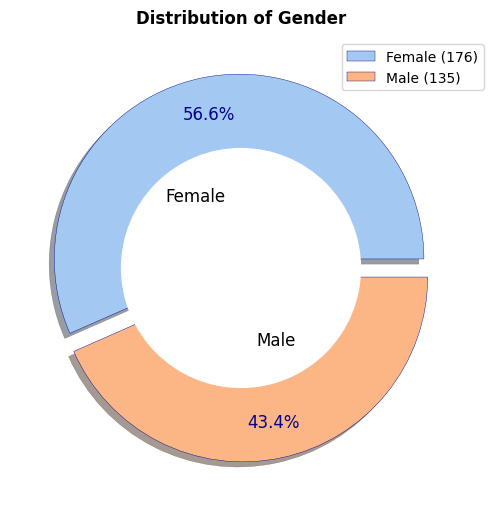

In [41]:
# Gender data.
gender_counts = gender_df.value_counts()
sizes = gender_counts.values
labels = ['Female', 'Male']

# Generate a pastel color palette based on the number of genders.
pastel_colors = generate_pastel_palette(len(gender_counts))

# Get counts of females and males.
female_count = sizes[0] if 'Female' in labels else 0
male_count = sizes[1] if 'Male' in labels else 0

# Create legend labels with additional text.
legend_labels = [f'{label} ({count})' for label, count in zip(labels, sizes)]

# Explosion of pie wedges.
explode = (0.05, 0.05)

# Pie Chart.
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = plt.pie(sizes, 
                                   colors=pastel_colors, 
                                   labels=labels, 
                                   autopct='%1.1f%%', 
                                   pctdistance=0.80, 
                                   explode=explode,
                                   labeldistance=0.35, 
                                   wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
                                   textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '12'},
                                   shadow=True)

# Set autopct label color to white if the label is 'Male'.
#for autotext, label in zip(autotexts, labels):
#    if label == 'Male':
#        autotext.set_color('white')

# Draw inner circle for donut effect.
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()

# Adding circle in pie chart.
fig.gca().add_artist(centre_circle)

# Adding title of the chart.
plt.title('Distribution of Gender', **title_label_params)

# Add Legends.
plt.legend(legend_labels, loc="upper right", bbox_to_anchor=(1.04, 1))

# Set font color of text labels.
for text in texts:
    text.set_color('black')
    text.set_fontsize('12')

# Display the chart.
plt.show()

* The dataset contains a higher number of female employees compared to male employees. 
* The difference suggests a gender imbalance within the company. Further analysis could explore whether this imbalance exists across different departments or levels of the organisation.

#### Race Distribution

In [42]:
df['RaceDesc'].value_counts()

RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64

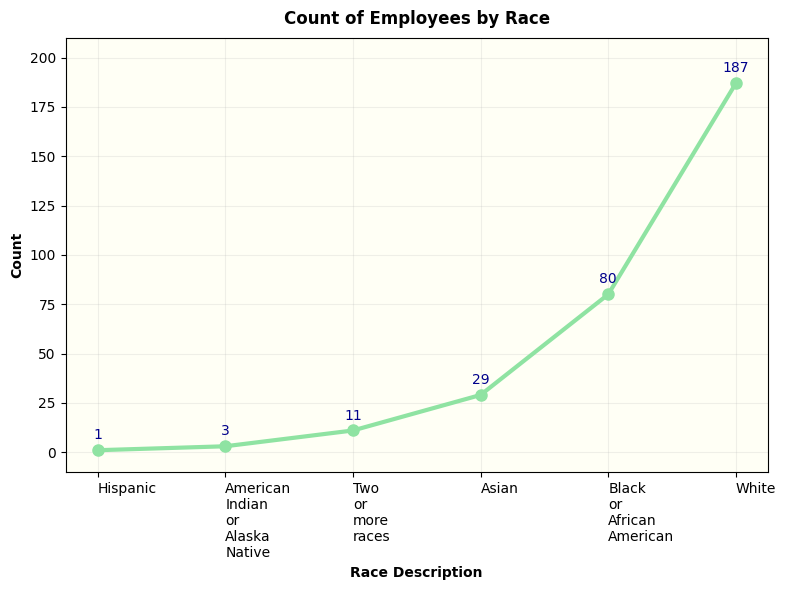

In [43]:
# Count number of employees in each race category.
race_counts = df['RaceDesc'].value_counts().sort_values()

# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)

# Plotting
plt.figure(figsize=(8, 6))
ax = race_counts.plot(kind='line', 
                      marker='o', 
                      markersize=8,
                      color=pastel_colors[2], 
                      linewidth=3.0)

# Set the background color of the axis
ax.set_facecolor(chart_bg_color)

# Get the current tick positions and labels.
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left
for tick in ticks:
    tick.set_horizontalalignment('left')
    tick.set_x(-3.75)
    
# Customize x-tick labels
tick_labels = [label.replace(' ', '\n') for label in race_counts.index]  # Replace space with newline character
# Set custom tick labels
plt.xticks(range(len(race_counts)), tick_labels, rotation=0)
  
# Add counters on markers.
for i, count in enumerate(race_counts):
    plt.text(i, count+4, str(count), ha='center', va='bottom', fontsize=10, color=annotation_color)  # Annotate each marker with its count value

# Add labels and title.
plt.title('Count of Employees by Race', **title_label_params)
plt.xlabel('Race Description', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)

plt.grid(True, alpha=0.20)
plt.ylim(-10,210)
plt.tight_layout()
plt.show()

* The majority of employees in the dataset are of White ethnicity, with 187 individuals, indicating a predominance of White employees within the workforce.

In [44]:
# Checking integrity of hispanic count.
hispanic_employees = df[df['RaceDesc'].str.contains('hispanic', case=False)]
hispanic_employees

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Parsed_DOB,Year,Month,Day,Age
187,"Miller, Brannon",10116,0,0,1,1,5,3,0,83667,...,3,0,1/14/2019,0,2,1981-08-10,1981,8,10,43


#### Age Distribution

Note: The csv dataset contains 2-year digits for DOB, as well as 4-year digits. Pandas is attributing 2 digit years with 2000 century. <br>
Specifically values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068 when parsing.

In [45]:
# Copy original dataframe.
age_df = df.copy()

# Convert 'DOB' column to datetime with explicit format.
age_df['DOB'] = pd.to_datetime(age_df['DOB'], format='%m/%d/%y', errors='coerce')

# Preprocess 'DOB' column to handle two-digit years. Assumption - appending 19 to 2 digit years.
age_df['DOB'] = age_df['DOB'].apply(lambda x: x.strftime('%m/%d/%Y') if pd.notnull(x) else '')
age_df['DOB'] = age_df['DOB'].apply(lambda x: x[:-4] + '19' + x[-2:] if len(x) > 0 and x[-2:] != '19' else x)

# Convert 'DOB' column back to datetime with explicit format
age_df['DOB'] = pd.to_datetime(age_df['DOB'], format='%m/%d/%Y', errors='coerce')

# Calculate age for each employee.
current_year = pd.Timestamp.now().year
age_df['Age'] = current_year - age_df['DOB'].dt.year

# Calculate the average age.
average_age = age_df['Age'].mean()

print(f"Average Age: {average_age:.2f} years")

Average Age: 45.41 years


In [46]:
age_df['Age'].describe()

count    311.000000
mean      45.408360
std        8.870236
min       32.000000
25%       38.000000
50%       44.000000
75%       51.000000
max       73.000000
Name: Age, dtype: float64

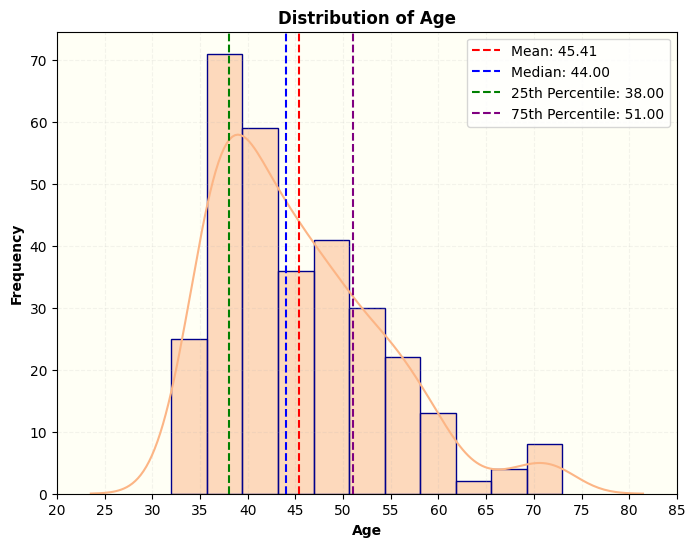

In [47]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(2)

# Plot the histogram
ax = sns.histplot(age_df['Age'], kde=True, kde_kws=dict(cut=3), color=pastel_colors[1], edgecolor=bar_edge_color)

# Set background color behind the plot area
ax.set_facecolor(chart_bg_color)

# Add labels and title
plt.title('Distribution of Age', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.15)

# Customize x-axis tick intervals
plt.xticks(range(20, 90, 5))  # Setting intervals every 10 years from 0 to 100

# Add mean, median, and quartile annotations
plt.axvline(x=age_df['Age'].mean(), color='red', linestyle='--', label='Mean: {:.2f}'.format(age_df['Age'].mean()))
plt.axvline(x=age_df['Age'].median(), color='blue', linestyle='--', label='Median: {:.2f}'.format(age_df['Age'].median()))
plt.axvline(x=age_df['Age'].quantile(0.25), color='green', linestyle='--', label='25th Percentile: {:.2f}'.format(age_df['Age'].quantile(0.25)))
plt.axvline(x=age_df['Age'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile: {:.2f}'.format(age_df['Age'].quantile(0.75)))

# Show legend
plt.legend()

# Show plot
plt.show()

* The ages **range** from a minimum of 32 years to a maximum of 73 years, with a mean age of approximately 45.41 years.


* The distribution of ages is **relatively symmetric** around the mean, as indicated by a median (50th percentile) age of approximately 44 years. 


* The standard deviation of approximately 8.87 years suggests **moderate variability** in ages around the mean. 

* Slight **right skewness** observed in the age distribution, also due to 75th percentile (Q3) age is higher than the median and the maximum age is substantially higher than the mean.

* Additionally, quartile analysis reveals that 25% of the ages fall below approximately 38 years (25th percentile) and 75% fall below approximately 51 years (75th percentile).

***

### Overall Performance Score Distribution
[Back to Top](#Table-of-Contents:)

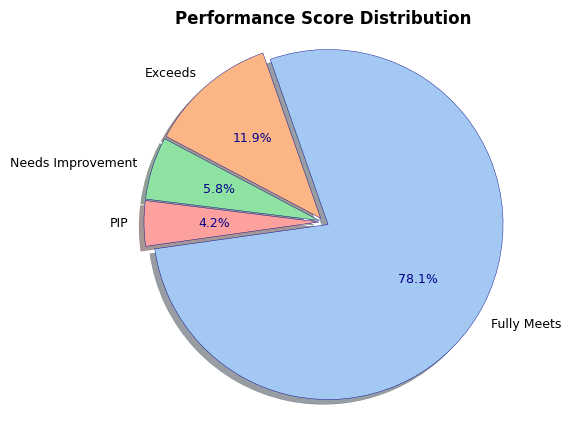

In [48]:
# Count the occurrences of each performance score.
perfscore_counts = df['PerformanceScore'].value_counts()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(len(perfscore_counts))

# Create a list of explode values to increase space between slices.
explode = [0.028] * len(perfscore_counts)

plt.figure(figsize=(5, 5))
patches, texts, _ = plt.pie(perfscore_counts, 
        labels=perfscore_counts.index, 
        autopct='%1.1f%%',
        startangle=188,
        colors=pastel_colors,
        explode=explode,
        shadow=True,
        textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '9'},
        wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
        labeldistance=1.09)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Performance Score Distribution', fontweight='bold')

# Set font color of text labels.
for text in texts:
    text.set_color('black')
    text.set_fontsize('9')    

***

## Gender and Position-Based Salary Analysis
[Back to Top](#Table-of-Contents:)

In [49]:
# Calculate mean salary for each gender.
mean_salary_by_gender = df.groupby('Sex')['Salary'].agg(['mean', 'median'])
mean_salary_by_gender

,mean,median
Sex,,
F,67786.727273,62066.5
M,70629.400000,63353.0


In [50]:
# Top 5 salaries for female.
df[df['Sex'] == 'F']['Salary'].sort_values(ascending=False).head(5)

150    250000
308    220450
131    180000
240    150290
239    120000
Name: Salary, dtype: int64

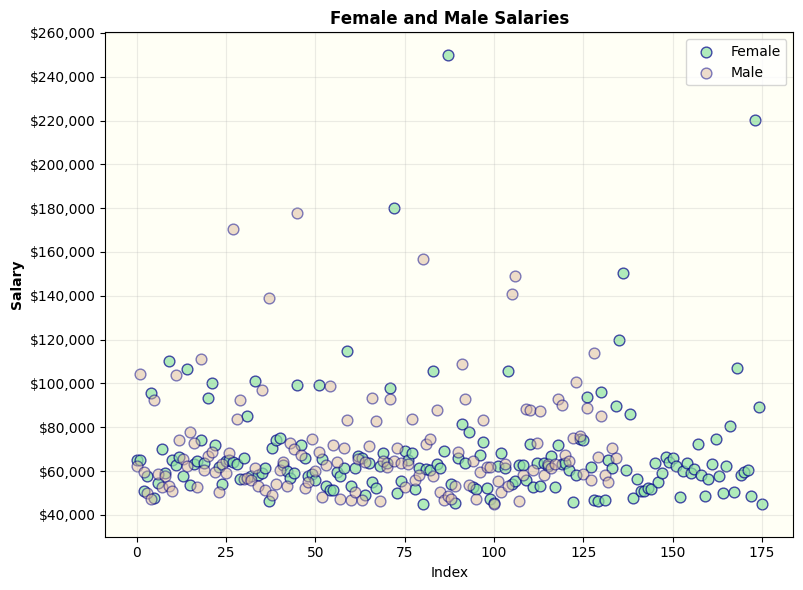

In [51]:
# Filter the dataframe by gender salaries.
female_salaries = df[df['Sex'].str.strip() == 'F']['Salary']
male_salaries = df[df['Sex'].str.strip() == 'M']['Salary']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Generate a pastel color palette with 6 colors to choose 2 from.
pastel_colors = generate_pastel_palette(6)

# Set the background color of the axis
ax.set_facecolor(chart_bg_color)

# Marker data point size
marker_size = 60

# Create a scatterplot for female salaries.
plt.scatter(range(len(female_salaries)), female_salaries, 
            color=pastel_colors[2], 
            alpha=0.7,
            edgecolor=scatter_edge_color,
            s=marker_size, # Set marker size
            label='Female')  

# Create a scatter plot for male salaries.
plt.scatter(range(len(male_salaries)), male_salaries, 
            color=pastel_colors[5], 
            alpha=0.5, 
            edgecolor=scatter_edge_color,
            s=marker_size, # Set marker size
            label='Male')  

# Set the title and labels
plt.title('Female and Male Salaries', fontweight='bold')
plt.xlabel('Index') # index position in the dataframe
plt.ylabel('Salary', fontweight='bold')
plt.tight_layout()
plt.grid(True, alpha=0.25)

# Format y-tick labels directly
#yticks = ax.get_yticks()
yticks = np.arange(20000, max(df['Salary'])+20000, 20000)  # Adjust the interval as needed

ytick_labels = []  # Initialize an empty list to store the formatted tick labels
for y in yticks:  # Iterate over each tick value in yticks
    # Format the current tick value y as a string with dollar sign, comma separator, and zero decimal places
    formatted_label = '${:,.0f}'.format(y)
    # Append the formatted label to the ytick_labels list
    ytick_labels.append(formatted_label)

ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

# Set y-axis limit to start around $30,000
ax.set_ylim(bottom=30000)

# Show the legend
ax.legend()

# Show the plot
plt.show()

* The scatter plot indicates a relatively uniform distribution of genders within the salary range of approximately 50,000 to 70,000
* An outlier is observed around the salary of 250,000 and 220,000, which likely represents the CEO's and executive salary. This significant outlier stands out from the rest of the data points, indicating a substantial deviation from the typical salary distribution within the company.
* Another notable observation is that within the medium salary range of approximately 140,000 to 180,000, there seems to be a higher concentration of male employees compared to female employees. This suggests a potential gender disparity in higher salary brackets, where males may be more represented.

#### Box Violin Charts of Gender Salaries

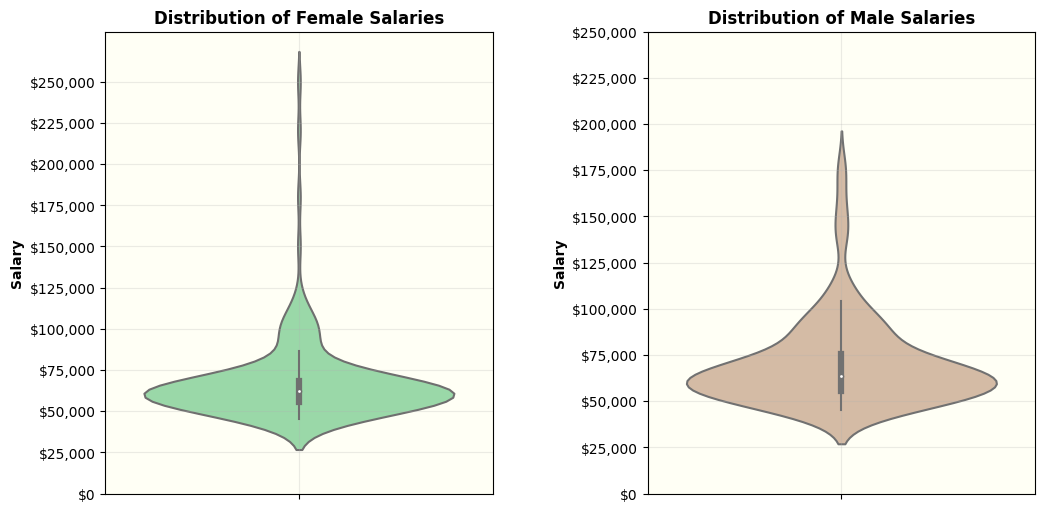

In [52]:
# Filter the DataFrame by gender
female_salaries = df[df['Sex'].str.strip() == 'F']['Salary']
male_salaries = df[df['Sex'].str.strip() == 'M']['Salary']

# Create a figure and set of subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Generate a pastel color palette with 6 colors to choose 2 from.
pastel_colors = generate_pastel_palette(6)

# Calculate the maximum salary for both genders
max_salary = max(female_salaries.max(), male_salaries.max())

# Calculate the maximum y-tick value based on the maximum salary
max_ytick = int(np.ceil(max_salary / 25000)) * 25000

# Create the violin plot for female salaries
sns.violinplot(y=female_salaries, color=pastel_colors[2], ax=axes[0])
axes[0].set_title('Distribution of Female Salaries', fontweight='bold')
axes[0].set_ylabel('Salary', fontweight='bold')
axes[0].set_yticks(np.arange(0, max_ytick + 1, 25000))  # Adjust y-axis tick intervals
axes[0].grid(True, alpha=0.25)
axes[0].set_facecolor(chart_bg_color) # Set the background color of the axis

# Create the violin plot for male salaries
sns.violinplot(y=male_salaries, color=pastel_colors[5], ax=axes[1])
axes[1].set_title('Distribution of Male Salaries', fontweight='bold')
axes[1].set_ylabel('Salary', fontweight='bold')
axes[1].set_yticks(np.arange(0, max_ytick + 1, 25000))  # Adjust y-axis tick intervals
axes[1].grid(True, alpha=0.25)
axes[1].set_facecolor(chart_bg_color) # Set the background color of the axis

# Format the tick values y as a string with dollar sign, comma separator, and zero decimal places.
yticks = np.arange(0, max_ytick + 1, 25000)
ytick_labels = ['${:,.0f}'.format(y) for y in yticks]
axes[0].set_yticklabels(ytick_labels)
axes[1].set_yticklabels(ytick_labels)

# Adjust layout
#lt.tight_layout()

# Adjust layout to add padding between subplots.
plt.subplots_adjust(wspace=0.4)  # Adjust the width space between subplots

# Show the plot
plt.show()

**Similar Median Salary (Middle White Dot):**

The white dot in the box plot component of the violin plots, representing the median salary, shows that the median salary for both genders is quite similar. This suggests on average there is no significant difference in the central tendency of salaries between males and females.

**Width of the "Violin" Shape around 75-100k:**

The wider/denser shape of the violin plot for male salaries in the range of approx. 75,000 to 100,000 suggests a higher concentration of male salaries within this salary range compared to female salaries. This could indicate a higher proportion of males earning salaries within this range.

**Narrowing of the Violin Shape from 130-180k:**

Both male and female violin shapes narrow in the salary range of approx. 130,000 to 180,000. This was also detected in the result with the scatterplot above. This narrowing suggests that there is a decrease in the density or frequency of salaries within this range for both genders. However, the male violin plot remains moderately wider in this range compared to the female plot, indicating that there may still be more males earning salaries within this range.

**Limit of Male and Female Salaries:**

The violin plot shows that male salaries tend to have a limit around approx. 190,000, as indicated by the end of the violin shape, while female salaries continue beyond that range up to 250,000. This suggests that there are more female outliers with higher salaries beyond 190,000, possibly including positions like CEOs or executives, which are less common among males in the dataset.

#### Closer look at the Box Plots for Gender Salaries Distribution

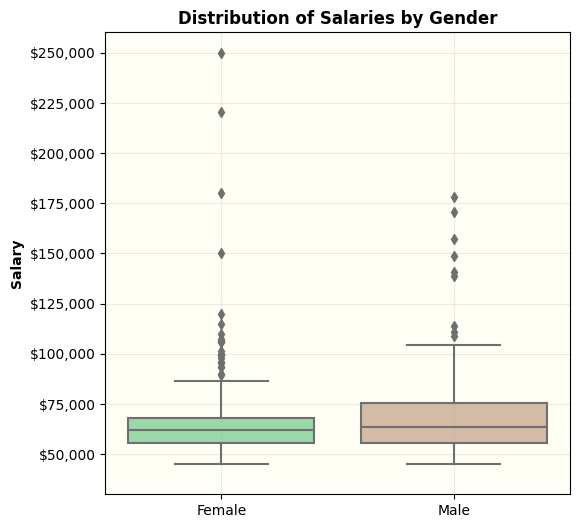

In [53]:
# Filter the DataFrame by gender.
female_salaries = df[df['Sex'].str.strip() == 'F']['Salary']
male_salaries = df[df['Sex'].str.strip() == 'M']['Salary']

# Generate a pastel color palette with 6 colors to choose 2 from.
pastel_colors = generate_pastel_palette(6)

# Concatenate the data for plotting
combined_salaries = pd.concat([female_salaries, male_salaries], axis=1)
combined_salaries.columns = ['Female', 'Male']  # Rename columns for clarity

# Set the background color of the chart
plt.figure(figsize=(6,6))

# Create the box plot for combined salaries
ax = sns.boxplot(data=combined_salaries, 
            palette=[pastel_colors[2], pastel_colors[5]])

ax.set_facecolor(chart_bg_color)

# Format the tick values y as a string with dollar sign, comma separator, and zero decimal places.
yticks = np.arange(0, max_ytick + 1, 25000)
ytick_labels = ['${:,.0f}'.format(y) for y in yticks]

# Set yticks and yticklabels
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

# Set y-axis limit to start around $30,000
ax.set_ylim(bottom=30000)

# Set the title and labels
plt.title('Distribution of Salaries by Gender', fontweight='bold')
plt.ylabel('Salary', fontweight='bold')
plt.xlabel('')
plt.grid(True,alpha=0.25)

# Show the plot
plt.show()

* The upper whisker of the male boxplot aligns with the wider/denser section of the violin plot for male salaries in the range of approximately 75,000 to 100,000 (right skewness in the data for males in this range), reinforcing the observation made from the violin plot. This alignment indicates that within this salary range, there is a higher concentration of male salaries compared to female salaries.

* The observation of outliers starting from the upper whisker specifically in the male box plot, and notably more than in the female box plot, suggests that there are more extreme values or higher salaries among males compared to females in this salary range of 130,000 to 180,000.

* The absence of outliers beyond approx. 180,000 in the male box plot indicates that there are no extreme values or exceptionally high salaries among males beyond this threshold within the dataset.

* Shows that the median salary for both genders is quite similar.

#### Distribution of Employees Specific Salary Ranges by Gender

* The analysis of salary ranges underscores substantial disparities in gender representation across various salary brackets. I'll explore further by examining Positions for deeper insights.

### Salary by Position

In [54]:
# Copy dataframe and then remove lwhitespaces from 'Sex' and 'Position' columns.
df_positions = df.copy()
df_positions['Position'] = df_positions['Position'].str.strip()
df_positions['Sex'] = df_positions['Sex'].str.strip()

# Distribution of positions in the company.
df_positions['Position'].value_counts()

Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      8
Network Engineer                  5
Sr. Network Engineer              5
Database Administrator            5
BI Developer                      4
Sales Manager                     3
Accountant I                      3
Senior BI Developer               3
Administrative Assistant          3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
President & CEO                   1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
Shared Services Manager           1
IT Director                       1
Director of Sales                 1
IT Manager - Support              1
Director of Operations            1
BI Director        

In [55]:
# Mean salary for each position.
df_positions.groupby('Position')['Salary'].mean().sort_values(ascending=False)

Position
President & CEO                 250000.000000
CIO                             220450.000000
Director of Sales               180000.000000
IT Director                     178000.000000
Director of Operations          170500.000000
IT Manager - Infra              157000.000000
Data Architect                  150290.000000
IT Manager - DB                 144959.500000
IT Manager - Support            138888.000000
Principal Data Architect        120000.000000
BI Director                     110929.000000
Database Administrator          108499.600000
Enterprise Architect            103613.000000
Sr. Accountant                  102859.000000
Sr. DBA                         102234.000000
Software Engineer                96719.200000
BI Developer                     95465.000000
Sr. Network Engineer             93070.800000
Shared Services Manager          93046.000000
Data Analyst                     89756.875000
Senior BI Developer              84802.666667
Software Engineering Mana

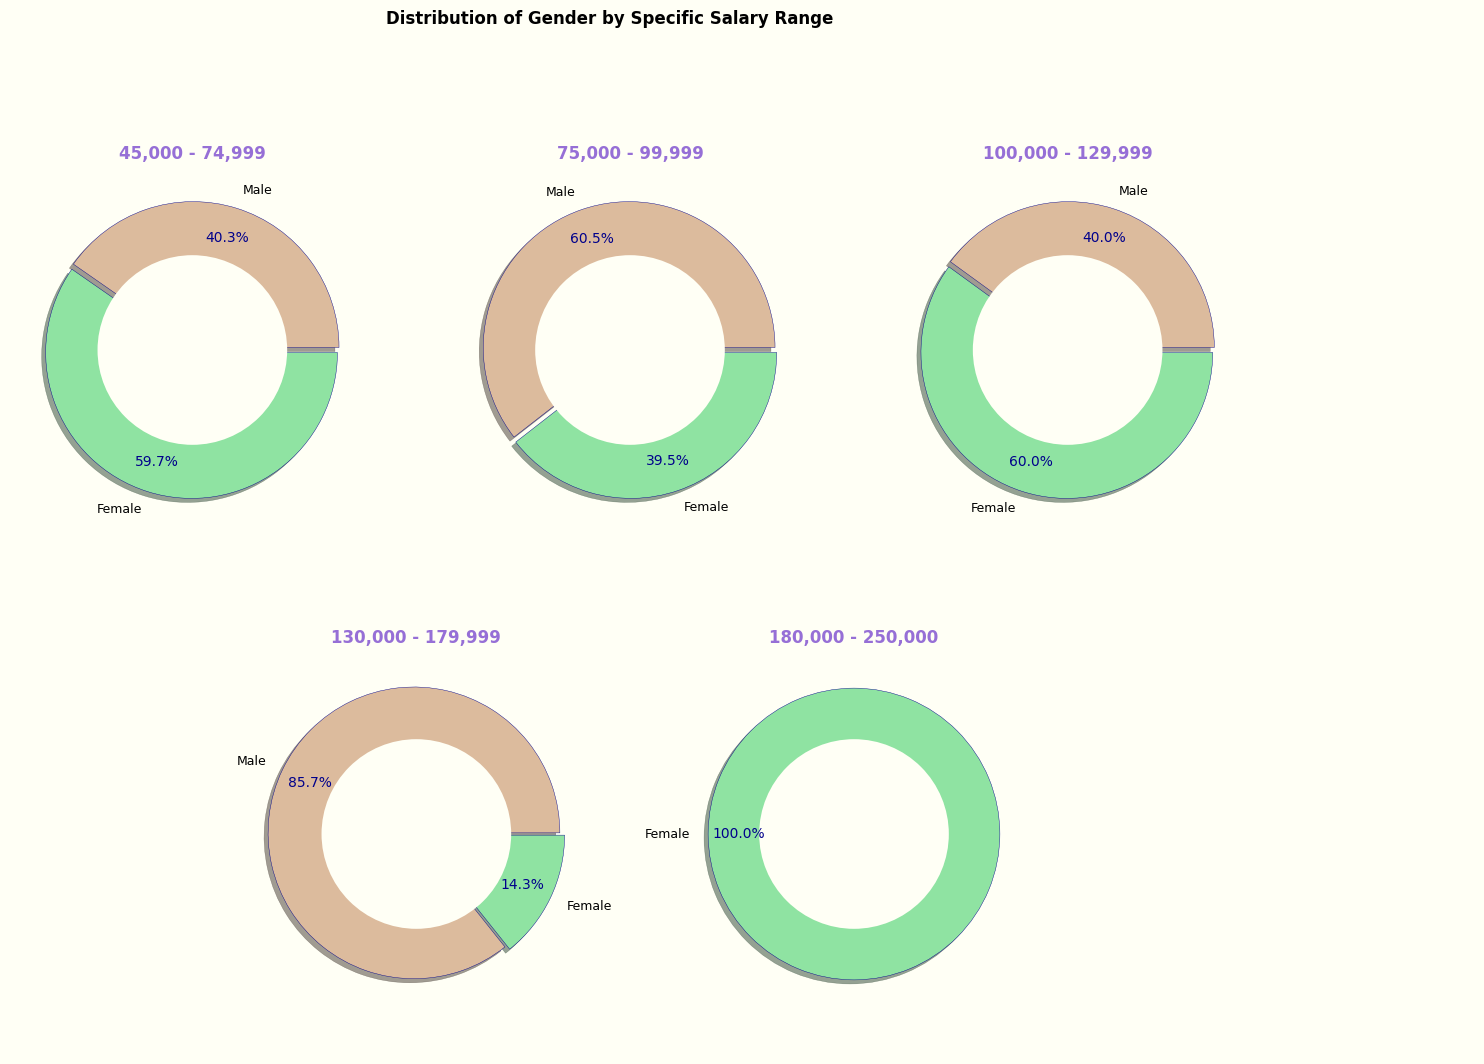

In [56]:
# Define a function to create a pie chart for a specified salary range.
def create_salary_range_pie(ax, df, salary_min, salary_max):
    # Set the dataframe to the specified salary range.
    salary_range_df = df[(df['Salary'] >= salary_min) & (df['Salary'] <= salary_max)]    

    # Count the number of males and females within the specified salary range
    male_count = salary_range_df[salary_range_df['Sex'].str.strip() == 'M'].shape[0]
    female_count = salary_range_df[salary_range_df['Sex'].str.strip() == 'F'].shape[0]
    sizes = [female_count, male_count]
    labels = ['Female', 'Male']
    
    # Generate pastel color palette.
    pastel_colors = generate_pastel_palette(6)
    
    # Define labels and sizes based on the counts.
    labels = []
    sizes = []
    if male_count > 0:
        labels.append('Male')
        sizes.append(male_count)
    if female_count > 0:
        labels.append('Female')
        sizes.append(female_count)    

    # Create legend labels with additional text.
    legend_labels = [f'{label} ({count})' for label, count in zip(labels, sizes)]
    
    # Set explode only if labels includes both genders.
    if len(labels) > 1:
        explode = (0.018, 0.018)
    else:
        explode = None

    # Create the pie chart.
    wedges, texts, autotexts = ax.pie(sizes, 
                                      #colors=[pastel_colors[0], pastel_colors[1]], 
                                      colors=[pastel_colors[2] if label == 'Female' else pastel_colors[5] for label in labels],
                                      labels=labels, 
                                      autopct='%1.1f%%', 
                                      pctdistance=0.79, 
                                      explode=explode,
                                      labeldistance=1.125, 
                                      wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
                                      textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '10'},
                                      shadow=True)

    # Draw inner circle for donut effect.
    centre_circle = plt.Circle((0, 0), 0.65, fc=chart_bg_color)
    ax.add_artist(centre_circle)

    # Set title of the chart.
    #ax.set_title(f' ${salary_min:,} - ${salary_max:,}', fontsize=10)  # Formatting with dollar signs and comma separators
    ax.set_title('{:,.0f} - {:,.0f}'.format(salary_min, salary_max), fontsize=12, color='#966FD6', fontweight='bold')
    
    # Set aspect ratio to be equal.
    ax.set_aspect('equal')

    # Add legends
    #ax.legend(legend_labels, loc="upper right", bbox_to_anchor=(1.20, 1))
    
    # Set font color of text labels
    for text in texts:
        text.set_color('black')
        text.set_fontsize('9')

# Create subplots for the two pie charts
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 14))
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 12), gridspec_kw={'hspace': 0.1})

# Call the function to create the first pie chart for the salary range $45k - $75k
create_salary_range_pie(ax1, df, 45000, 74999)

# Call the function to create the first pie chart for the salary range $75k - $100k
create_salary_range_pie(ax2, df, 75000, 99999)

# Call the function to create the second pie chart for the salary range $100k - $130k
create_salary_range_pie(ax3, df, 100000, 129999)

# Call the function to create the second pie chart for the salary range $130k - $180k
create_salary_range_pie(ax4, df, 130000, 179999)

# Call the function to create the second pie chart for the salary range $180k+
create_salary_range_pie(ax5, df, 180000, df['Salary'].max())

# Hide the 6th subplot
ax6.axis('off')

# Add main title for all subplots.
fig.suptitle('Distribution of Gender by Specific Salary Range', fontsize=12, fontweight='bold')

# Set background color for the entire chart.
fig.set_facecolor(chart_bg_color)

# Adjust the position of the subplots in the second row by adding padding.
for ax in [ax4, ax5, ax6]:
    pos = ax.get_position()
    pos.x0 += 0.14
    pos.x1 += 0.14
    ax.set_position(pos)

# Adjust layout and display the charts with reduced space for the super title.
plt.tight_layout(rect=[0, 0, 1, 0.05])
plt.show()

In [57]:
# Group the dataframe by both 'Position' and 'Sex', calculate the mean salary for each group.
mean_salary_by_position_sex = df_positions.groupby(['Position', 'Sex'])['Salary'].mean()#.sort_values(ascending=False)

# Convert the sorted Series to a dataframe and reset the index
mean_salary_by_position_sex_df = mean_salary_by_position_sex.reset_index()

# Group the dataframe by 'Position' and count the unique values in 'Sex'
position_sex_counts = df.groupby('Position')['Sex'].nunique()

# Select only positions where both male and female are present.
positions_with_both_sexes = position_sex_counts[position_sex_counts == 2].index

# Filter the original dataframe based on positions with both sexes
mean_salary_by_position_sex_df_both_sexes = mean_salary_by_position_sex_df[mean_salary_by_position_sex_df['Position'].isin(positions_with_both_sexes)]

# Remove leading and trailing whitespaces from 'Sex' column
mean_salary_by_position_sex_clean = mean_salary_by_position_sex_df_both_sexes.copy()
mean_salary_by_position_sex_clean['Sex'] = mean_salary_by_position_sex_df_both_sexes['Sex'].str.strip()
mean_salary_by_position_sex_clean

,Position,Sex,Salary
0,Accountant I,F,63000.000000
1,Accountant I,M,63761.500000
3,Area Sales Manager,F,63793.500000
4,Area Sales Manager,M,65843.800000
5,BI Developer,F,95920.000000
6,BI Developer,M,95313.333333
9,Data Analyst,F,90909.666667
10,Data Analyst,M,89065.200000
12,Database Administrator,F,107124.750000
13,Database Administrator,M,113999.000000


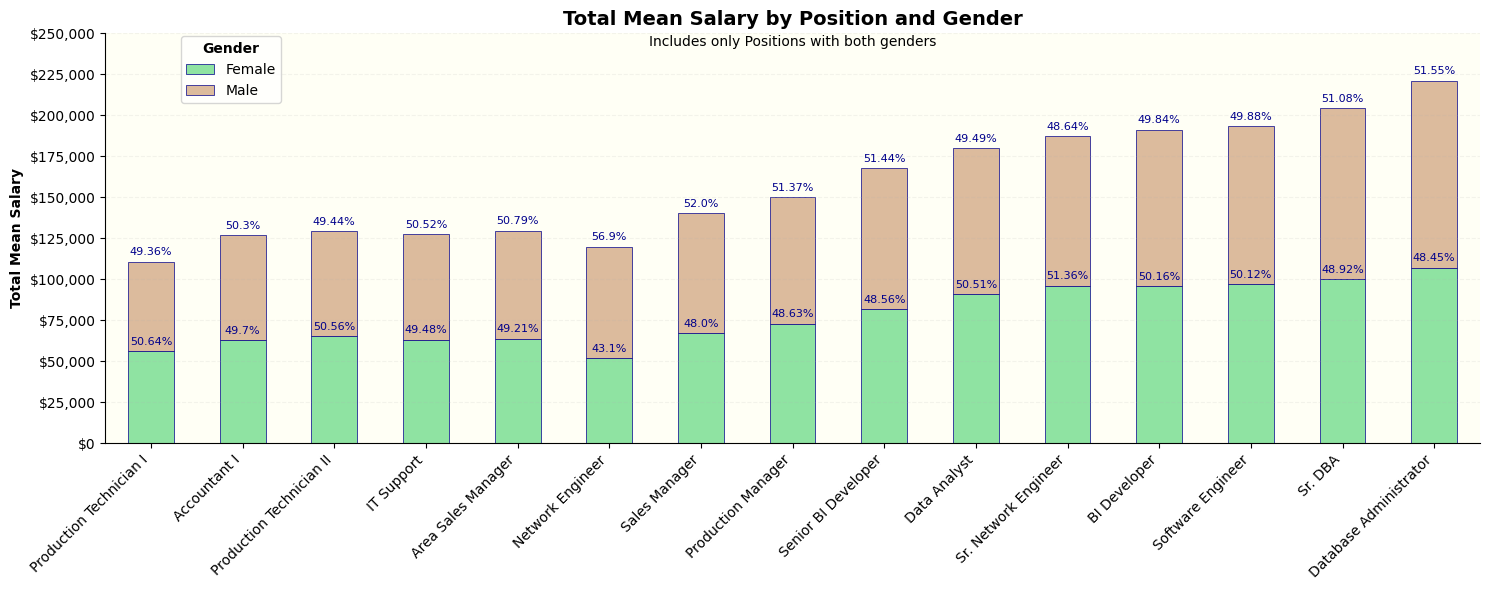

In [58]:
# Create a pivot table with mean salary for each position grouped by gender
pivot_table = mean_salary_by_position_sex_clean.pivot_table(index='Position', columns='Sex', values='Salary', aggfunc='mean')

# Sort the pivot table based on the mean salary for a specific gender group (e.g., male)
sorted_pivot_table = pivot_table.sort_values(by='M', ascending=True)

# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)
colors = [pastel_colors[2] if label == 'F' else pastel_colors[5] for label in sorted_pivot_table.columns]

# Create legend labels with 'Female' instead of 'F' and 'Male' instead of 'M'
legend_labels = [label.replace('F', 'Female').replace('M', 'Male') for label in sorted_pivot_table.columns]

# Plot a stacked bar chart.
ax = sorted_pivot_table.plot(kind='bar', 
                             stacked=True, 
                             figsize=(15, 6), 
                             color=colors, 
                             edgecolor=bar_edge_color, 
                             linewidth=0.5)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Chart background color.
ax.set_facecolor(chart_bg_color)

# Get the current tick positions and labels
ticks = ax.get_xticklabels()

# Format the tick values y as a string with dollar sign, comma separator, and zero decimal places.
yticks = np.arange(0, max_ytick + 1, 25000)
ytick_labels = ['${:,.0f}'.format(y) for y in yticks]

# Set yticks and yticklabels
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

# Adjust the position of the tick labels slightly to the left
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)
    
# Calculate the percentage for each row in the pivot table
total = pivot_table.sum(axis=1)  # Get the total for each row
per = pivot_table.div(total, axis=0).mul(100).round(2)  # Calculate the percent for each row
    
# Custom annotation labels for stacked bars
for c in ax.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the percentage from the per DataFrame.
    # The column labels are strings.
    if label == 'F':
        column = 'F'
    else:
        column = 'M'
    
    # Add the annotation for each segment in the container
    for i, bar in enumerate(c):
        height = bar.get_height()
        if height != 0:  # Skip annotating if the bar height is 0
            ax.annotate(f'{per.loc[sorted_pivot_table.index[i], column]}%',  # Annotation text
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height()),  # Annotation position
                        xytext=(0, 3),  # Offset for the annotation text
                        textcoords="offset points",
                        ha='center', va='bottom',  # Text alignment
                        fontsize=8, fontweight='normal', color=annotation_color)  # Font properties
            
# Set the title.
plt.title('Total Mean Salary by Position and Gender', fontweight='bold', fontsize=14)
# Add the subtitle.
plt.text(0.5, 0.98, 'Includes only Positions with both genders', horizontalalignment='center', verticalalignment='center',fontsize=10, transform=ax.transAxes)

plt.xlabel('')
plt.ylabel('Total Mean Salary', fontweight='bold')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.15)

# Show legend.
legend = plt.legend(legend_labels, loc="upper left", bbox_to_anchor=(0.05, 1.01))
legend.set_title('Gender')
legend.get_title().set_fontweight('bold')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* The mean salary for **Network Engineer** among females is substantially lower compared to males. 
* Female Network Engineers have a mean salary of 51,674.50, whereas male Network Engineers have a mean salary of 68,225.33.


* The mean salary for female **Senior DBAs** is 100,031, while for males, it's 104,437. While the gap isn't as pronounced as in some other positions, it's still worth exploring whether there are underlying reasons for this difference.

* TThe mean salary for female **Sales Managers** is 67,364, while for males, it's 72,992. This position also shows a notable disparity in mean salaries between genders, indicating a potential gender-based pay gap within the Sales Manager role

In [59]:
# Select Network Engineers from dataframe.
network_engineer_df = df_positions[df_positions['Position'] == 'Network Engineer']

# Count the number of females and males.
female_count = (network_engineer_df['Sex'] == 'F').sum()
male_count = (network_engineer_df['Sex'] == 'M').sum()

# Display the counts.
print("Count of Females as Network Engineers:", female_count)
print("Count of Males as Network Engineers:", male_count)

Count of Females as Network Engineers: 2
Count of Males as Network Engineers: 3


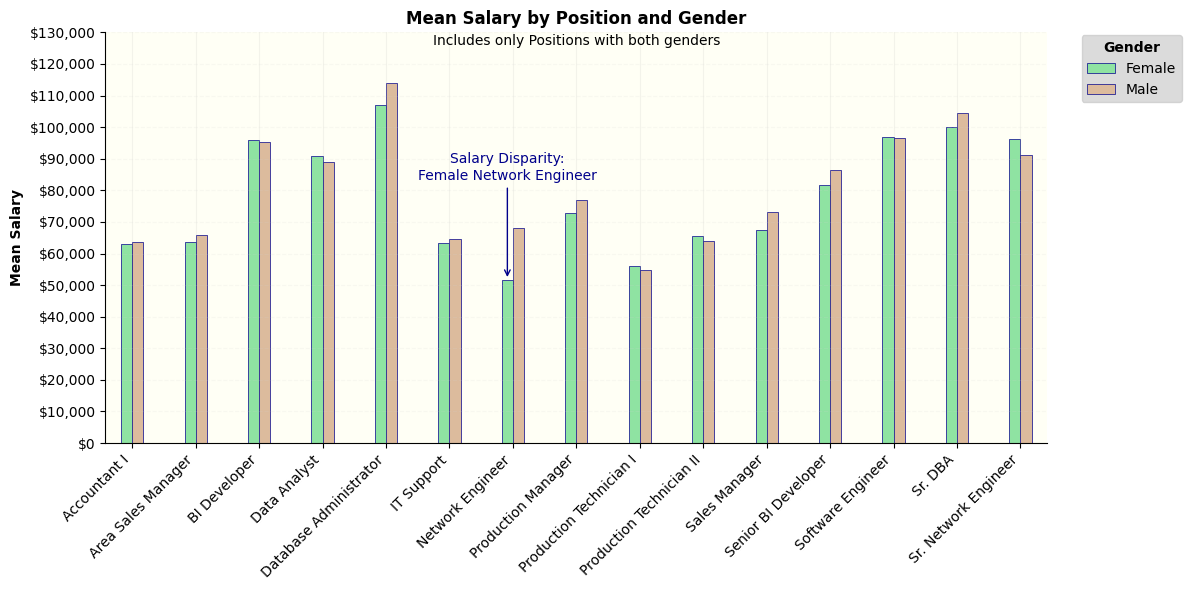

In [60]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)
colors = [pastel_colors[2] if label == 'F' else pastel_colors[5] for label in sorted_pivot_table.columns]

# Plot grouped bar chart
ax = pivot_table[['F', 'M']].plot(kind='bar', 
                                  figsize=(12, 6), 
                                  width=0.35, 
                                  color=colors,
                                  edgecolor=bar_edge_color, 
                                  linewidth=0.5)

# Define the category you want to highlight
category_to_highlight = "Network Engineer"

# Get the index of the category in the dataframe.
index_to_highlight = pivot_table.index.get_loc(category_to_highlight)

# Set chart background color
ax.set_facecolor(chart_bg_color)

# Format the tick values y as a string with dollar sign, comma separator, and zero decimal places.
yticks = np.arange(0, max_ytick + 1, 10000)
ytick_labels = ['${:,.0f}'.format(y) for y in yticks]

# Set yticks and yticklabels
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.rcParams['axes.facecolor'] = 'lightgrey'
# Get the current tick positions and labels
ticks = ax.get_xticklabels()
# Adjust the position of the tick labels slightly to the left
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)  # Adjust this value as needed for the desired amount of movement

# Set title and labels
plt.title('Mean Salary by Position and Gender', fontweight='bold')
plt.xlabel('')
plt.ylabel('Mean Salary', fontweight='bold')
plt.xticks(rotation=45)

# Add the subtitle.
plt.text(0.5, 0.98, 'Includes only Positions with both genders', horizontalalignment='center', verticalalignment='center', fontsize=10, transform=ax.transAxes)

# Add grid lines with light grey color
plt.grid(axis='y', linestyle='--', color='lightgrey', alpha=0.35)

# Show legend
legend = plt.legend(labels=['Female', 'Male'], loc="upper right", bbox_to_anchor=(1.15, 1.01))
legend.set_title('Gender')
legend.get_title().set_fontweight('bold')

# Add annotation to the top of the "network engineer" bar
bar_rects = ax.patches
for i, rect in enumerate(bar_rects):
    if i == index_to_highlight:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        ax.annotate('Salary Disparity:\nFemale Network Engineer', xy=(x, y), xytext=(0, 70), textcoords='offset points',
                    ha='center', va='bottom', fontsize=10, color='darkblue',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkblue'))

# Show plot
plt.tight_layout()
plt.ylim(0,130000)
plt.grid(True, alpha=0.15)
plt.show()

***

## Attrition Rate and Turnover Analysis
[Back to Top](#Table-of-Contents:)

### Attrition by Age

In [61]:
# Mean attrition rate by Age.
attritionrate_by_age = df.groupby('Age')['Termd'].mean().reset_index(name='AttritionRate')
attritionrate_by_age.sort_values(by=['AttritionRate', 'Age']).tail(7)

,Age,AttritionRate
20,52,0.571429
36,72,0.666667
28,60,0.800000
21,53,1.000000
31,65,1.000000
33,69,1.000000
35,71,1.000000


In [62]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Termd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.1019948649696528  with a P-value of P = 0.07247178632527944


* This indicates that as age increases, there is a slight tendency for the attrition rate to also increase, although the relationship is not very strong. 
* It's worth noting that the P-value is close to the 0.05 threshold, so the relationship may be approaching significance.

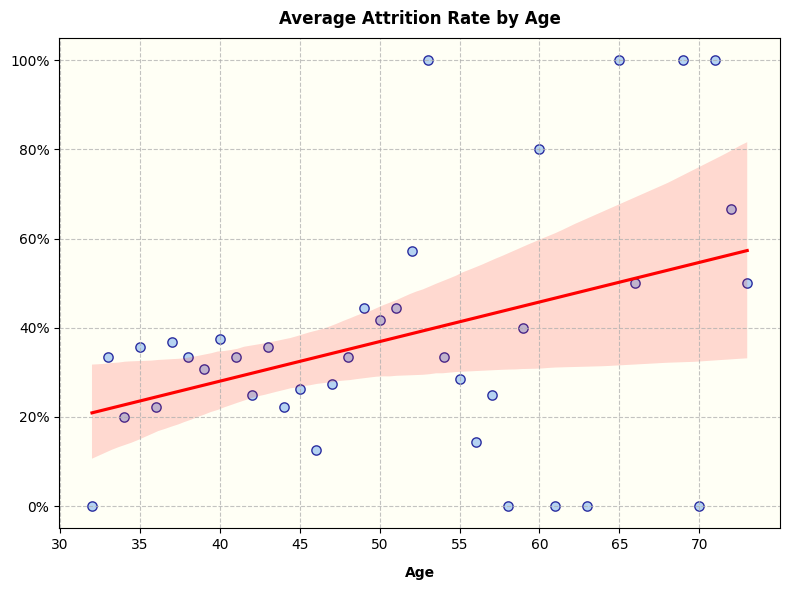

In [63]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(2)

# Marker data point size
marker_size = 45

# Create a figure window and axes to plot data.
fig, ax = plt.subplots(figsize=(8,6))

# Set chart background colour.
ax.set_facecolor(chart_bg_color)

# Plot the regression plot for Mean Attrition Rate by Age.
sns.regplot(x='Age', y='AttritionRate', data=attritionrate_by_age, 
            scatter=True,
            color=pastel_colors[0],
            scatter_kws={'s': marker_size, 'edgecolor': scatter_edge_color},
            line_kws={"color":"red"},
            ci=95) # confidence interval

# Set the title and labels
plt.title('Average Attrition Rate by Age', fontweight='bold', pad=10)
plt.xlabel('Age', fontweight='bold', labelpad=10)
plt.ylabel('', fontweight='bold', labelpad=10)

# Manually adjust y-axis tick labels to percentages.
y_ticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(y) for y in y_ticks])

plt.xticks(range(30, 71, 5))

# Show the plot
plt.grid(True, linestyle='--', alpha=0.76)
plt.tight_layout()
plt.show()

* The shaded area widens as Age increases, it suggests increasing uncertainty in the estimate, which could indicate a weaker correlation.

### Attrition Rate by Age Bins

In [64]:
# Determine the starting point for the age bins.
min_age = df['Age'].min()

# Round down the minimum age to the nearest multiple of 5
min_age_rounded = min_age - (min_age % 5)

# Define the bins for age.
bins = np.arange(min_age_rounded, df['Age'].max() + 5, 5)

grouped_by_age_bins = pd.cut(df['Age'], bins)

# Create age bins and calculate mean attrition rate for each bin
grouped_by_age_bins = df.groupby(grouped_by_age_bins)['Termd'].mean().reset_index(name='AttritionRate')

# Display the DataFrame
print(grouped_by_age_bins)

        Age  AttritionRate
0  (30, 35]       0.280000
1  (35, 40]       0.321839
2  (40, 45]       0.295775
3  (45, 50]       0.326531
4  (50, 55]       0.432432
5  (55, 60]       0.320000
6  (60, 65]       0.200000
7  (65, 70]       0.500000
8  (70, 75]       0.666667


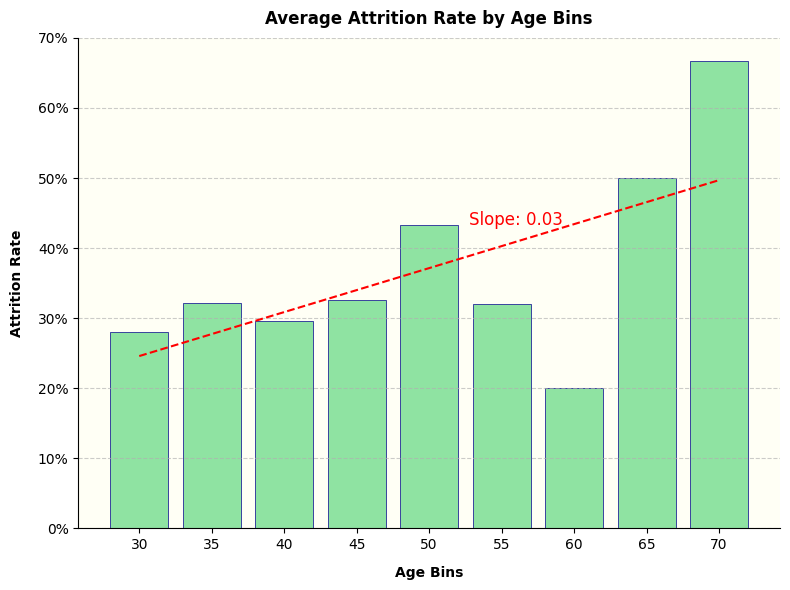

In [65]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(4)

# Extract left edge of each interval as bin labels
bin_labels = [str(interval.left) for interval in grouped_by_age_bins['Age']]

# Create the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(bin_labels, grouped_by_age_bins['AttritionRate'], 
        color=pastel_colors[2],
        edgecolor=bar_edge_color,
        linewidth=0.5)

# Define x-values for the trendline
x = np.arange(len(bin_labels)) #+ 0.5  # Adding 0.5 to center the bars

# Add trendline for attrition rate
z = np.polyfit(x, grouped_by_age_bins['AttritionRate'], 1)
p = np.poly1d(z)
ax.plot(x, p(x), color='red', linestyle='--', label='Attrition Rate Trendline')

# Annotate the trendline with the slope
slope = z[0]
text_x = len(bin_labels) * 0.5 + 0.7 # Positioning the text in the middle of the x-axis
text_y = p(text_x + 1)  # Positioning the text on the trendline
ax.text(text_x, text_y, f'Slope: {slope:.2f}', color='red', fontsize=12, ha='center', va='center')

# Manually adjust y-axis tick labels to percentages.
y_ticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(y) for y in y_ticks])

# Set chart background colour.
ax.set_facecolor(chart_bg_color)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Set the title and labels
plt.title('Average Attrition Rate by Age Bins', fontweight='bold', pad=10)
plt.xlabel('Age Bins', fontweight='bold', labelpad=10)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.65, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Peak Attrition:**
* The age group between 70 and 75 has the highest attrition rate at 0.67. This indicates that employees in this age range are more likely to leave their positions, which could be due to factors such as retirement, health-related issues, or changes in personal circumstances.

**Mid-Career Range:**
* Employees in the mid-career range, particularly those aged between 35 and 50, exhibit relatively higher attrition rates compared to other age groups. This suggests that employees in their mid-career stages may be more prone to leaving their jobs for various reasons such as career advancement opportunities, job dissatisfaction, or personal reasons.

**Lowest Attrition:** 
* Conversely, the age group between 60 and 65 has the lowest attrition rate at 0.20. This suggests that employees nearing traditional retirement age may be more likely to stay in their roles, potentially due to nearing retirement or other factors such as job stability or satisfaction.

**Interpretation of slope:**
* The slope of 0.03 in the linear regression model indicates that for every one-unit increase in the age bins, the attrition rate increases by 0.03 units. This means that as employees get older, there is a slight, positive association with an increase in attrition rate. 

  Note: This interpretation considers the change in attrition rate per unit change in age bins and does not represent a percentage increase.

**Retention Strategies:**
* Implement targeted retention strategies for employees in the age range where attrition rates are high (e.g., 30-50). This could involve career development opportunities, mentorship programs, or addressing any underlying dissatisfaction.


### Department Attrition Rate and Termination Reasons
[Back to Top](#Table-of-Contents:)

#### Attrition Rate by Department

In [66]:
# Create age bins and calculate mean attrition rate for each bin
grouped_by_department = df.groupby('Department')['Termd'].mean().reset_index(name='AttritionRate')

# Convert attrition rate to percentage by multiplying by 100
grouped_by_department['AttritionRate'] *= 100
grouped_by_department.round(2)

,Department,AttritionRate
0,Admin Offices,22.22
1,Executive Office,0.00
2,IT/IS,20.00
3,Production,39.71
4,Sales,16.13
5,Software Engineering,36.36


* This suggests potential issues in **high-turnover** departments like "Production" and "Software Engineering" that require attention to improve retention. 

**Action Item:**
* Investigate reasons behind low attrition in "Sales" and apply successful retention strategies to other departments

#### Termination Reasons by Department
[Back to Top](#Table-of-Contents:)

In [67]:
# Filter the dataframe for terminated employees only.
df_employed = df[df['TermReason'] != 'N/A-StillEmployed']

# Create a pivot table to count the occurrences of each race for each recruitment source
dept_counts_per_reason_df = df_employed.pivot_table(index='Department', columns='TermReason', aggfunc='size', fill_value=0)

# Reset the index and rename the columns
dept_counts_per_reason_df = dept_counts_per_reason_df.reset_index().rename_axis(columns=None).set_index('Department')
dept_counts_per_reason_df

,Another position,Fatal attraction,Learned that he is a gangster,attendance,career change,gross misconduct,hours,maternity leave - did not return,medical issues,military,more money,"no-call, no-show",performance,relocation out of area,retiring,return to school,unhappy
Department,,,,,,,,,,,,,,,,,
Admin Offices,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
IT/IS,1,0,1,0,1,0,2,0,1,0,0,2,2,0,0,0,0
Production,17,0,0,5,6,1,6,2,1,4,11,1,2,4,4,5,14
Sales,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Software Engineering,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


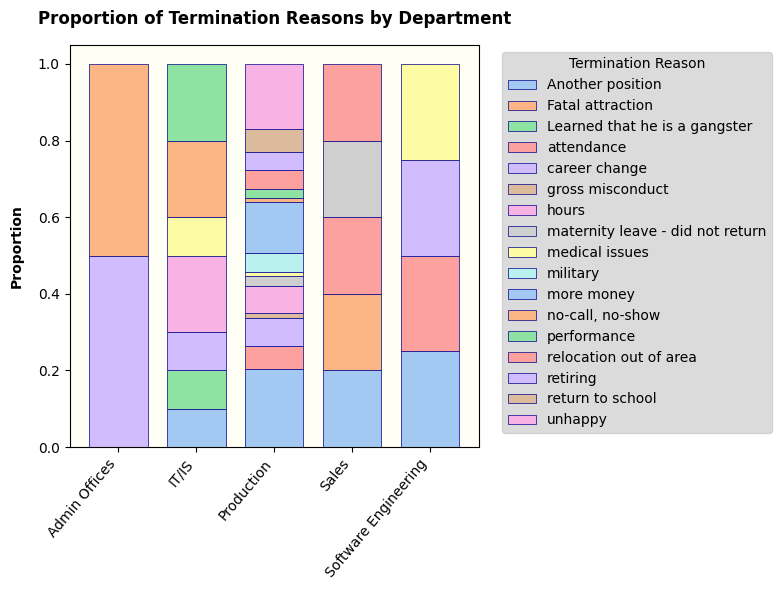

In [68]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(len(dept_counts_per_reason_df.columns))

# Exclude the 'Department' column from the sum calculation
dept_counts_per_reason_df['Total'] = dept_counts_per_reason_df.sum(axis=1)

# Calculate the proportion of each termination reason for each department
proportion_dept_counts_df = dept_counts_per_reason_df.div(dept_counts_per_reason_df['Total'], axis=0)
proportion_dept_counts_df.drop('Total', axis=1, inplace=True)

# Custom bar width.
bar_width = 0.75

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
proportion_dept_counts_df.plot(
    kind='bar', 
    color=pastel_colors, 
    edgecolor=bar_edge_color, 
    linewidth=0.5, 
    width=bar_width, 
    stacked=True, 
    ax=ax
)
ax.set_facecolor(chart_bg_color)

# Plotting
plt.title('Proportion of Termination Reasons by Department', fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Proportion', fontweight='bold', labelpad=10)
plt.xticks(rotation=50, ha='right')
plt.legend(title='Termination Reason', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Group Termination Reasons into Broader Categories

**Insight Generation:** 
* Broader categories can reveal overarching trends or issues that might not be immediately apparent when examining individual termination reasons. This can lead to deeper insights into workforce dynamics and potential areas for improvement

In [69]:
# Define the mapping of individual termination reasons to broader categories.
reason_to_category = {
    'Another position': 'Personal Reasons',
    'Fatal attraction': 'Personal Reasons',
    'Learned that he is a gangster': 'Personal Reasons',
    'attendance': 'Attendance',
    'career change': 'Career Development',
    'gross misconduct': 'Performance',
    'hours': 'Performance',
    'maternity leave - did not return': 'Health-related',
    'medical issues': 'Health-related',
    'military': 'Career Development',
    'more money': 'Financial Considerations',
    'no-call, no-show': 'Attendance',
    'performance': 'Performance',
    'relocation out of area': 'Relocation',
    'retiring': 'Retiring',
    'return to school': 'Career Development',
    'unhappy': 'Personal Reasons'
}

In [70]:
# Apply the mapping to create a new column with broader categories.
df_employed['TermReason_Category'] = df_employed['TermReason'].map(reason_to_category)

# Create a pivot table to count the occurrences of each race for each recruitment source
dept_counts_per_reason_df = df_employed.pivot_table(index='Department', columns='TermReason_Category', aggfunc='size', fill_value=0)

# Reset the index and rename the columns
dept_counts_per_reason_df = dept_counts_per_reason_df.reset_index().rename_axis(columns=None).set_index('Department')
dept_counts_per_reason_df

,Attendance,Career Development,Financial Considerations,Health-related,Performance,Personal Reasons,Relocation,Retiring
Department,,,,,,,,
Admin Offices,1,1,0,0,0,0,0,0
IT/IS,2,1,0,1,4,2,0,0
Production,6,15,11,3,9,31,4,4
Sales,1,0,0,1,0,2,1,0
Software Engineering,1,1,0,1,0,1,0,0


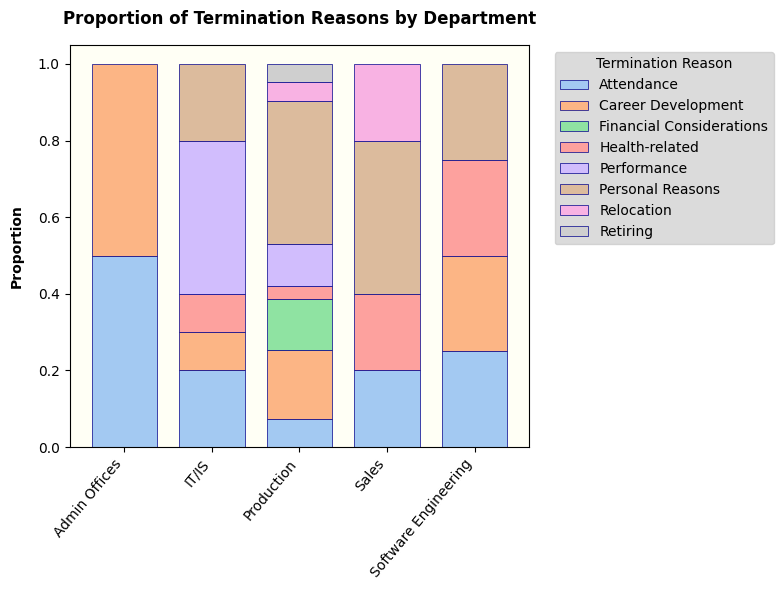

In [71]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(len(dept_counts_per_reason_df.columns))

# Total reasons per department.
dept_counts_per_reason_df['Total'] = dept_counts_per_reason_df.sum(axis=1)

# Calculate the proportion of each termination reason for each department.
proportion_dept_counts_df = dept_counts_per_reason_df.div(dept_counts_per_reason_df['Total'], axis=0)

# Drop the 'Total' column.
proportion_dept_counts_df.drop('Total', axis=1, inplace=True)

# Custom bar width.
bar_width = 0.75

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(8, 6))
proportion_dept_counts_df.plot(
    kind='bar', 
    color=pastel_colors, 
    edgecolor=bar_edge_color, 
    linewidth=0.5, 
    width=bar_width, 
    stacked=True, 
    ax=ax
)
ax.set_facecolor(chart_bg_color)

# Plotting
plt.title('Proportion of Termination Reasons by Department', fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Proportion', fontweight='bold', labelpad=10)
plt.xticks(rotation=50, ha='right')
plt.legend(title='Termination Reason', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Production Department:** Various factors contribute to the high attrition rate, with Personal Reasons notably driving elevated termination rates.

* **Actionable Items:**
1. Offer wellness programs and health support.
2. Explore flexible work arrangements.


**IT/IS and Software Engineering Departments:** High terminations related to career development.

* **Actionable Items:**
1. Enhance internal career advancement programs.
2. Conduct stay interviews.
3. Offer mentoring or coaching.
4. Ensure transparency in promotion processes.


**Admin Offices and Sales Departments:** Relatively low termination rates.

* **Actionable Items:**
1. Conduct exit interviews.
2. Implement retention initiatives.
3. Provide cross-training opportunities.


**Across All Departments:** Some terminations due to personal and health issues.

* **Actionable Items:**
1. Offer employee assistance programs.
2. Implement flexible work arrangements.
3. Foster a supportive culture with open communication.

### Attrition Rate by Race Description

* The **attrition rate for each race** represents the percentage of employees from that race who have left the organisation, **relative to the total count of employees from that race**. 
This allows to help understand the proportion of departures within each racial group.

In [72]:
# Copy original dataframe.
race_df = df.copy()

In [73]:
# Group by RaceDesc and calculate the mean performance score and attrition rate.
race_stats = race_df.groupby('RaceDesc').agg({'Termd': 'mean'}).reset_index()

# Sort by performance score in descending order.
race_stats_sorted = race_stats.sort_values(by='Termd', ascending=True)
race_stats_sorted

,RaceDesc,Termd
0,American Indian or Alaska Native,0.000000
3,Hispanic,0.000000
4,Two or more races,0.272727
1,Asian,0.310345
5,White,0.336898
2,Black or African American,0.362500


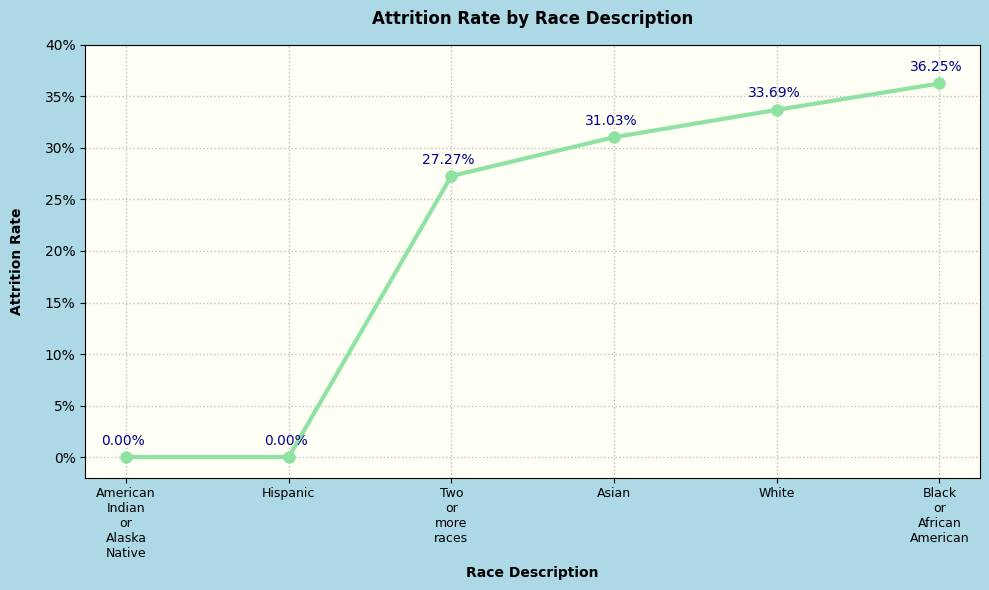

In [74]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightblue')

# Set background color of plot area.
ax.set_facecolor(chart_bg_color)

# Plot the data
ax.plot(race_stats_sorted['RaceDesc'], race_stats_sorted['Termd'], marker='o', 
        color=pastel_colors[2], linestyle='-',
        markersize=8, 
        linewidth=3.0)

# Add labels and title
ax.set_title('Attrition Rate by Race Description', color='black', fontweight='bold', pad=15)
ax.set_xlabel('Race Description', color='black', fontweight='bold')
ax.set_ylabel('Attrition Rate', color='black', fontweight='bold', labelpad=15)

# Set y-tick labels colour.
plt.yticks(color='black')

# Set y-axis limits.
plt.ylim(-0.02, 0.40)

# Convert y-axis values to percentages
y_vals = ax.get_yticks()
ax.set_yticklabels([f'{int(y * 100)}%' for y in y_vals])

# Adjust x-tick labels to add a new line for each word.
ax.set_xticklabels([label.replace(" ", "\n") for label in race_stats_sorted['RaceDesc']], color='black', ha='center', fontsize=9)

# Annotate markers with percentages rounded to two decimal places
for i, (x, y) in enumerate(zip(race_stats_sorted['RaceDesc'], race_stats_sorted['Termd'])):
    ax.annotate(f'{y * 100:.2f}%', (x, y), textcoords="offset points", xytext=(-2,9), ha='center', color='darkblue')

# Make grid lines thinner.
ax.grid(True, linewidth=1.0, linestyle=':', alpha=0.80)

plt.grid(True)
plt.tight_layout()
plt.show()

**High Attrition among Black or African American Employees:** 
* Black or African American employees have the highest attrition rate (36.25%) relative to their racial group total, indicating potential retention challenges or disparities within this demographic.

**Moderate Attrition for Two or More Races, Asian, and White Employees:** 
* Two or more races, Asian, and White employees show moderate attrition rates ranging from 27.27% to 33.69% relative to their respective racial group totals, suggesting relatively stable retention within these groups.

**Lowest Attrition among American Indian or Alaska Native and Hispanic Employees:**
* American Indian or Alaska Native and Hispanic employees exhibit the lowest attrition rates (0%) relative to their racial group totals, indicating strong retention within these demographics.

### Race Attrition Rate impact on Total Workforce

* Here I calculate the attrition rate of a specific race over the entire organisation's total employee count. To evaluate the proportion of departures from that race **relative to the entire workforce**. This provides insight into the impact of departures from a particular racial group on the organisation as a whole.

In [75]:
# Calculate the total count of employees.
total_employee_count = race_df.shape[0]

# Group by 'RaceDesc' and calculate the sum of 'Termd' column.
overall_race_stats = race_df.groupby('RaceDesc').agg({'Termd': 'sum'}).reset_index()

# Calculate the attrition rate relative to the total count of people in the organisation for each race.
overall_race_stats['AttritionRate'] = overall_race_stats['Termd'] / total_employee_count
overall_race_stats

,RaceDesc,Termd,AttritionRate
0,American Indian or Alaska Native,0,0.000000
1,Asian,9,0.028939
2,Black or African American,29,0.093248
3,Hispanic,0,0.000000
4,Two or more races,3,0.009646
5,White,63,0.202572


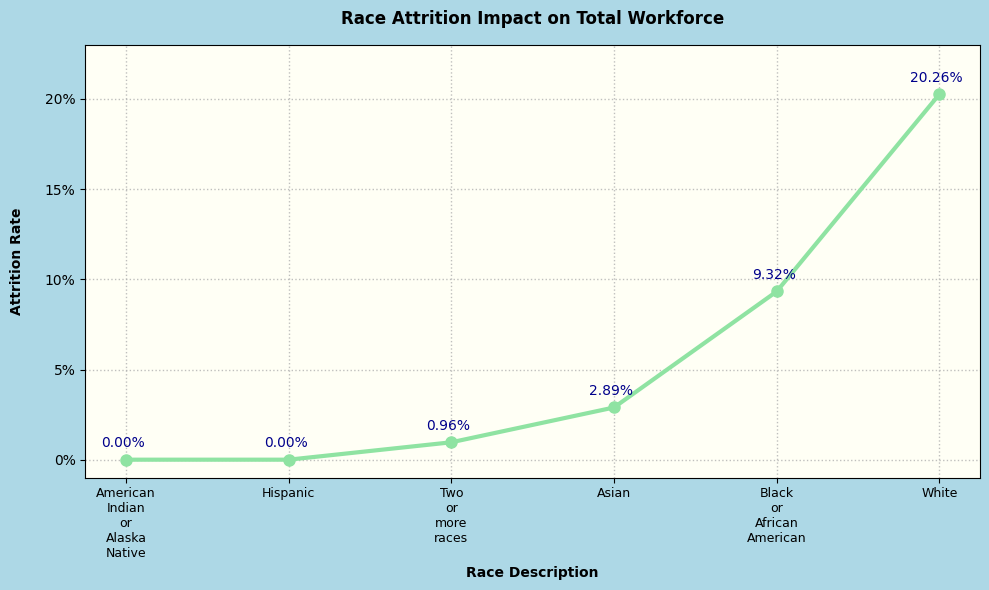

In [76]:
# Sort the dataframe by attrition rate in ascending order.
race_stats_sorted = overall_race_stats.sort_values(by='Termd')

# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightblue')

# Set background color of plot area.
ax.set_facecolor(chart_bg_color)

# Plot the data
ax.plot(race_stats_sorted['RaceDesc'], race_stats_sorted['AttritionRate'], marker='o', 
        color=pastel_colors[2], linestyle='-',
        markersize=8, 
        linewidth=3.0)

# Add labels and title
ax.set_title('Race Attrition Impact on Total Workforce', color='black', fontweight='bold', pad=15)
ax.set_xlabel('Race Description', color='black', fontweight='bold')
ax.set_ylabel('Attrition Rate', color='black', fontweight='bold', labelpad=15)

# Set y-tick labels colour.
plt.yticks(color='black')

# Set y-axis limits.
plt.ylim(-0.01, 0.23)

# Convert y-axis values to percentages
y_vals = ax.get_yticks()
ax.set_yticklabels([f'{int(y * 100)}%' for y in y_vals])

# Adjust x-tick labels to add a new line for each word.
ax.set_xticklabels([label.replace(" ", "\n") for label in race_stats_sorted['RaceDesc']], color='black', ha='center', fontsize=9)

# Annotate markers with percentages rounded to two decimal places
for i, (x, y) in enumerate(zip(race_stats_sorted['RaceDesc'], race_stats_sorted['AttritionRate'])):
    ax.annotate(f'{y * 100:.2f}%', (x, y), textcoords="offset points", xytext=(-2,9), ha='center', color='darkblue')

# Make grid lines thinner.
ax.grid(True, linewidth=1.0, linestyle=':', alpha=0.80)

plt.grid(True)
plt.tight_layout()
plt.show()

**Disproportionate Attrition for White Employees:** 
* While White employees have the highest absolute attrition rate (20.26%), their attrition rate relative to the total workforce size is noteworthy. With White employees constituting a significant portion of the total workforce, their attrition rate signals a substantial impact on overall turnover dynamics within the organisation

**Moderate Attrition for Black or African American Employees:**
* Despite having a lower absolute attrition rate compared to White employees, Black or African American employees exhibit a notable attrition rate relative to the total workforce (9.32%). Considering their representation within the workforce, this indicates a significant portion of Black or African American employees experiencing turnover, highlighting potential retention challenges or disparities within this racial group.

### Top 3 Termination Reasons by Race

In [77]:
race_term_counts = df_employed.groupby(['RaceDesc','TermReason']).size().reset_index(name='Count')

# Get top 3 termination reasons for each race
top_3_reasons_per_race = race_term_counts.groupby('RaceDesc').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_reasons_per_race

,RaceDesc,TermReason,Count
0,Asian,Another position,3
1,Asian,unhappy,3
2,Asian,more money,1
3,Black or African American,Another position,7
4,Black or African American,career change,4
5,Black or African American,attendance,3
6,Two or more races,Another position,1
7,Two or more races,performance,1
8,Two or more races,relocation out of area,1
9,White,Another position,9


* **"Another position"** appears as a termination reason for Asian, Black or African American, Two or more races, and White employees. This suggests that employees may be leaving to pursue opportunities in other positions or companies.

* **"Career change"** is more prevalent among Black or African American employees compared to other racial groups. This suggests that career advancement or changes in career goals may be more common reasons for leaving among this demographic.

* Among White employees, "Another position", "More money", and "Unhappy" are equally prevalent termination reasons, with each reason cited nine times. This consistency suggests that these factors may contribute significantly to turnover within the White demographic.

**Actionable Insight:**

* Implement exit interviews to understand the specific motivations behind employees seeking other positions, higher salaries, or expressing unhappiness, across all racial groups. Understanding these motivations can help tailor retention strategies and address underlying issues effectively.

### Attrition Rate by Special Projects Count

In [78]:
pearson_coef, p_value = stats.pearsonr(df['SpecialProjectsCount'], df['Termd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.14742910417277896  with a P-value of P = 0.009221967246014607


* Projects has a moderate negative correlation with Termination, also has a low pearson value < 0.05 suggesting a moderate certainty in the results.

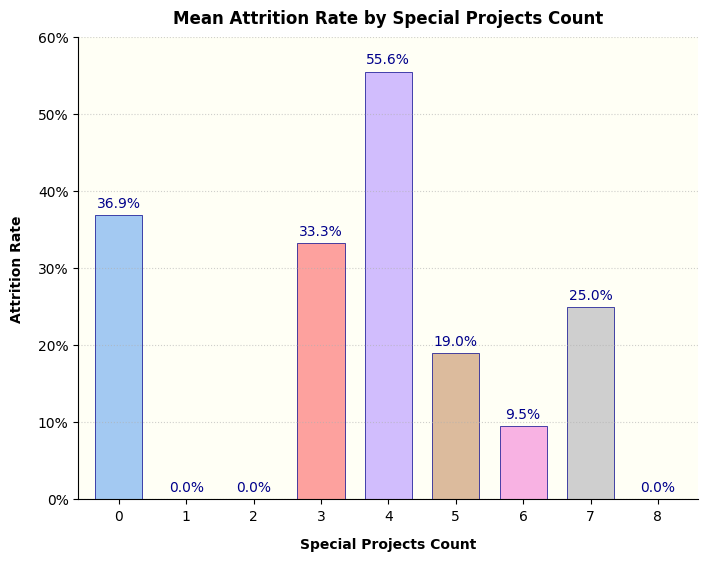

In [79]:
# Calculate the mean attrition rate for each SpecialProjectsCount group
attrition_rate_by_project_count = df.groupby('SpecialProjectsCount')['Termd'].mean()

# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(len(attrition_rate_by_project_count))

bar_width = 0.7 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor(chart_bg_color)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plotting the attrition rate for each SpecialProjectsCount
attrition_rate_by_project_count.plot(kind='bar', color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Annotate bars with percentages
for i, rate in enumerate(attrition_rate_by_project_count):
    ax.text(i, rate + 0.01, f'{rate:.1%}', ha='center', color='darkblue', fontsize=10)

# Set y-label ticks to display percentages
ax.set_yticklabels([f'{tick:.0%}' for tick in ax.get_yticks()])

# Customising the plot
plt.xlabel('Special Projects Count', fontweight='bold', labelpad=10)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.ylim(0.0, 0.6)
plt.title('Mean Attrition Rate by Special Projects Count', fontweight='bold', pad=10)
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated
plt.grid(True, alpha=0.60, axis='y', linestyle=':')
plt.show()

* There appears to be a trend where the attrition rate tends to increase as the number of special projects increases. For instance, SpecialProjectsCount of 4 and 7 have higher attrition rates of 55.56% and 25.00% respectively. This could indicate potential burnout or increased workload associated with managing multiple projects concurrently, leading to higher turnover.

* SpecialProjectsCount of 0 has a high attrition rate at 36.93%. This could be due to various factors such as lack of engagement or motivation resulting from the absence of challenging projects, stagnant career growth opportunities, or dissatisfaction with job roles.

### Identifying the Peak Year of Terminations

In [80]:
# Convert 'DateofTermination' column to datetime.
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

In [81]:
# Extract year from TerminationYear.
df['TerminationYear'] = df['DateofTermination'].dt.year

# Count occurrences of each year.
termination_counts = df['TerminationYear'].value_counts()

# Display year and total count for terminations.
print("Year   TotalCount")
print("-----------------")
for year, count in termination_counts.sort_index().items():
    print(f"{int(year)}    {count}")

Year   TotalCount
-----------------
2010    1
2011    3
2012    8
2013    13
2014    13
2015    23
2016    22
2017    8
2018    13


In [82]:
# Filter to terminations in 2015 and 2016.
df_terminations_2015_2016 = df[(df['DateofTermination'].dt.year.isin([2015, 2016])) & (df['Termd'] == 1)]

# Group by TermReason and count terminations for each reason
reason_termination_counts = df_terminations_2015_2016['TermReason'].value_counts()

# Display the reasons for terminations in 2015 and 2016.
print("Reasons for terminations in 2015 and 2016:\n")
print(reason_termination_counts.head(7))

Reasons for terminations in 2015 and 2016:

TermReason
unhappy             6
Another position    5
more money          4
attendance          4
career change       3
performance         3
hours               3
Name: count, dtype: int64


* This insight effectively links the prevalence of "unhappy" as a termination reason in 2015 and 2016 to potential dissatisfaction within the organisation. It suggests that efforts such as to improve workplace culture and employee well-being may have led to a decrease in attrition, potentially evident in the following year, 2017.

In [83]:
# Group by ManagerName and count terminations for each manager.
manager_termination_counts = df_terminations_2015_2016[['ManagerName','Department']].value_counts()

# Display the manager with the most terminations in 2015 and 2016.
print("Manager with the most terminations in 2015 and 2016:\n")
manager_termination_counts.head()


Manager with the most terminations in 2015 and 2016:



ManagerName     Department
Webster Butler  Production    7
Amy Dunn        Production    7
Simon Roup      IT/IS         6
Elijiah Gray    Production    4
Kissy Sullivan  Production    3
Name: count, dtype: int64

### Attrition Rate in Years of Service
Using bins for years of service

In [84]:
# Convert 'DateofHire' and 'DateofTermination' columns to datetime format.
yos_df = df.copy()
yos_df['DateofHire'] = pd.to_datetime(yos_df['DateofHire'])
yos_df['DateofTermination'] = pd.to_datetime(yos_df['DateofTermination'])

# Get the current date.
current_date = pd.to_datetime('now')

# Calculate the duration of service for active employees.
yos_df['DateofTermination'] = yos_df['DateofTermination'].fillna(current_date, inplace=False)
yos_df['years_of_service'] = ((yos_df['DateofTermination'] - yos_df['DateofHire']).dt.days / 365.25).astype(int) # account for leap years

# Define bins for years of service
bins = np.arange(0, yos_df['years_of_service'].max(), 5)

# Create labels for the bins. Bin edges are inclusive on the left and exclusive on the right. 
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Convert years_of_service into bins.
yos_df['years_of_service_bins'] = pd.cut(yos_df['years_of_service'], bins=bins, labels=labels, right=False)

# Group by years of service bins and termination status, then calculate the mean
attrition_rate_yos = yos_df.groupby('years_of_service_bins')['DateofTermination'].apply(lambda x: (x < current_date).mean()).reset_index()
attrition_rate_yos.rename(columns={'DateofTermination': 'attrition_rate'}, inplace=True)

print(attrition_rate_yos)

  years_of_service_bins  attrition_rate
0                   0-4        1.000000
1                   5-9        0.220339
2                 10-14        0.000000


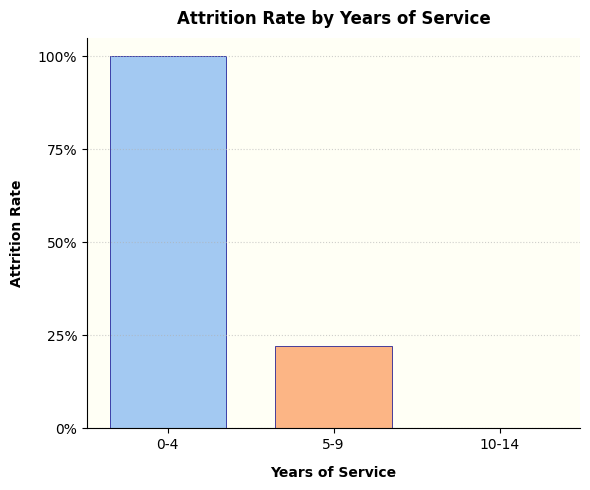

In [85]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(yos_df['years_of_service_bins'].nunique())

bar_width = 0.7 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(6,5))
ax.set_facecolor(chart_bg_color)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.bar(attrition_rate_yos['years_of_service_bins'], attrition_rate_yos['attrition_rate'], 
        color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Set y-label ticks to display percentages
yticks = np.arange(0, 1.01, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

# Adding labels and title
plt.title('Attrition Rate by Years of Service', fontweight='bold', pad=10)
plt.xlabel('Years of Service', fontweight='bold', labelpad=10)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.xticks(rotation=0)

# Display plot
plt.tight_layout()
plt.grid(True, alpha=0.60, axis='y', linestyle=':')
plt.show()

* A significant proportion of employees leave the organisation within the first few years of employment.
* There is a high level of retention among employees who have been with the organisation for a decade or more.

### Attrition Rate by Salary Bins

In [86]:
# Group by 'Salary' and calculate the mean of 'Termd'
attrition_by_salary = df.groupby('Salary')['Termd'].mean().reset_index(name='AttritionRate')

# Define the bins for Salary.
bin_step = 20000
bins = np.arange(40000, attrition_by_salary['Salary'].max(), bin_step)

# Create labels for the bins. Bin edges are inclusive on the left and exclusive on the right. 
labels = [f"{i}-{i+bin_step}" for i in bins[:-1]]

# Convert Salary into bins.
grouped_by_salary_bins = pd.cut(df['Salary'], bins=bins, labels=labels, right=False)

# Create salary bins and calculate mean attrition rate for each bin
attrition_by_salary_bins = df.groupby(grouped_by_salary_bins)['Termd'].mean().reset_index(name='AttritionRate')

# Fill missing values in AttritionRate column with 0.
attrition_by_salary_bins['AttritionRate'].fillna(0, inplace=True)

# Display the DataFrame
print(attrition_by_salary_bins)

          Salary  AttritionRate
0    40000-60000       0.404959
1    60000-80000       0.295455
2   80000-100000       0.212121
3  100000-120000       0.500000
4  120000-140000       0.500000
5  140000-160000       0.250000
6  160000-180000       0.000000
7  180000-200000       0.000000
8  200000-220000       0.000000
9  220000-240000       0.000000


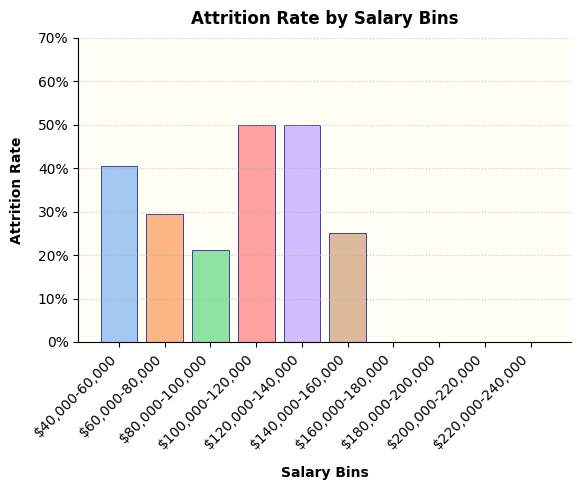

In [87]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(attrition_by_salary_bins['Salary'].nunique())

bar_width = 0.8 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(6,5))
ax.set_facecolor(chart_bg_color)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.bar(attrition_by_salary_bins['Salary'], attrition_by_salary_bins['AttritionRate'], 
        color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Set y-label ticks to display percentages
yticks = np.arange(0, 1.01, 0.10)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

# Adding labels and title
plt.title('Attrition Rate by Salary Bins', fontweight='bold', pad=10)
plt.xlabel('Salary Bins', fontweight='bold', labelpad=10)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.xticks(rotation=45)

# Get the current tick positions and labels.
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left.
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)
    
# Modify the x-tick labels to add $ and comma separators.
new_tick_labels = []
for tick in ticks:
    salary_range = tick.get_text()
    # Add $ and format with commas
    new_label = '${:,.0f}'.format(float(salary_range.split('-')[0])) + '-' + '{:,.0f}'.format(float(salary_range.split('-')[1]))
    new_tick_labels.append(new_label)

# Set the modified tick labels
plt.xticks(np.arange(len(new_tick_labels)), new_tick_labels, rotation=45)

# Display plot
plt.tight_layout()
plt.ylim(0, 0.70)
plt.grid(True, alpha=0.70, axis='y', linestyle=':')
plt.show()

* The salary bins ranging from 100,000 to 120,000 and 120,000 to 140,000 demonstrate particularly high attrition rates, with rates reaching 50%.

**Actionable Items:**
* **Review** the compensation packages for employees in the 100,000 to 140,000 salary range. Ensure that they are competitive compared to industry standards and offer attractive benefits and incentives to retain talent
* **Evaluate** the career development opportunities available within the organisation for employees in the high-attrition salary range. Identify areas for improvement such as training programs, mentorship opportunities, or promotion pathways to increase employee engagement and retention.

### Attrition Rate by Manager
[Back to Top](#Table-of-Contents:)

In [88]:
# Group by 'ManagerName' and count the number of unique departments.
manager_departments_count = df.groupby('ManagerName')['Department'].nunique()

# Filter managers who have worked in more than one department.
managers_multiple_depts = manager_departments_count[manager_departments_count > 1].index.tolist()

# Filter the original dataframe to include only the rows where the manager has worked in multiple departments.
df_multiple_depts = df[df['ManagerName'].isin(managers_multiple_depts)]

print(f'Managers who have worked in multiple departments: {managers_multiple_depts}')

Managers who have worked in multiple departments: ['Board of Directors', 'Janet King', 'Jennifer Zamora']


#### Top 5 Manager Attrition Rates

In [89]:
# Group by Manager and calculate the mean attrition rate.
manager_attrition_rates = df.groupby(['ManagerName'])['Termd'].mean().reset_index().sort_values(by='Termd', ascending=False)
manager_attrition_rates = manager_attrition_rates.rename(columns={'Termd': 'AttritionRate'})
manager_attrition_rates.head()

,ManagerName,AttritionRate
20,Webster Butler,0.619048
1,Amy Dunn,0.619048
15,Kissy Sullivan,0.545455
19,Simon Roup,0.470588
17,Michael Albert,0.409091


#### Manager-wise Attrition Rates

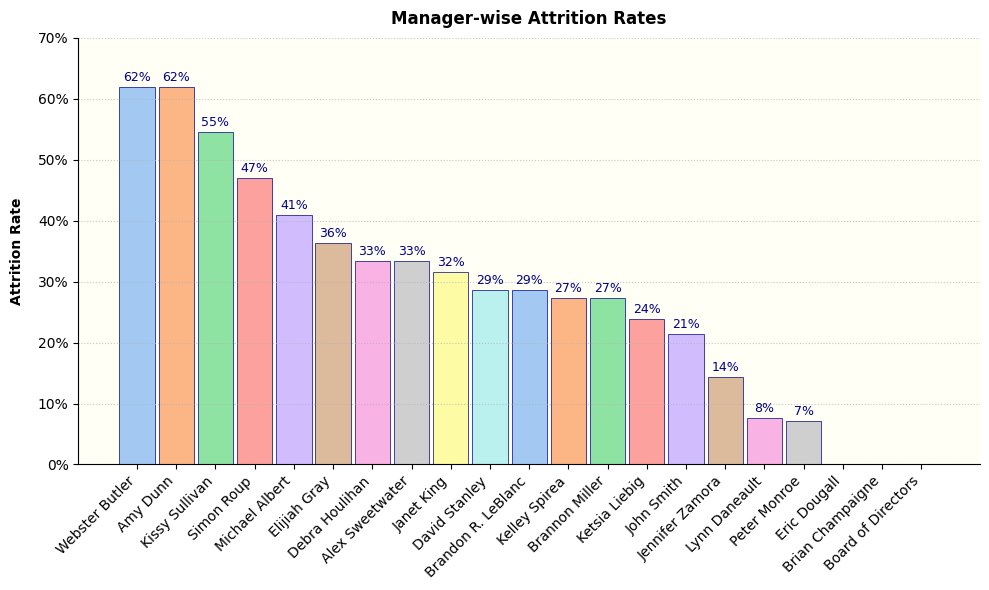

In [90]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(len(manager_attrition_rates))

bar_width = 0.9 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor(chart_bg_color)

# Set y-label ticks to display percentages
yticks = np.arange(0, 1.01, 0.10)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

# Get the current tick positions and labels.
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left.
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot the bar plot
plt.bar(manager_attrition_rates['ManagerName'], manager_attrition_rates['AttritionRate'], 
        color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Annotate bars with percentages
for i, rate in enumerate(manager_attrition_rates['AttritionRate']):
    if rate > 0.00:
        ax.text(i, rate + 0.01, f'{rate:.0%}', ha='center', color='darkblue', fontsize=9)

# Add labels and title
plt.xlabel('', fontsize=12)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.title('Manager-wise Attrition Rates', fontweight='bold', pad=10)
plt.xticks(rotation=45)

# Display plot
plt.tight_layout()
plt.ylim(0, 0.70)
plt.grid(True, alpha=0.70, axis='y', linestyle=':')
plt.show()

**High Attrition Rates:** 
* Managers like Webster Butler and Amy Dunn have the highest attrition rates, both at approximately 62%. This suggests that there may be issues within their respective departments or managerial styles that are contributing to higher turnover rates.

**Varied Attrition Rates:** 
* There is a wide range of attrition rates among different managers, ranging from 0% to over 60%. This indicates that managerial effectiveness and leadership styles may vary significantly across the organisation.

**Potential Areas for Improvement:** 
* Managers with higher attrition rates, such as Kissy Sullivan, Simon Roup, and Michael Albert, could benefit from additional support, training, or resources to help improve employee retention and satisfaction within their teams.

**Low Attrition Rates:** 
* Managers like Eric Dougall, Brian Champaigne, and the Board of Directors have attrition rates of 0%. While this may indicate effective leadership and positive work environments, it's also important to ensure that low attrition rates are not masking underlying issues such as lack of career advancement opportunities or employee engagement.

**Further Investigation:** 
* Managers with unexpectedly low or high attrition rates may warrant further investigation to understand the factors contributing to these rates. This could involve conducting employee surveys, performance reviews, or manager evaluations to identify areas for improvement or areas of success.

In [91]:
# Filter rows where ManagerName is 'Webster Butler'
webster_butler_data = df[df['ManagerName'] == 'Webster Butler']

# Calculate the sum of the Terminations.
total_termds = webster_butler_data['Termd'].sum()

# Count the number of rows for the total number of employees.
total_employees = len(webster_butler_data)

print("Total Terminations for Webster Butler:", total_termds)
print("Total Employees under Webster Butler:", total_employees)

Total Terminations for Webster Butler: 13
Total Employees under Webster Butler: 21


In [92]:
# Group the dataframe by ManagerName and calculate the mean engagement survey score and attrition rate.
engagement_attrition_manager = df.groupby('ManagerName').agg({'Termd': 'mean', 'EngagementSurvey': 'mean'}).reset_index().rename(columns={'Termd': 'AttritionRate'})

# Sort by performance score in descending order
engagement_attrition_manager = engagement_attrition_manager.sort_values(by='AttritionRate', ascending=False)
engagement_attrition_manager.head()

,ManagerName,AttritionRate,EngagementSurvey
20,Webster Butler,0.619048,4.325238
1,Amy Dunn,0.619048,3.924762
15,Kissy Sullivan,0.545455,4.039091
19,Simon Roup,0.470588,4.225294
17,Michael Albert,0.409091,4.066818


In [93]:
# Check Janet King's department in performance_attrition_manager
janet_king_in_performance = engagement_attrition_manager[engagement_attrition_manager['ManagerName'] == 'Janet King']
janet_king_in_performance

,ManagerName,AttritionRate,EngagementSurvey
10,Janet King,0.315789,4.182105


In [94]:
# Calculate Pearson correlation coefficient and p-value for EmpSatisfaction vs Termd
pearson_coef_emp, p_value_emp = stats.pearsonr(df['EmpSatisfaction'], df['Termd'])
print("The Pearson Correlation Coefficient between EmpSatisfaction and Termd is", pearson_coef_emp, " with a P-value of P =", p_value_emp)

# Calculate Pearson correlation coefficient and p-value for EngagementSurvey vs Termd
pearson_coef_eng, p_value_eng = stats.pearsonr(df['EngagementSurvey'], df['Termd'])
print("The Pearson Correlation Coefficient between EngagementSurvey and Termd is", pearson_coef_eng, " with a P-value of P =", p_value_eng)

The Pearson Correlation Coefficient between EmpSatisfaction and Termd is -0.004731666973705058  with a P-value of P = 0.9337654152178528
The Pearson Correlation Coefficient between EngagementSurvey and Termd is -0.017542876228090087  with a P-value of P = 0.7579682377443097


### Gender-based Attrition Rate
[Back to Top](#Table-of-Contents:)

####  Relative to Total Terminations
* Attrition rates presented below are relative to the total number of terminations in the dataset. It implies that the attrition rates shown represent the proportion of terminations for each gender **out of the total terminations** observed.

In [95]:
terminated_female_count = ((df['Sex'] == 'F') & (df['Termd'] == 1)).sum()
print(f'Total females terminated: {terminated_female_count}')

terminated_male_count = ((df['Sex'] == 'M') & (df['Termd'] == 1)).sum()
print(f'Total males terminated: {terminated_male_count}')

Total females terminated: 60
Total males terminated: 44


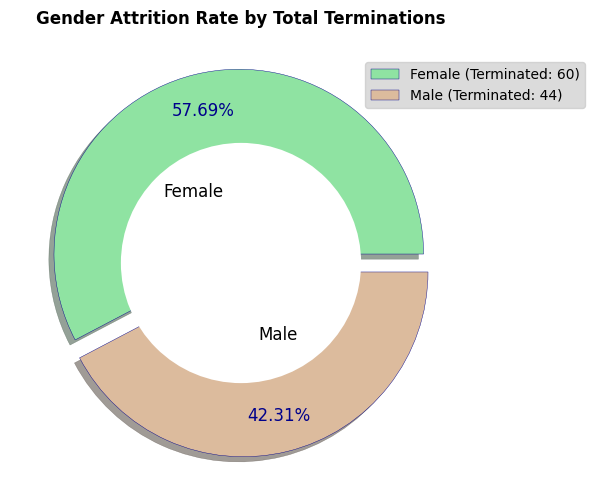

In [96]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)

# Set custom colors for 'Female' and 'Male' categories.
female_color = pastel_colors[2]
male_color = pastel_colors[5]

# Count of terminated male and female employees.
terminated_female_count = ((df['Sex'] == 'F') & (df['Termd'] == 1)).sum()
terminated_male_count = ((df['Sex'] == 'M') & (df['Termd'] == 1)).sum()

# Total terminations.
total_terminations = df['Termd'].sum()

# Calculate the termination rate for male and female employees.
termination_rate_female = terminated_female_count / total_terminations * 100
termination_rate_male = terminated_male_count / total_terminations * 100

# Gender data.
gender_counts = df['Sex'].value_counts()
sizes = gender_counts.values

# Get counts of females and males
female_count = sizes[0] if 'Female' in labels else 0
male_count = sizes[1] if 'Male' in labels else 0

# Define labels for the pie chart
labels = ['Female', 'Male']
explode = (0.05, 0.05)

# Create legend labels with additional text.
legend_labels = [f'{label} (Terminated: {count})' for label, count in zip(labels, [terminated_female_count, terminated_male_count])]

# Pie Chart.
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = plt.pie([termination_rate_female, termination_rate_male], labels=labels, 
                                   colors=[female_color, male_color], 
                                   autopct='%1.2f%%', 
                                   pctdistance=0.80, 
                                   explode=explode,
                                   labeldistance=0.35, 
                                   wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
                                   textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '12'},
                                   shadow=True)

# Draw inner circle for donut effect.
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()

# Adding circle in pie chart.
fig.gca().add_artist(centre_circle)

# Adding title of the chart.
plt.title('Gender Attrition Rate by Total Terminations', fontweight='bold')

# Add Legends.
plt.legend(legend_labels, loc="upper right", bbox_to_anchor=(1.26, 0.95))

# Set font color of text labels.
for text in texts:
    text.set_color('black')
    text.set_fontsize('12')

# Display the chart.
plt.show()

* Out of the total terminations observed, 60 were females and 44 were males. This distribution suggests a slightly higher number of female terminations compared to male terminations.

* Analysing the total number of terminations by gender gives an **initial overview** of the distribution of terminations between male and female employees. 

    - This information alone **does not account for differences in the size of the male and female workforce** or provide insight into the relative impact of terminations on each gender group.
    
    
* To gain a deeper understanding, I will explore the relative severity of attrition within each gender group below. This dual approach ensures a comprehensive assessment of attrition dynamics and informs targeted strategies for addressing gender-specific retention challenges.

#### Gender-based Attrition Rates
* Attrition rates presented are calculated based on the average proportion of employees leaving the company **within each gender group**

In [97]:
gender_attrition_df = df.groupby('Sex')['Termd'].mean()
gender_attrition_df.reset_index()

,Sex,Termd
0,F,0.340909
1,M,0.325926


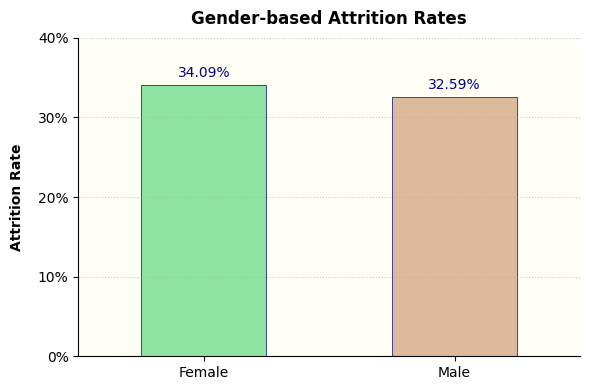

In [98]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(6)

# Set custom colors for 'Female' and 'Male' categories.
female_color = pastel_colors[2]
male_color = pastel_colors[5]

bar_width = 0.5 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(6,4))
ax.set_facecolor(chart_bg_color)

# Set y-label ticks to display percentages
yticks = np.arange(0, 1.01, 0.10)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

# Get the current tick positions and labels.
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left.
for tick in ticks:
    tick.set_horizontalalignment('center')
    tick.set_x(-0.5)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot the bar plot
gender_attrition_df.plot(kind='bar', 
        color=[female_color, male_color], edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Add x-axis labels.
plt.xticks(range(len(gender_attrition_df)), ['Female', 'Male'], rotation=0)

# Annotate bars with percentages.
for i, rate in enumerate(gender_attrition_df.values):
    if rate > 0.00:
        ax.text(i, rate + 0.01, f'{rate:.2%}', ha='center', color='darkblue', fontsize=10)

# Add labels and title
plt.xlabel('', fontsize=12)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.title('Gender-based Attrition Rates', fontweight='bold', pad=10)

# Display plot
plt.tight_layout()
plt.ylim(0, 0.40)
plt.grid(True, alpha=0.70, axis='y', linestyle=':')
plt.show()

* 34.09% attrition rate indicates the proportion of female employees who have left the company relative to the total number of female employees included in the analysis.

* With termination rates of approximately 34.09% for females and 32.59% for males, the attrition rate between genders are very close, indicating a relatively balanced proportion of terminations across genders for the organisation.

**Actionable Items:**

* While the attrition rates may be similar now, they could change over time. Continuously monitoring attrition trends and soliciting feedback from employees can help identify evolving challenges and opportunities for improvement.

### Employee Satisfaction by Termination Status
[Back to Top](#Table-of-Contents:)

In [99]:
df.groupby(['EmpSatisfaction', 'Termd']).size().reset_index(name='count')

,EmpSatisfaction,Termd,count
0,1,0,2
1,2,0,5
2,2,1,4
3,3,0,75
4,3,1,33
5,4,0,56
6,4,1,38
7,5,0,69
8,5,1,29


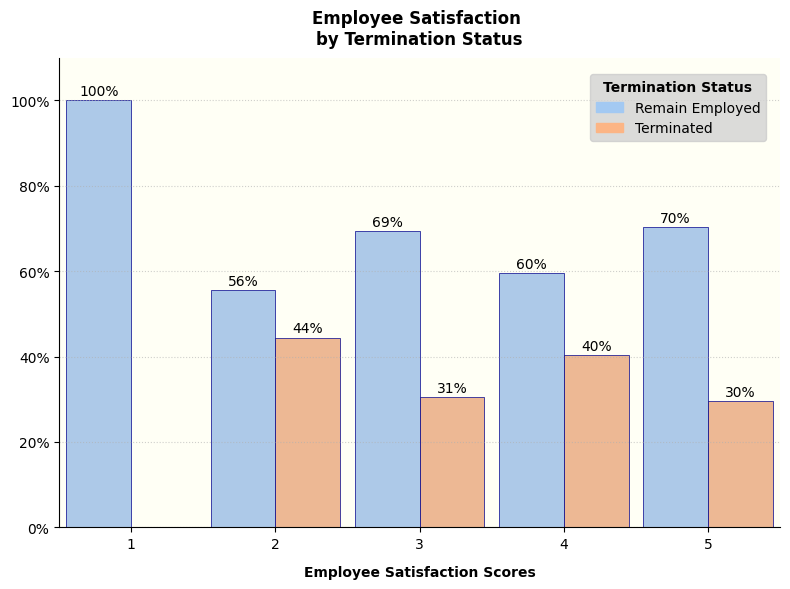

In [100]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(2)

bar_width = 0.90 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor(chart_bg_color)

# Define labels for the pie chart
labels = ['Remain Employed', 'Terminated']

# Create legend labels with additional text
legend_labels = [f'{label}' for label in labels]

# Create custom legend handles using empty proxy artists.
handles = [plt.Rectangle((0,0),1,1, color=color) for color in pastel_colors]

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
        
# Calculate percentages for each 'Termd' group within each 'EmpSatisfaction' category
percentage_df = df.groupby(['EmpSatisfaction', 'Termd']).size().reset_index(name='count')
percentage_df['percentage'] = percentage_df.groupby('EmpSatisfaction')['count'].transform(lambda x: x / x.sum() * 100)

# Create a grouped bar plot for 'EmpSatisfaction' with 'Termd' as hue
sns.barplot(x='EmpSatisfaction', y='percentage', hue='Termd', data=percentage_df, palette=[pastel_colors[0], pastel_colors[1]],
            width=bar_width, edgecolor=bar_edge_color, linewidth=0.5)

# Annotate each bar with percentages
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.0f}%', ha='center', va='bottom')

# Convert y-axis tick labels to percentages
ticks = ax.get_yticks()
ax.set_yticklabels([f'{tick:.0f}%' for tick in ticks])

# Set the title and labels
plt.title('Employee Satisfaction \nby Termination Status', fontweight='bold', pad=10)
plt.xlabel('Employee Satisfaction Scores', fontweight='bold', labelpad=10)
plt.ylabel('')

# Show the plot
legend = plt.legend(title='Termination Status', labels=legend_labels, handles=handles, loc="upper right", bbox_to_anchor=(0.99, 0.98))
legend.get_title().set_fontweight('bold')
plt.tight_layout()
plt.ylim(0, 110)
plt.grid(True, alpha=0.60, axis='y', linestyle=':')
plt.show()

**Employee Satisfaction Scores Analysis:**

Employee satisfaction levels appear to have some relationship with termination rates within the organisation, but the strength and significance of this relationship may vary. 

**Score 1:** All employees remained employed with a termination rate of 0%. This suggests a high level of satisfaction among employees in this category, indicating that they are less likely to leave the company. Although this conclusion is drawn from a small sample size of 2 employees.

**Score 2:** Approximately 44.44% of employees at this satisfaction level faced termination, indicating dissatisfaction among a significant portion of this group.

**Score 3:** Experienced a termination rate of about 30.56%, suggesting a notable proportion of employees leaving the company, despite having a moderate satisfaction level.

**Score 4:** The termination rate is approximately 40.43%, indicating that employees with higher satisfaction levels are not immune to leaving the company.

**Score 5:** Despite having the highest satisfaction level, around 29.59% of employees in this category faced termination, albeit at a lower rate compared to lower satisfaction levels.

These findings highlight the importance of addressing satisfaction levels to improve retention rates within the organisation. Implementing targeted retention strategies, such as improving communication, providing additional training and development opportunities, and addressing underlying issues contributing to dissatisfaction, can help mitigate attrition and foster a more engaged workforce.

In [101]:
pearson_coef, p_value = stats.pearsonr(df['EmpSatisfaction'], df['Termd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.004731666973705058  with a P-value of P = 0.9337654152178528


* The p-value associated with the correlation coefficient is approximately 0.934. This high p-value indicates that the observed correlation is not statistically significant.
* A weak negative linear relationship between EmpSatisfaction and Termination status variables.

Although the observed correlation lacks statistical significance of the observed correlation, the descriptive analysis still provides valuable insights. Distinct patterns in termination rates across satisfaction levels highlight potential trends and patterns that warrant attention. Alternative models, such as Bayesian methods and non-linear regression models may capture more complex relationships that may not be adequately represented by linear regression.

### Attrition Rate by Martical Description
[Back to Top](#Table-of-Contents:)

In [102]:
df['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

In [103]:
marital_df = df.groupby('MaritalDesc')['Termd'].mean().reset_index(name='AttritionRate').sort_values(by='AttritionRate', ascending=False)
marital_df

,MaritalDesc,AttritionRate
0,Divorced,0.533333
4,Widowed,0.500000
1,Married,0.379032
3,Single,0.262774
2,Separated,0.083333


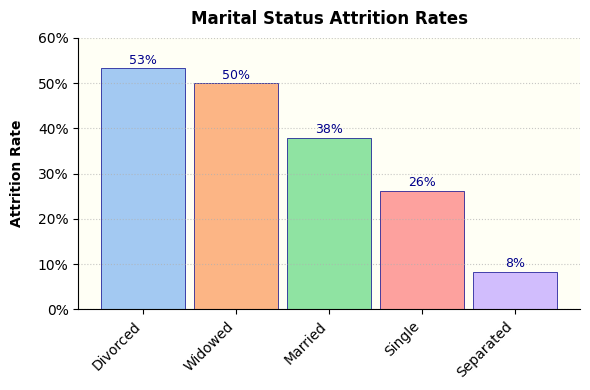

In [104]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(len(marital_df))

bar_width = 0.9 # custom bar width.

# Plot the bar plot.
fig, ax = plt.subplots(figsize=(6,4))
ax.set_facecolor(chart_bg_color)

# Set y-label ticks to display percentages
yticks = np.arange(0, 1.01, 0.10)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{tick:.0%}' for tick in yticks])

# Get the current tick positions and labels.
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left.
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot the bar plot
plt.bar(marital_df['MaritalDesc'], marital_df['AttritionRate'], 
        color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)

# Annotate bars with percentages
for i, rate in enumerate(marital_df['AttritionRate']):
    if rate > 0.00:
        ax.text(i, rate + 0.01, f'{rate:.0%}', ha='center', color='darkblue', fontsize=9)

# Add labels and title
plt.xlabel('', fontsize=12)
plt.ylabel('Attrition Rate', fontweight='bold', labelpad=10)
plt.title('Marital Status Attrition Rates', fontweight='bold', pad=10)
plt.xticks(rotation=45)

# Display plot
plt.tight_layout()
plt.ylim(0, 0.60)
plt.grid(True, alpha=0.70, axis='y', linestyle=':')
plt.show()

**Highest Attrition Rate:**

* Divorced individuals have the highest attrition rate at 53.33%. This suggests that employees who are divorced are more likely to leave the company compared to other marital statuses.

**Second Highest Attrition Rate:**

* Widowed individuals have the second highest attrition rate at 50%. While this rate is high, it's important to note that the sample size might be smaller for widowed individuals, so the result might be less representative.

**Lowest Attrition Rate:**

* Separated individuals have the lowest attrition rate at 8.33%. This indicates that employees who are separated are least likely to leave the company.

**Actionable Insight**

* HR might want to explore the reasons behind the high attrition rates among divorced and widowed employees. It could be related to work-life balance, support systems, or other factors

***

## Recruitment Source Distribution and by Race Analysis
[Back to Top](#Table-of-Contents:)

In [105]:
source_counts = df['RecruitmentSource'].value_counts().sort_values(ascending=True)
source_counts.to_frame().reset_index()

,RecruitmentSource,count
0,On-line Web application,1
1,Other,2
2,Website,13
3,CareerBuilder,23
4,Diversity Job Fair,29
5,Employee Referral,31
6,Google Search,49
7,LinkedIn,76
8,Indeed,87


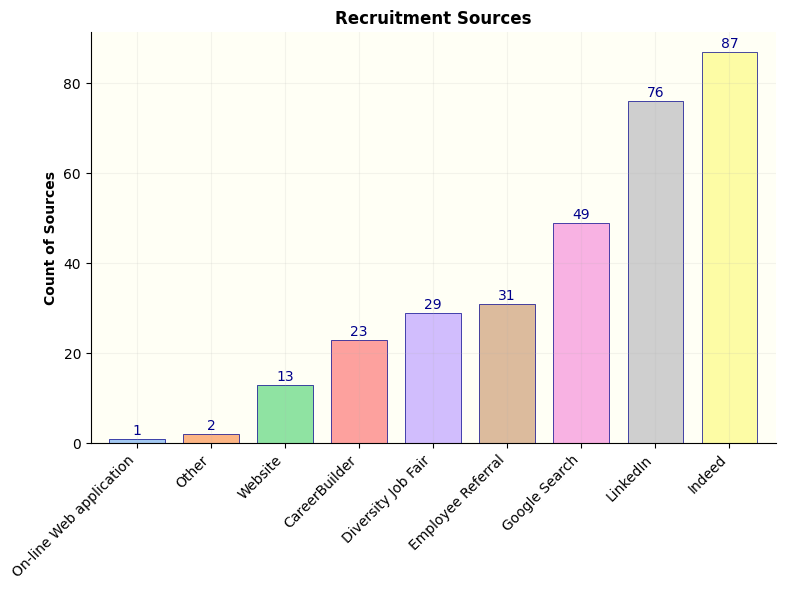

In [106]:
# Generate a pastel color palette based on the number of recruitment sources.
pastel_colors = generate_pastel_palette(len(source_counts))

# Define the width of the bars.
bar_width = 0.75

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8,6))
source_counts.plot(kind='bar', color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width)
ax.set_facecolor(chart_bg_color)

# Adjust the limits of the y-axis.
ax.set_ylim(0,)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Annotate bars with figure just below the top of each bar.
for i, count in enumerate(source_counts):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', color=annotation_color)

plt.xlabel('')
plt.ylabel('Count of Sources', fontweight='bold')
plt.title('Recruitment Sources', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.15)
plt.show()

Online Platforms Dominance:
* Indeed, LinkedIn, Google Search, and the company's website seem to be the most effective channels for sourcing candidates, as they collectively account for a significant portion of the hires

In [107]:
source_by_race = df.groupby('RaceDesc')['RecruitmentSource'].value_counts().reset_index()
source_by_race

,RaceDesc,RecruitmentSource,count
0,American Indian or Alaska Native,Google Search,1
1,American Indian or Alaska Native,Indeed,1
2,American Indian or Alaska Native,LinkedIn,1
3,Asian,Indeed,10
4,Asian,LinkedIn,8
5,Asian,Google Search,7
6,Asian,CareerBuilder,2
7,Asian,Employee Referral,1
8,Asian,Website,1
9,Black or African American,Diversity Job Fair,29


In [108]:
# Create a pivot table with mean salary for each position grouped by gender
pivot_table = source_by_race.pivot_table(index='RaceDesc', columns='RecruitmentSource', values='count', fill_value=0)
pivot_table

RecruitmentSource,CareerBuilder,Diversity Job Fair,Employee Referral,Google Search,Indeed,LinkedIn,On-line Web application,Other,Website
RaceDesc,,,,,,,,,
American Indian or Alaska Native,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Asian,2.0,0.0,1.0,7.0,10.0,8.0,0.0,0.0,1.0
Black or African American,5.0,29.0,5.0,4.0,17.0,16.0,0.0,0.0,4.0
Hispanic,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Two or more races,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,1.0
White,16.0,0.0,25.0,35.0,54.0,47.0,1.0,2.0,7.0


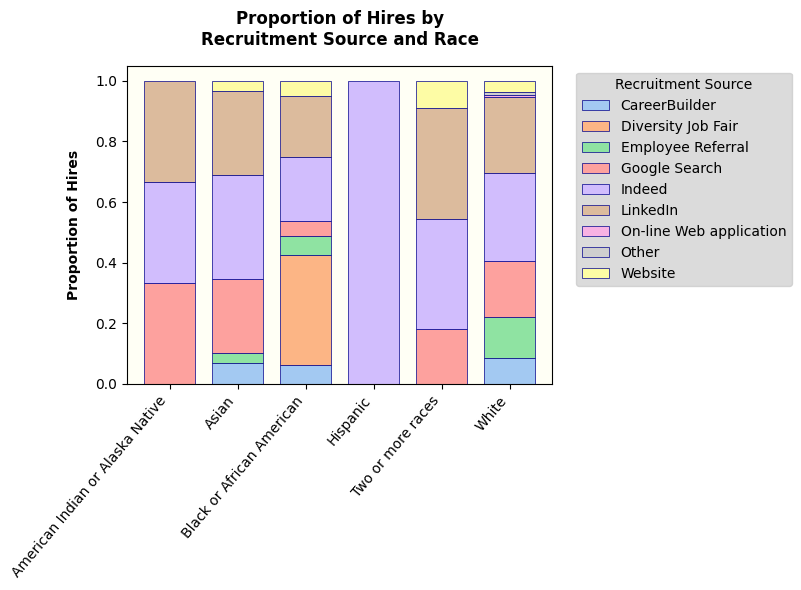

In [109]:
# Calculate the proportion of hires from each recruitment source within each race category.
proportion_pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Generate a pastel color palette based on the number of recruitment sources.
pastel_colors = generate_pastel_palette(len(source_counts))

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8,6))
proportion_pivot_table.plot(kind='bar', color=pastel_colors, edgecolor=bar_edge_color, linewidth=0.5, width=bar_width, stacked=True, ax=ax)
ax.set_facecolor(chart_bg_color)

# Plotting.
plt.title('Proportion of Hires by\nRecruitment Source and Race', fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Proportion of Hires', fontweight='bold', labelpad=10)
plt.xticks(rotation=50, ha='right')
plt.legend(title='Recruitment Source', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()

<u>**Analysis of Recruitment Sources by Race:**</u>

- **American Indian or Alaska Native:** Google Search, Indeed, and LinkedIn each contribute 1 hire.
- **Asian:**  Google Search (7 hires), Indeed (10 hires), and LinkedIn (8 hires) are the top contributors.
- **Black or African American:**  Diversity Job Fair (29 hires) is the most significant source, followed by Indeed (17 hires) and LinkedIn (16 hires).
- **Hispanic:**  Only one hire is reported from Indeed.
- **Two or more races:**  Google Search (2 hires), Indeed (4 hires), and LinkedIn (4 hires) are notable.
- **White:**  Indeed (54 hires) and LinkedIn (47 hires) dominate, followed by Google Search (35 hires).

<u>**Overall Insights:**</u>

- **Diversity Job Fair:** Particularly effective for hiring Black or African American candidates.
- **Employee Referral:** Shows low or no contribution across all racial groups.
- **Google Search, Indeed, and LinkedIn:** These online aplatforms consistently contribute to hiring across different racial groups, suggesting their potential for promoting diversity.
- **Website:** Moderately effective for hiring across different racial groups.

<u>**Recommendations:**</u>

**1.** Leverage Diversity Job Fair -
Given its significant impact on hiring Black or African American candidates, investing resources in attending or participating in diversity job fairs can enhance diversity initiatives.

**2.** Optimise Online Platforms - 
Google Search, Indeed, and LinkedIn appear to be effective for hiring candidates from various racial backgrounds. Continuously optimising job postings and employer branding on these platforms can attract diverse talent.

**3.** Revise Employee Referral Program - 
Since employee referrals show low contribution across all racial groups, revising the referral program or introducing incentives to encourage diverse referrals may be beneficial.

**4.** Monitor and Adjust - Continuously monitor the effectiveness of recruitment sources, adjust strategies accordingly, and explore new sources to ensure ongoing diversity in the organisation.

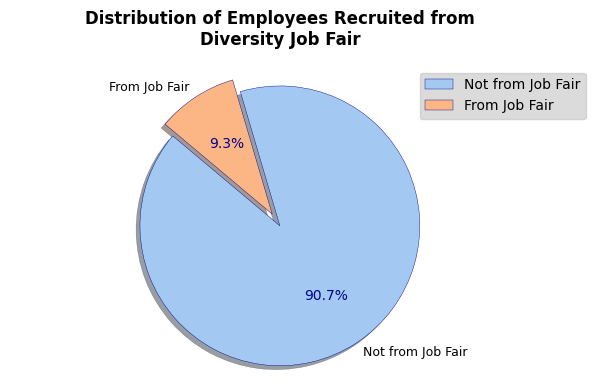

In [110]:
# Generate a pastel color palette based on the number of recruitment sources.
pastel_colors = generate_pastel_palette(df['FromDiversityJobFairID'].nunique())

# Data
labels = ['Not from Job Fair', 'From Job Fair']
sizes = df['FromDiversityJobFairID'].value_counts()

explode = (0.1, 0)  # Explode the first slice.

# Pie Chart.
fig, ax = plt.subplots(figsize=(6,4))
wedges, texts, autotexts = plt.pie(sizes, 
                                   colors=pastel_colors, 
                                   labels=labels, 
                                   autopct='%1.1f%%', 
                                   pctdistance=0.60, 
                                   explode=explode,
                                   labeldistance=1.08, 
                                   startangle=140,
                                   wedgeprops={'linewidth': 0.3, 'edgecolor': pie_wedge_color},
                                   textprops={'color': annotation_color, 'weight': 'normal', 'fontsize': '10'},
                                   shadow=True)

legend =plt.legend(title='', bbox_to_anchor=(1.08, 1), loc='upper right', labels=labels)
legend.get_title().set_fontweight('bold')  # Make legend title bold

# Set font color of text labels.
for text in texts:
    text.set_color('black')
    text.set_fontsize('9')

plt.title('Distribution of Employees Recruited from\nDiversity Job Fair', fontweight='bold', pad=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

***

## Exploring Department and Manager-Level Performance-Analysis
[Back to Top](#Table-of-Contents:)

#### Average Performance Score per Department
(Map ordinal values)

In [111]:
# Copy dataframe for Performance scores manipulation.
performance_df = df.copy()

# Define the mapping dictionary.
score_mapping = {'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}

# Replace categorical values with numerical values
performance_df['PerformanceScore'] = performance_df['PerformanceScore'].replace(score_mapping).astype(int)

performance_df['PerformanceScore'].value_counts()

PerformanceScore
2    243
3     37
1     18
0     13
Name: count, dtype: int64

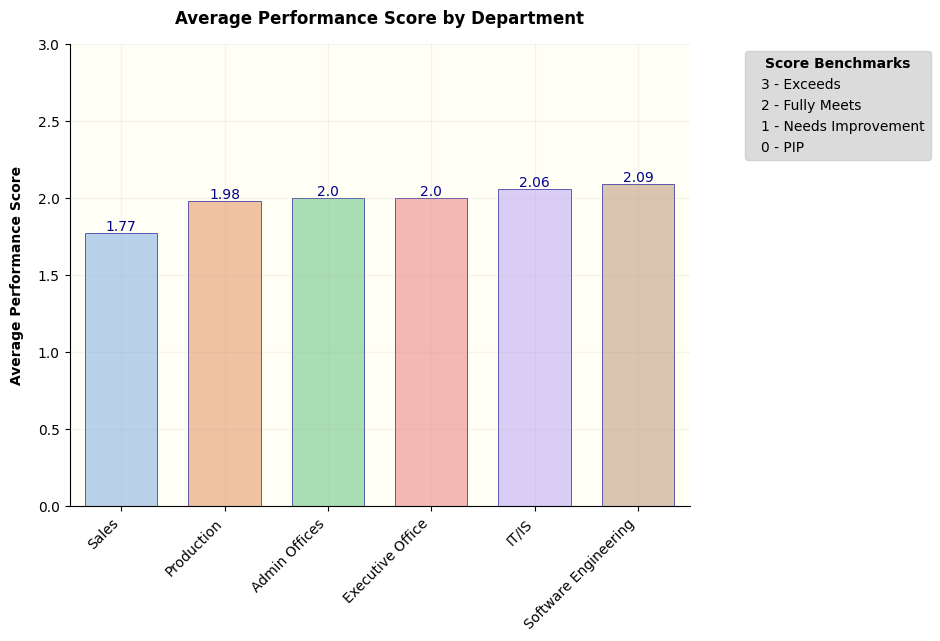

In [112]:
# Average performance score grouped by department.
avg_perf_by_dept = performance_df.groupby('Department')['PerformanceScore'].mean().reset_index()

# Sort by average performance score in ascending order
avg_perf_by_dept = avg_perf_by_dept.sort_values(by='PerformanceScore', ascending=True)

# Generate a pastel color palette based on the number of departments.
num_of_depts = df['Department'].nunique()
pastel_colors = generate_pastel_palette(num_of_depts)

# Define the width of the bars.
bar_width = 0.70

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Department', y='PerformanceScore', data=avg_perf_by_dept, 
            palette=pastel_colors, 
            alpha=0.85, 
            ax=ax, 
            edgecolor=bar_edge_color, 
            linewidth=0.5, 
            width=bar_width)

ax.set_facecolor(chart_bg_color)

# Adjust the limits of the y-axis.
#ax.set_ylim(0,)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Set y-axis limits
ax.set_ylim(0, 3.00)  # Starting from 0.50

# Add annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', color=annotation_color)

# Create a custom legend
legend_mapping = {'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}
legend_labels = [f'{value} - {label}' for label, value in legend_mapping.items()]
legend = ax.legend(labels=legend_labels, title='Score Benchmarks', loc='upper right', bbox_to_anchor=(1.40, 1),handlelength=0)

# Set the legend title font weight to bold
legend.get_title().set_fontweight('bold')

plt.xlabel('')
plt.ylabel('Average Performance Score', fontweight='bold', labelpad=10)
plt.title('Average Performance Score by Department', fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')  # Rotate department names for better readability
#plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.grid(True, alpha=0.15)
plt.show()

* 'Sales' department has the lowest performance score (1.774194), indicating that it might be underperforming compared to other departments.
* 'Production' department also has a relatively low performance score (1.980861), suggesting potential areas for improvement.

#### Average Performance Score per Manager

In [113]:
# Calculate mean performance score per manager
manager_performance = performance_df.groupby('ManagerName')['PerformanceScore'].mean().reset_index()

# Sort the dataframe by performance score in ascending order.
manager_performance_sorted = manager_performance.sort_values(by='PerformanceScore', ascending=True)

# Display lowest five scores.
print("Lowest five performance scores:\n")
print(manager_performance_sorted.head(5).to_string(header=False))

# Display highest five scores.
print("\nHighest five performance scores:\n")
print(manager_performance_sorted.tail(5).to_string(header=False))

Lowest five performance scores:

7   Debra Houlihan  1.666667
12      John Smith  1.714286
16   Lynn Daneault  1.846154
18    Peter Monroe  1.857143
17  Michael Albert  1.863636

Highest five performance scores:

10       Janet King  2.105263
0   Alex Sweetwater  2.111111
19       Simon Roup  2.117647
11  Jennifer Zamora  2.142857
9      Eric Dougall  2.250000


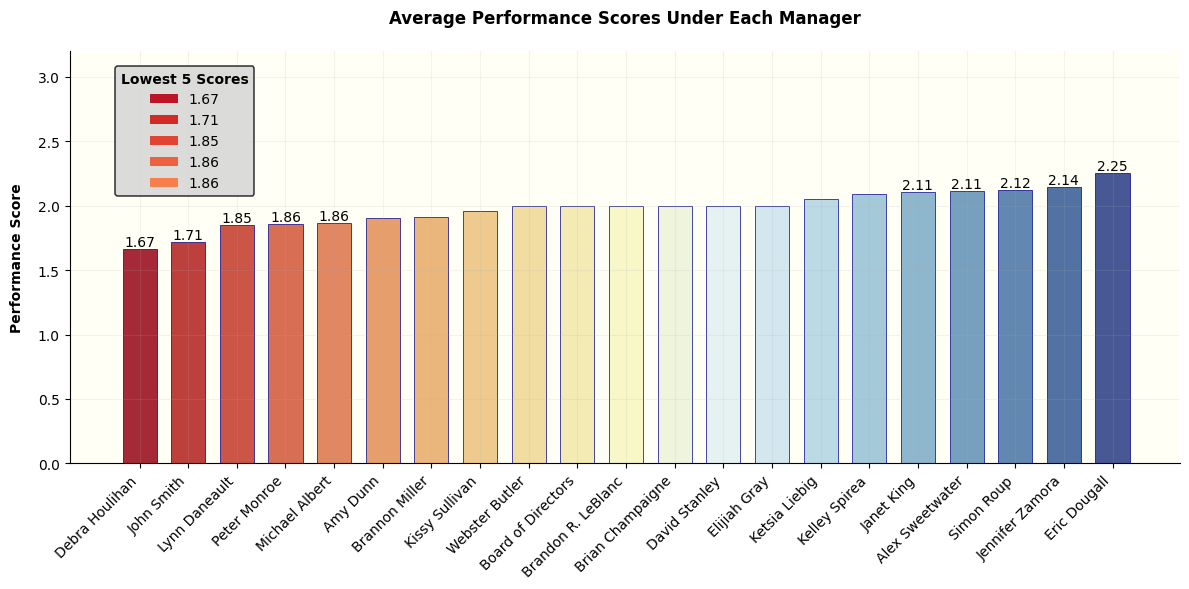

In [114]:
# Calculate mean performance score per manager
manager_performance = performance_df.groupby('ManagerName')['PerformanceScore'].mean().reset_index()

# Sort by performance score in ascending order.
manager_performance_sorted = manager_performance.sort_values(by='PerformanceScore', ascending=True)

# Generate a pastel color palette based on the number of managers.
num_of_managers = df['ManagerName'].nunique()
#pastel_colors = generate_pastel_palette(num_of_managers)
palette = sns.color_palette("RdYlBu", len(manager_performance_sorted)) # Define a color palette

# Define the width of the bars.
bar_width = 0.70

# Calculate the total width of the bars and the gap between them
num_bars = len(ax.patches)
total_width = num_bars * bar_width
total_gap = 1.05
gap_width = (total_gap - total_width) / (num_bars - 1)

# Calculate the x positions of the bars
bar_positions = np.arange(num_bars) * (bar_width + gap_width)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='ManagerName', y='PerformanceScore', data=manager_performance_sorted, 
            palette=palette, 
            edgecolor=bar_edge_color, 
            linewidth=0.5,
            width=bar_width)

# Set chart background colour.
ax.set_facecolor(chart_bg_color)

# Add annotations on top of each bar for lowest 5 and top 5
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if i < 5 or i >= len(ax.patches) - 5:
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), 
                ha='center', va='bottom', color='black', fontsize=10)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Create a custom legend with only the lowest 5 scores
lowest_scores = manager_performance_sorted['PerformanceScore'].head(5)
lowest_colors = sns.color_palette(palette, n_colors=5)

# These "dummy" bars are not part of the main plot but serve the purpose of displaying the legend accurately.
for score, color in zip(lowest_scores, lowest_colors):
    plt.bar(0, 0, color=color, label=f'{score:.2f}')
    
# Set legend to upper left.
legend = plt.legend(title='Lowest 5 Scores', loc='upper left', bbox_to_anchor=(0.035, 0.98))

# Set the legend title font weight to bold
legend.get_title().set_fontweight('bold')

# Customize legend background and border
frame = legend.get_frame()
frame.set_facecolor('lightgrey')  # Set background color
frame.set_linewidth(1.1)  # Set border width
frame.set_edgecolor('black')  # Set border color

plt.title('Average Performance Scores Under Each Manager', fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Performance Score', fontweight='bold', labelpad=10)
plt.ylim(0, 3.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.15)
plt.show()

#### Engagement Survey Distribution for Sales and Production
Engagement Survey:  Results from the last engagement survey, managed by an external partner

In [115]:
engagement_score_sales_mean = df[df['Department'] == 'Sales']['EngagementSurvey'].mean()
print(f'Mean Engagement Score for Sales Department: \t\t{engagement_score_sales_mean:.2f}')

engagement_score_prod_mean = df[df['Department'] == 'Production']['EngagementSurvey'].mean()
print(f'Mean Engagement Score for Production Department: \t{engagement_score_prod_mean:.2f}')

Mean Engagement Score for Sales Department: 		3.82
Mean Engagement Score for Production Department: 	4.13


* The mean engagement score (4.13) indicates that employees in the Production department have a higher level of satisfaction and commitment compared to the Sales department. This suggests that there might be different underlying issues affecting performance in the Production department compared to Sales.

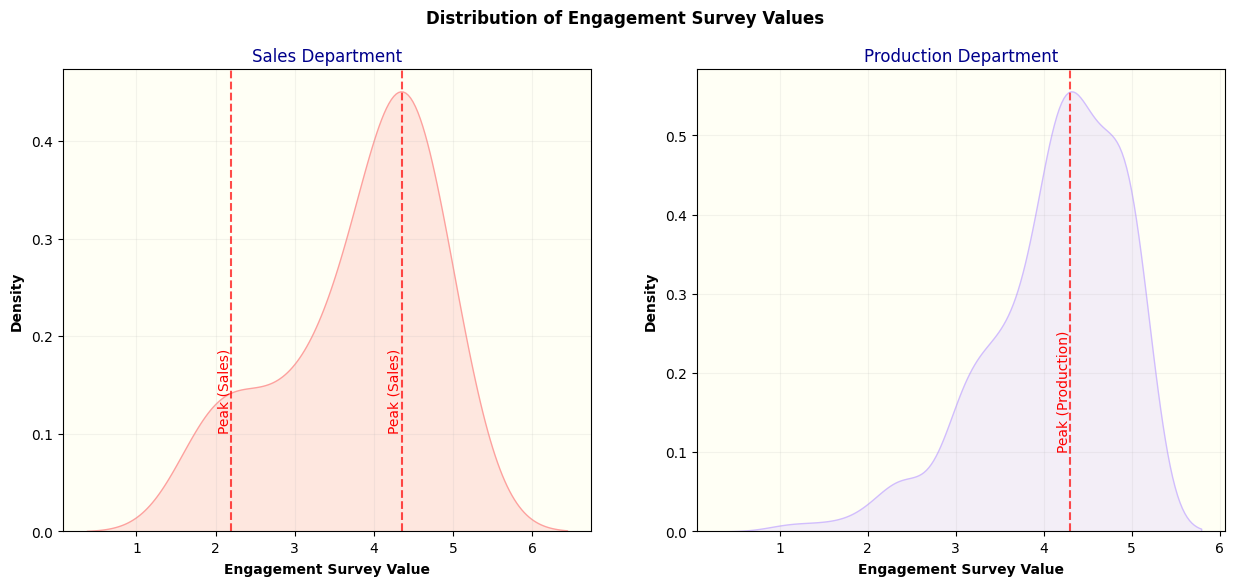

In [116]:
# Dataframe for 'Sales' department.
sales_df = df[df['Department'] == 'Sales']

# DataFrame for 'Production' department.
production_df = df[df['Department'] == 'Production']

# Generate pastel colors.
pastel_colors = generate_pastel_palette(7)

# Create a figure with two subplots and get axes.
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) #sharex=True, sharey=True) # share same x and y axes scale.

# Add super title.
fig.suptitle("Distribution of Engagement Survey Values", fontweight='bold')

# Plot KDE plot for 'EngagementSurvey' values in the 'Sales' department
sns.kdeplot(data=sales_df['EngagementSurvey'], shade=True, ax=axes[0], color=pastel_colors[3])
axes[0].set_xlabel('Engagement Survey Value', fontweight='bold', labelpad=5)
axes[0].set_ylabel('Density', fontweight='bold', labelpad=5)
axes[0].set_title('Sales Department', color='darkblue')
#axes[0].set_ylim(0, 0.6)  # Adjust the y-axis to be same scale as Production
axes[0].grid(True, alpha=0.15)

# Set background color for the subplot
axes[0].set_facecolor(chart_bg_color)

# Plot KDE plot for 'EngagementSurvey' values in the 'Production' department
sns.kdeplot(data=production_df['EngagementSurvey'], shade=True, ax=axes[1], color=pastel_colors[4])
axes[1].set_xlabel('Engagement Survey Value', fontweight='bold', labelpad=5)
axes[1].set_ylabel('Density', fontweight='bold', labelpad=5)
#axes[1].set_ylim(0, 0.6)
axes[1].set_title('Production Department', color='darkblue')
axes[1].grid(True, alpha=0.15)

# Set background color for the subplot
axes[1].set_facecolor(chart_bg_color)

# Add vertical lines and annotations to highlight the bimodal distribution
sales_peaks = [2.2, 4.35]  # Example values for peak locations in the Sales department
production_peaks = [4.3]  # Example values for peak locations in the Production department
for ax, peaks, dept_name in zip(axes, [sales_peaks, production_peaks], ['Sales', 'Production']):
    for peak_value in peaks:
        ax.axvline(peak_value, color='red', linestyle='--', alpha=0.7)
        ax.text(peak_value, 0.1, f'Peak ({dept_name})', rotation=90, verticalalignment='bottom', horizontalalignment='right', color='red')


plt.grid(True, alpha=0.15)
plt.show()

* It appears that the **Sales** department's engagement survey distribution is *developing* a **bimodal shape**, two clusters or subgroups of employees.
* Comparing the engagement survey distribution of the Sales department with <u>historical data</u> would be beneficial in order to gain additional insights.

* Further investigation into the underlying factors driving this bimodal distribution is essential. Possible contributing factors include:
    - **High Engagement Peak:** This cluster may be associated with supportive leadership, clear role expectations, and positive team dynamics.
    - **Low Engagement Peak:** Factors contributing to lower engagement levels might include high levels of stress from workloads, ineffective leadership, and a lack of transparency from management.

#### Performances by Sales Manager and Sales Employees

In [117]:
sales_managers = df[df['Department'] == 'Sales']['ManagerName'].unique()
sales_managers

array(['John Smith', 'Lynn Daneault', 'Debra Houlihan', 'Janet King'],
      dtype=object)

In [118]:
# Create dataframe with only Sales managers.
sales_manager_df = performance_df[performance_df['Department'] == 'Sales']

# Calculate the average metrics including satisfaction, engagement survey, and performance score for each manager
average_emp_satisfaction = sales_manager_df.groupby('ManagerName')[['EmpSatisfaction', 'EngagementSurvey', 'PerformanceScore']].mean().sort_values(by='EmpSatisfaction')
print(average_emp_satisfaction)

                EmpSatisfaction  EngagementSurvey  PerformanceScore
ManagerName                                                        
John Smith             3.928571          3.786429          1.714286
Janet King             4.000000          4.500000          2.000000
Lynn Daneault          4.076923          3.796154          1.846154
Debra Houlihan         4.333333          3.840000          1.666667


* Janet King has the highest performance score (2.00), the highest employee satisfaction rating (4.00), and the highest engagement survey score (4.50)

* Among these managers, Debra Houlihan has the lowest overall performance scores (1.67), the lowest employee satisfaction rating (4.33), and a relatively low engagement survey score (3.84). This indicates potential areas of concern within Debra's team, such as lower job satisfaction or engagement levels impacting performance

In [119]:
# Group by 'ManagerName' and calculate the mean of 'Termd' to get the attrition rate
attrition_rate = sales_df.groupby('ManagerName')['Termd'].mean().reset_index(name='AttritionRate').sort_values(by='AttritionRate', ascending=False)
attrition_rate

,ManagerName,AttritionRate
0,Debra Houlihan,0.333333
2,John Smith,0.214286
3,Lynn Daneault,0.076923
1,Janet King,0.000000


In [120]:
# Count the number of terminated employees for each manager
terminated_count = sales_df[sales_df['Termd'] == 1].groupby('ManagerName')['Termd'].sum().reset_index(name='TermdCount')

# Merge the terminated count with the sales_df DataFrame
sales_df_with_terminated_count = pd.merge(sales_df['ManagerName'].value_counts(), terminated_count, on='ManagerName', how='left')

# Rename the 'count' column to 'total_employees'
sales_df_with_terminated_count = sales_df_with_terminated_count.rename(columns={'count': 'TotalEmployees'})

#print(sales_df_with_terminated_count)
sales_df_with_terminated_count

,ManagerName,TotalEmployees,TermdCount
0,John Smith,14,3.0
1,Lynn Daneault,13,1.0
2,Debra Houlihan,3,1.0
3,Janet King,1,NaN


* With a smaller sample size and inadequate termination count data for Debra Houlihan's team, it's challenging to draw definitive conclusions about her team's performance and management effectiveness solely based on the provided metrics.

In [121]:
# View the statistical summary on Sales Department and Engagement Survey column.
sales_engage_stats = sales_manager_df['EngagementSurvey'].describe()
sales_engage_stats

count    31.000000
mean      3.818710
std       0.952791
min       1.810000
25%       3.270000
50%       4.100000
75%       4.500000
max       5.000000
Name: EngagementSurvey, dtype: float64

In [122]:
# Observe the data for Sales department where Engagement Survey score is within the 25% quartile
Q1_engagement_sales = sales_engage_stats.loc['25%']
sales_q1_engage_df = df[(df['Department'] == 'Sales') & (df['EngagementSurvey'] <= Q1_engagement_sales)]

sales_q1_engage_df[['Employee_Name', 'EmpSatisfaction', 'EngagementSurvey', 'PerformanceScore']]

,Employee_Name,EmpSatisfaction,EngagementSurvey,PerformanceScore
32,"Bunbury, Jessica",5,3.14,Fully Meets
45,"Chigurh, Anton",5,3.00,Fully Meets
67,"Delarge, Alex",3,1.93,PIP
72,"Dietrich, Jenna",1,2.30,PIP
95,"Forrest, Alex",5,2.00,PIP
258,"Smith, John",4,2.40,Needs Improvement
267,"Stansfield, Norman",2,1.81,PIP
288,"Valentin,Jackie",3,2.81,Fully Meets


It's indeed apparent that there are two distinct subgroups within the Sales department based on the engagement survey and performance scores:

**High Engagement Subgroup:**

- Bunbury, Jessica
- Chigurh, Anton
- Smith, John
- Valentin, Jackie

These employees exhibit relatively higher engagement survey scores ranging from 2.40 to 3.14, indicating a higher level of commitment and involvement in their work. Performance scores for this subgroup vary, with three employees meeting expectations (Fully Meets) and one employee needing improvement (Needs Improvement). Overall, this subgroup likely represents a segment of engaged and motivated employees within the Sales department.

**Low Engagement Subgroup:**

- Delarge, Alex
- Dietrich, Jenna
- Forrest, Alex
- Stansfield, Norman

These employees demonstrate lower engagement survey scores ranging from 1.81 to 2.30, suggesting lower levels of engagement with their work. Performance scores for this subgroup also vary, with some employees on a Performance Improvement Plan (PIP) and others needing improvement (Needs Improvement). This subgroup may represent employees facing challenges or dissatisfaction within their roles, potentially requiring additional support or intervention to improve performance and engagement.

**Specific Actionable Insights:**

- **Recognition and Reward:** Acknowledge and celebrate the contributions of highly engaged employees to reinforce their positive behaviours and encourage continued engagement.

- **Individualised Support:** Conduct one-on-one meetings with each employee to understand their specific challenges and concerns. Provide personalised support and resources to address their needs and improve their engagement.

***

## Extending Correlation Analysis: A Deeper Dive
[Back to Top](#Table-of-Contents:)

In [123]:
corr_test = df[['EngagementSurvey','PerfScoreID','EmpID','SpecialProjectsCount', 'ManagerID', 'DaysLateLast30', 'Salary']]
corr_test.corr()

,EngagementSurvey,PerfScoreID,EmpID,SpecialProjectsCount,ManagerID,DaysLateLast30,Salary
EngagementSurvey,1.000000,0.544927,-0.589664,0.013227,-0.003344,-0.585232,0.064966
PerfScoreID,0.544927,1.000000,-0.691348,0.045677,-0.060552,-0.734728,0.130903
EmpID,-0.589664,-0.691348,1.000000,-0.043730,0.090236,0.495513,-0.115319
SpecialProjectsCount,0.013227,0.045677,-0.043730,1.000000,-0.525087,-0.092494,0.508333
ManagerID,-0.003344,-0.060552,0.090236,-0.525087,1.000000,0.059882,-0.435406
DaysLateLast30,-0.585232,-0.734728,0.495513,-0.092494,0.059882,1.000000,-0.069443
Salary,0.064966,0.130903,-0.115319,0.508333,-0.435406,-0.069443,1.000000


### Salary and EngagementSurvey
(Continuous variables)

In [124]:
# Remove outliers from Salary in a new dataframe.
df_salary_outliers_removed = df[~potential_outliers_salary].copy() # Outliers removal IQR method.

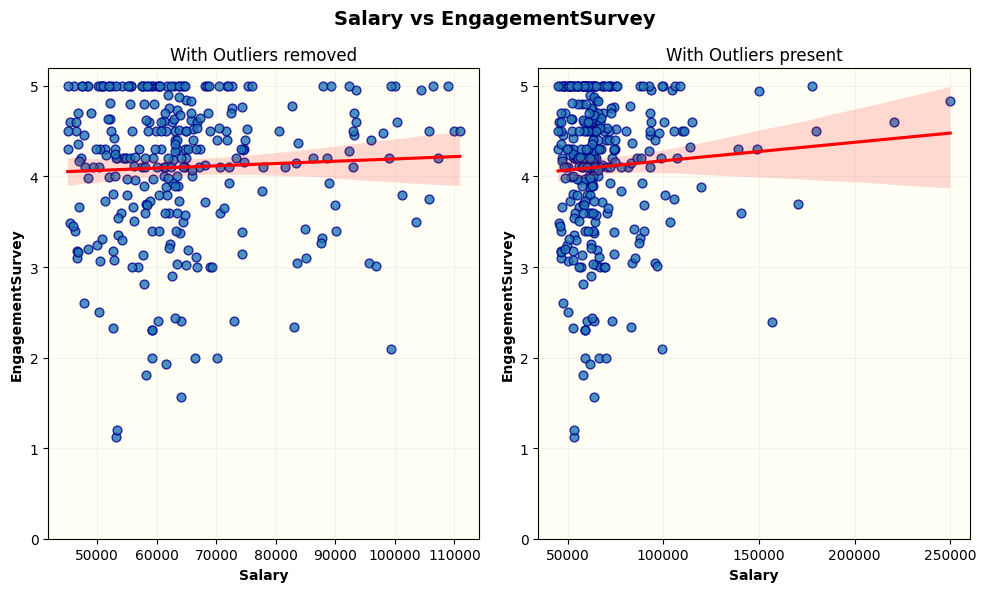

In [125]:
# Create a figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(10, 6)) # 1 row 2 cols

# Generate a pastel color palette with 6 colors to choose 2 from.
pastel_colors = generate_pastel_palette(6)

# Marker data point size
marker_size = 40

# Add super title.
fig.suptitle("Salary vs EngagementSurvey", fontsize=14, fontweight='bold')

# Plot the regression plot for "DaysLateLast30" vs "EngagementSurvey" on the first subplot.
sns.regplot(x="Salary", y="EngagementSurvey", data=df_salary_outliers_removed, 
            ax=axes[0], 
            scatter_kws={'s': marker_size, 'edgecolor': scatter_edge_color},
            line_kws={'color': 'red'})

axes[0].set_title('With Outliers removed')
axes[0].set_ylim(0,)
axes[0].set_facecolor(chart_bg_color)
axes[0].set_xlabel('Salary', fontweight='bold')
axes[0].set_ylabel('EngagementSurvey', fontweight='bold')
axes[0].grid(True, alpha=0.15)

# Plot the regression plot for "Salary" vs "EngagementSurvey" on the second subplot.
sns.regplot(x="Salary", y="EngagementSurvey", data=df, 
            ax=axes[1], 
            scatter_kws={'s': marker_size, 'edgecolor': scatter_edge_color},
            line_kws={'color': 'red'})

axes[1].set_title('With Outliers present')
axes[1].set_ylim(0,)
axes[1].set_facecolor(chart_bg_color)
axes[1].set_xlabel('Salary', fontweight='bold')
axes[1].set_ylabel('EngagementSurvey', fontweight='bold')
axes[1].grid(True, alpha=0.5)

# Adjust layout.
plt.tight_layout()

# Show the plot.
plt.grid(True, alpha=0.15)
plt.show()

In [126]:
pearson_coef, p_value = stats.pearsonr(df['Salary'], df['EngagementSurvey'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.06496607104732481  with a P-value of P = 0.25333647584714747


* The charts suggest that there is little to no linear relationship between 'Salary' and 'EngagementSurvey'.
* The relationship between Salary and EngagementSurvey is robust and not heavily influenced by extreme data points.


* This implies that an increase or decrease in salary doesn't seem to have a significant impact on employees' engagement survey scores.
* Based on the **Pearson** correlation coefficient and its associated p-value, there is little evidence to suggest a meaningful linear relationship between Salary and EngagementSurvey scores in the dataset.

### DaysLateLast30 and EngagementSurvey
I will utilise a Bar plot to analyse the discrete variable for DaysLateLast30 and the continuous variable for EngagementSurvey. The Swarm plot was deemed unsuitable for this analysis due to its inability to capture all data points.

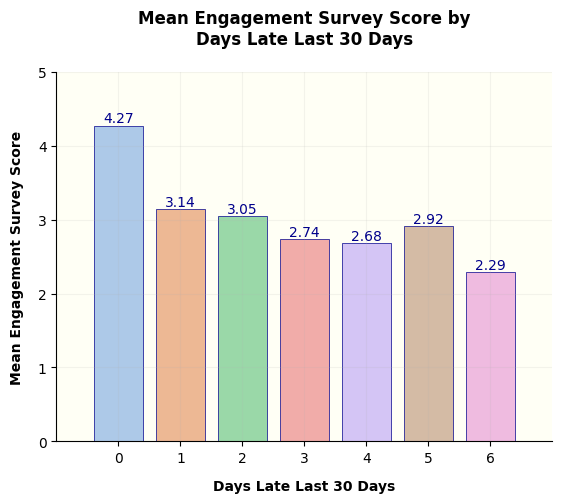

In [127]:
# Calculate the mean EngagementSurvey scores for each category of DaysLateLast30
mean_engagement_by_dayslate = df.groupby('DaysLateLast30')['EngagementSurvey'].mean().reset_index()

# Unique count of DaysLateLast30.
dayslate_nunique = df['DaysLateLast30'].nunique()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(dayslate_nunique)

# Plot a bar plot with mean EngagementSurvey scores for each category.
ax = sns.barplot(x='DaysLateLast30', y='EngagementSurvey', data=mean_engagement_by_dayslate, 
                 palette=pastel_colors, 
                 edgecolor=bar_edge_color, 
                 linewidth=0.5)

# Set background color of chart.
ax.set_facecolor(chart_bg_color)

ax.set_xlim(-1.0, 7)
ax.set_ylim(0, df['EngagementSurvey'].max())

# Annotate each bar with the mean value.
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.2f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', color=annotation_color)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
    
plt.xlabel('Days Late Last 30 Days', fontweight='bold', labelpad=10)
plt.ylabel('Mean Engagement Survey Score', fontweight='bold', labelpad=10)
plt.title('Mean Engagement Survey Score by\nDays Late Last 30 Days', fontweight='bold', pad=20)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.15)
plt.show()

* The chart suggest a potential correlation between these two variables, where increased absenteeism may negatively impact employee engagement survey scores.

* **Actionable insights** for the organisation from this correlation analysis could be:
  - Offering flexible work arrangements, such as work from home or flexible start times.
  - Providing support and resources to help employees address underlying issues that contribute to absenteeism, such as transportation challenges or personal obligations, can help improve attendance and engagement. This may include offering transportation assistance, childcare support, or access to employee assistance programs.

In [128]:
pearson_coef, p_value = stats.pearsonr(df['DaysLateLast30'], df['EngagementSurvey'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.5852315472719375  with a P-value of P = 5.6486822314443855e-30


The Pearson correlation coefficient being -0.585 indicates a *moderate to strong* negative correlation between the variables "DaysLateLast30" and "EngagementSurvey".

The p-value being significantly lower than the conventional significance level (e.g., 0.05) suggests that this correlation is statistically significant. This indicates that it is highly unlikely to observe such a strong negative correlation between these variables in the sample data if there were truly no correlation in the population

### Salary and PerformanceScore analysis
(Continuous and Ordinal variables)

In [129]:
df['PerformanceScore'].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

In [130]:
# Group by PerformanceScore and calculate mean salary.
mean_salary_by_perf = df_salary_outliers_removed.groupby('PerformanceScore')['Salary'].mean()
mean_salary_by_perf

PerformanceScore
Exceeds              65046.121212
Fully Meets          65506.829787
Needs Improvement    63196.235294
PIP                  58971.076923
Name: Salary, dtype: float64

#### Swarm plots
*  A swarm plot is a categorical scatter plot that displays individual data points along the categorical axis without overlapping them

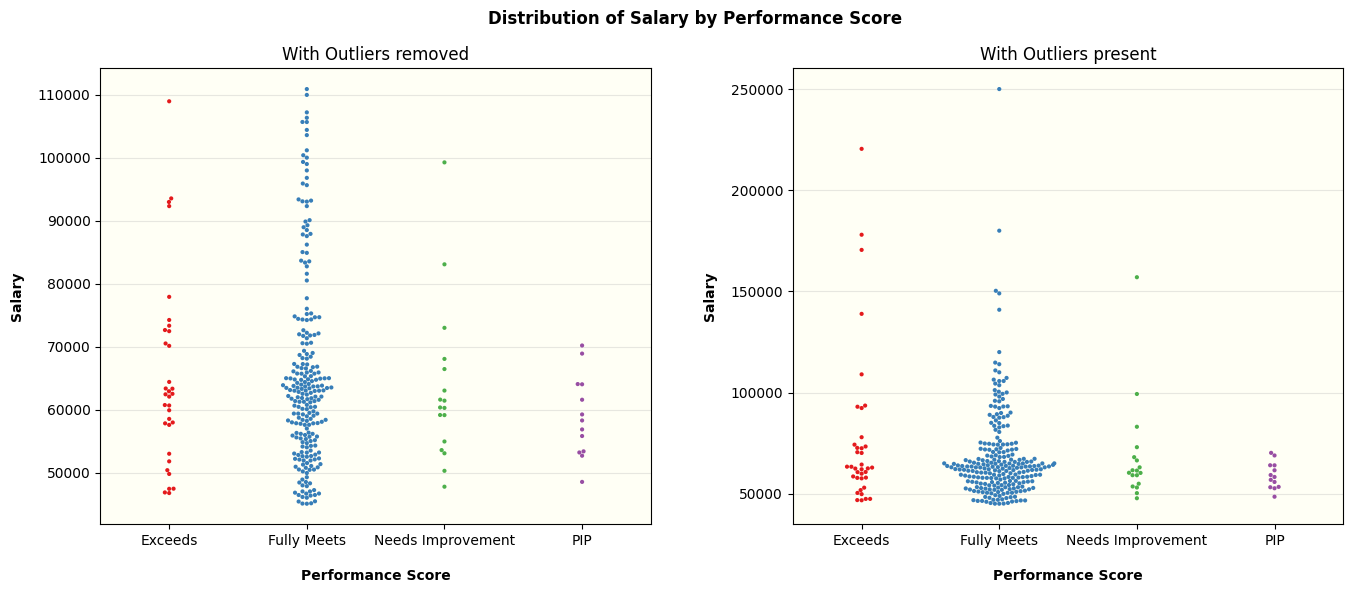

In [131]:
# Marker data point size.
marker_size = 20

# Create a figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Add super title.
fig.suptitle("Distribution of Salary by Performance Score", fontweight='bold')

# Iterate over each subplot
for i, ax in enumerate(axes):    
    
    ax.set_facecolor(chart_bg_color)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Performance Score', fontweight='bold', labelpad=15)
    ax.set_ylabel('Salary', fontweight='bold', labelpad=10)
    
    # Set title based on subplot index
    title = 'With Outliers removed' if i == 0 else 'With Outliers present'
    ax.set_title(title)
    
    # Choose dataset based on subplot index.
    data = df if i == 1 else df_salary_outliers_removed    
    
    # Plotting the swarm plot
    swarm = sns.swarmplot(x='PerformanceScore', y='Salary', data=data,
                          palette='Set1',
                          s=3,
                          ax=ax)    

# Adjust spacing between subplots
fig.subplots_adjust(wspace=10, hspace=10)

plt.tight_layout()
plt.xlabel('Performance Score')
plt.show()


* The <u>majority</u> of employees seem to have a performance score of **"Fully Meets"**.

* There seems to be a mix of performance scores across different salary ranges. While some employees with high performance scores ("Exceeds") have high salaries, there are also employees with similar performance scores who have lower salaries.

* Similarly, there are employees with lower performance scores ("Needs Improvement") who have relatively high salaries. This suggests that there may be other factors influencing salary levels besides performance (This is explored in segmentation of employees' managers and based on departments or job position analysis).

In [132]:
df.groupby('PerformanceScore')['Salary'].mean()

PerformanceScore
Exceeds              77144.864865
Fully Meets          68366.720165
Needs Improvement    68407.555556
PIP                  58971.076923
Name: Salary, dtype: float64

#### Encoding ordinal categorical variable 'PerformanceScore'

In [133]:
# Map Performance scores categories to 0 to 3 
perf_df = df.copy()

# Define the mapping dictionary
score_mapping = {'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}

# Replace categorical values with numerical values
perf_df['PerformanceScore'] = perf_df['PerformanceScore'].replace(score_mapping).astype(int)

perf_df['PerformanceScore'].value_counts()

PerformanceScore
2    243
3     37
1     18
0     13
Name: count, dtype: int64

In [134]:
pearson_coef, p_value = stats.pearsonr(perf_df['Salary'], perf_df['PerformanceScore'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.12513801165277127  with a P-value of P = 0.027340106160422487


### Salary and Employee Satisfaction analysis
(Continuous and discrete variables)

[Back to Top](#Table-of-Contents:)

In [135]:
salary_mean = df['Salary'].mean()
print(f'Mean salary is ${salary_mean.round(2)}')

Mean salary is $69020.68


In [136]:
# Calculate the mean employee satisfaction level for those above and below the average salary.
salary_mean = df['Salary'].mean()
emp_satisfaction_above_mean = df[df['Salary'] >= salary_mean]['EmpSatisfaction'].mean().round(2)
emp_satisfaction_below_mean = df[df['Salary'] < salary_mean]['EmpSatisfaction'].mean().round(2)

print('Mean Employee Satisfaction Level:\n' + '*'*33)
print(f'Above the Salary Average: \t{emp_satisfaction_above_mean}')
print(f'Below the Salary Average: \t{emp_satisfaction_below_mean}\n')

# Calculate lower quartile 25% and upper quartile 75% for Salary.
salary_description = df['Salary'].describe()
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)

# Select salaries within Q1 in the dataframe.
below_Q1_df = df[df['Salary'] <= Q1_salary]
emp_satisfaction_within_Q1_mean = below_Q1_df['EmpSatisfaction'].mean().round(2)

# Filter the dataframe for salaries within Q3.
below_Q3_df = df[df['Salary'] <= Q3_salary]
emp_satisfaction_within_Q3_mean = below_Q3_df['EmpSatisfaction'].mean().round(2)

print(f'Within the 25th percentile: \t{emp_satisfaction_within_Q1_mean}')
print(f'Within the 75th percentile: \t{emp_satisfaction_within_Q3_mean}')

Mean Employee Satisfaction Level:
*********************************
Above the Salary Average: 	3.98
Below the Salary Average: 	3.86

Within the 25th percentile: 	3.85
Within the 75th percentile: 	3.88


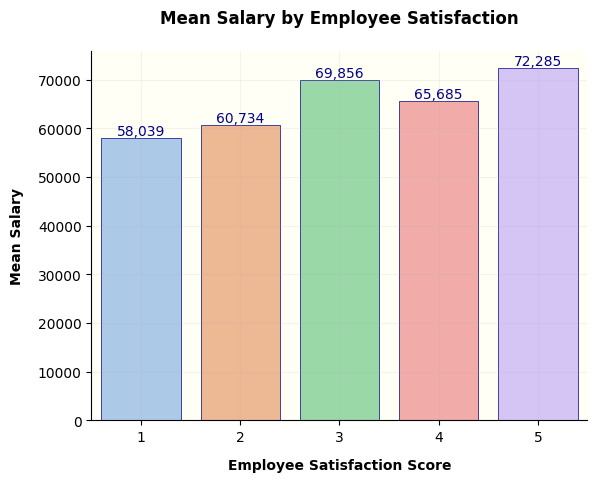

In [137]:
# Calculate the mean EngagementSurvey scores for each category of DaysLateLast30
salary_by_empsatisfaction = df.groupby('EmpSatisfaction')['Salary'].mean().reset_index()

# Unique count of DaysLateLast30.
emp_sat_nunique = df['EmpSatisfaction'].nunique()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(emp_sat_nunique)

# Plot a bar plot with mean EngagementSurvey scores for each category.
ax = sns.barplot(x='EmpSatisfaction', y='Salary', data=salary_by_empsatisfaction, 
                 palette=pastel_colors,
                 edgecolor=bar_edge_color, 
                 linewidth=0.5)

# Set background color of chart.
ax.set_facecolor(chart_bg_color)

# Annotate each bar with the mean value.
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
               (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', color=annotation_color)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
    
plt.xlabel('Employee Satisfaction Score', fontweight='bold', labelpad=10)
plt.ylabel('Mean Salary', fontweight='bold', labelpad=10)
plt.title('Mean Salary by Employee Satisfaction', fontweight='bold', pad=20)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.15)
plt.show()

There seems to be a general trend of increasing salaries with higher satisfaction scores.

In [138]:
# Define the interquartile range (IQR).
IQR = Q3_salary - Q1_salary

# Define the upper bound threshold
threshold = 1.5  # You can adjust this multiplier as needed

# Calculate the upper bound
upper_bound = Q3_salary + (threshold * IQR)

# Filter the dataframe for salaries within the upper whisker.
filtered_df = df[(df['Salary'] >= Q3_salary) & (df['Salary'] <= upper_bound)]

# Calculate the mean Employee Satisfaction Level within the filtered subset
emp_satisfaction_within_whisker_mean = filtered_df['EmpSatisfaction'].mean()
print(f'Mean Employee Satisfaction Level within the upper whisker: {emp_satisfaction_within_whisker_mean}')

Mean Employee Satisfaction Level within the upper whisker: 3.795918367346939


In [139]:
# Define the bins for salary.
bins = np.arange(40000, df['Salary'].max() + 10000, 10000)

grouped_by_salary_bins = pd.cut(df['Salary'], bins)

# Create salary bins and calculate mean satisfaction rate for each bin.
satisfaction_by_salary_bins = df.groupby(grouped_by_salary_bins, observed=True)['EmpSatisfaction'].mean().reset_index(name='Satisfaction_Mean') # observed=True Suppress Warning on NaN values.
print(satisfaction_by_salary_bins)

              Salary  Satisfaction_Mean
0     (40000, 50000]           4.032258
1     (50000, 60000]           3.755556
2     (60000, 70000]           3.900990
3     (70000, 80000]           3.967742
4     (80000, 90000]           3.529412
5    (90000, 100000]           4.187500
6   (100000, 110000]           4.181818
7   (110000, 120000]           3.750000
8   (130000, 140000]           5.000000
9   (140000, 150000]           4.500000
10  (150000, 160000]           3.000000
11  (170000, 180000]           4.666667
12  (220000, 230000]           5.000000
13  (240000, 250000]           3.000000


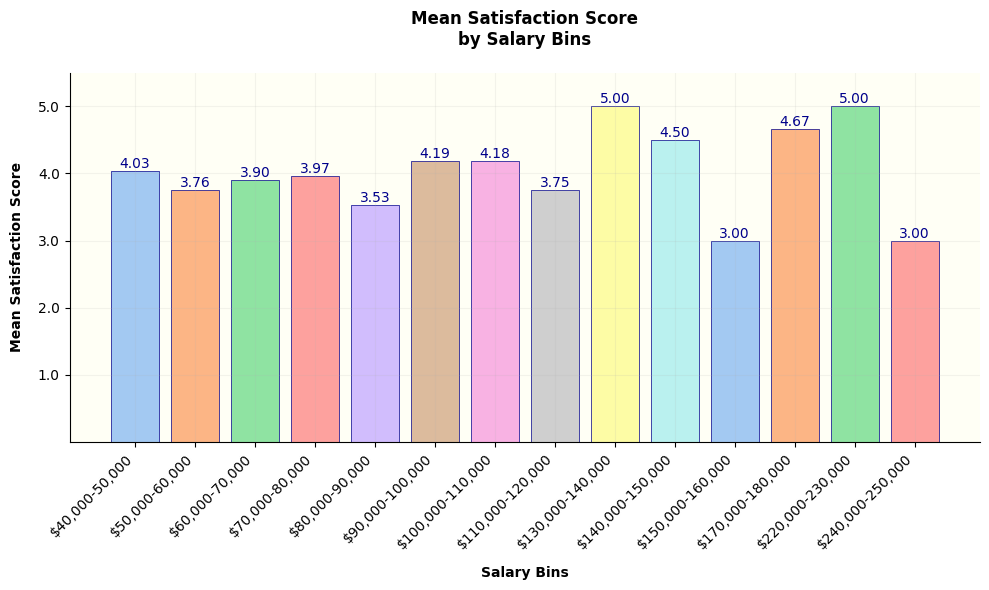

In [140]:
salary_bin_count = len(satisfaction_by_salary_bins)

# Maximum mean satisfaction value for salary bins.
max_satisfaction_rate = satisfaction_by_salary_bins['Satisfaction_Mean'].max()

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(salary_bin_count)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(salary_bin_count), satisfaction_by_salary_bins['Satisfaction_Mean'], 
        align='center', 
        color=pastel_colors,
        edgecolor=bar_edge_color, 
        linewidth=0.5)

# Set yticks and manually format ytick labels
ax.set_yticks(range(1, int(max_satisfaction_rate) + 1))  # Set yticks to integers from 1 to the maximum satisfaction rate
ax.set_yticklabels(['{:.1f}'.format(y) for y in range(1, int(max_satisfaction_rate) + 1)])  # Format tick labels with one decimal place

# Get the current tick positions and labels
ticks = ax.get_xticklabels()

# Adjust the position of the tick labels slightly to the left.
for tick in ticks:
    tick.set_horizontalalignment('right')
    tick.set_x(-0.5)

# Annotate each bar with the mean value.
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.2f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', color=annotation_color)

# Set background color of chart.
ax.set_facecolor(chart_bg_color)

# Hide spines.
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.xlabel('Salary Bins', fontweight='bold', labelpad=10)
plt.ylabel('Mean Satisfaction Score', fontweight='bold', labelpad=10)
plt.title('Mean Satisfaction Score\nby Salary Bins', fontweight='bold', pad=20)

# Format the x-axis ticks to have 1000 comma separators and zero decimal points.
plt.xticks(range(len(satisfaction_by_salary_bins)), ['${:,.0f}-{:,.0f}'.format(int(b.left), int(b.right)) for b in satisfaction_by_salary_bins['Salary']], rotation=45)

# Adjust y-axis limit to extend past maximum rate.
ax.set_ylim(0, max_satisfaction_rate + 0.5)

plt.tight_layout()
plt.grid(True, alpha=0.15)
plt.show()

**Positive Salary-Satisfaction Correlation:**<br>
Generally, as salary increases, satisfaction tends to rise. Higher salary brackets often correspond to higher satisfaction levels, reflecting better job security and benefits.

**Exceptional Satisfaction in High Salary Ranges:**<br> 
Some salary brackets, like 130,000-140,000 and 220,000-230,000, show exceptionally high satisfaction rates (5.0), indicating highly satisfied employees.


**Challenges in Mid-range Salary Brackets:**<br> 
Mid-range brackets, such as 80,000-90,000 and 110,000-120,000, exhibit slightly lower satisfaction rates, suggesting potential challenges or issues affecting satisfaction in these ranges.

**Anomalies in Satisfaction:**<br>
Certain salary ranges, like 150,000-160,000 and 240,000-250,000, show lower satisfaction despite higher salaries, warranting further investigation into unique challenges faced by employees in these brackets.

In [141]:
# Employees where the salary is within the specified range.
positions_in_salary_range = df[(df['Salary'] >= 150000) & (df['Salary'] < 160000)][['Position', 'Department', 'ManagerName', \
                                                                                    'EmpSatisfaction', 'PerformanceScore', 'Salary']]
positions_in_salary_range

,Position,Department,ManagerName,EmpSatisfaction,PerformanceScore,Salary
190,IT Manager - Infra,IT/IS,Jennifer Zamora,3,Needs Improvement,157000
240,Data Architect,IT/IS,Brian Champaigne,3,Fully Meets,150290


In [142]:
# Employees where the salary is within the high specified range.
positions_in_salary_range = df[df['Salary'] >= 240000][['Position', 'EmpSatisfaction', 'Salary']]
positions_in_salary_range

,Position,EmpSatisfaction,Salary
150,President & CEO,3,250000


In [143]:
# Employees where the salary is within the medium specified range and satisfaction level of 3.
positions_in_salary_range = df[(df['Salary'] >= 80000) & (df['Salary'] < 90000) & (df['EmpSatisfaction'] == 3)][['Position', 'Department', \
                                                                                                                 'ManagerName', 'EmpSatisfaction', 'PerformanceScore', 
                                                                                                                 'Absences', 'Sex', 'Salary']]

# Display the positions
positions_in_salary_range

,Position,Department,ManagerName,EmpSatisfaction,PerformanceScore,Absences,Sex,Salary
57,Data Analyst,IT/IS,Simon Roup,3,Fully Meets,2,M,83552
187,Production Manager,Production,Janet King,3,Fully Meets,2,M,83667
197,Senior BI Developer,IT/IS,Brian Champaigne,3,Fully Meets,17,M,87921
245,Software Engineer,Software Engineering,Alex Sweetwater,3,Fully Meets,2,F,86214
249,Data Analyst,IT/IS,Simon Roup,3,Fully Meets,2,M,88527
254,Data Analyst,IT/IS,Simon Roup,3,Fully Meets,16,M,87826
290,Production Manager,Production,Janet King,3,Fully Meets,19,M,88976
296,Production Manager,Production,Janet King,3,Fully Meets,5,F,80512
309,Data Analyst,IT/IS,Simon Roup,3,Fully Meets,11,F,89292


* The pattern observed among employees reporting a satisfaction rating of 3 in the 80,000-90,000 salary range appears to be primarily related to their job roles within the IT department.

#### Investigating Departure Among Highly Satisfied Employees

In [144]:
# Select workers still employed and with employee satisfaction score of 5. 
employed_df = df[(df['TermReason'] != 'N/A-StillEmployed') & (df['EmpSatisfaction'] == 5)]

# Calculate percentages for each 'EmpSatisfaction' group within each Termination Reason category.
percentage_df = employed_df.groupby(['TermReason', 'EmpSatisfaction']).size().reset_index(name='count')
percentage_df['percentage'] = percentage_df.groupby('EmpSatisfaction')['count'].transform(lambda x: x / x.sum() * 100)

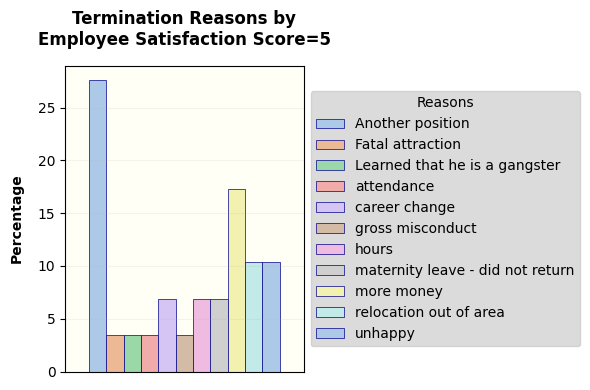

In [145]:
# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(len(percentage_df['TermReason']))

# Create a grouped bar plot for Termination Reasons with 'EmpSatisfaction' as hue.
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='EmpSatisfaction', y='percentage', hue='TermReason', data=percentage_df, 
            # orient='h', 
            palette=pastel_colors,
            edgecolor=bar_edge_color, 
            linewidth=0.5)

# Set background color of chart.
ax.set_facecolor(chart_bg_color)

# Set the title and labels
plt.title('Termination Reasons by\nEmployee Satisfaction Score=5', fontweight='bold', pad=15)
#plt.xlabel('EmpSatisfaction')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('') # Remove x-axis ticks and labels
plt.ylabel('Percentage', fontweight='bold', labelpad=10)

# Show the plot
plt.legend(title='Reasons', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True, alpha=0.15)
plt.show()

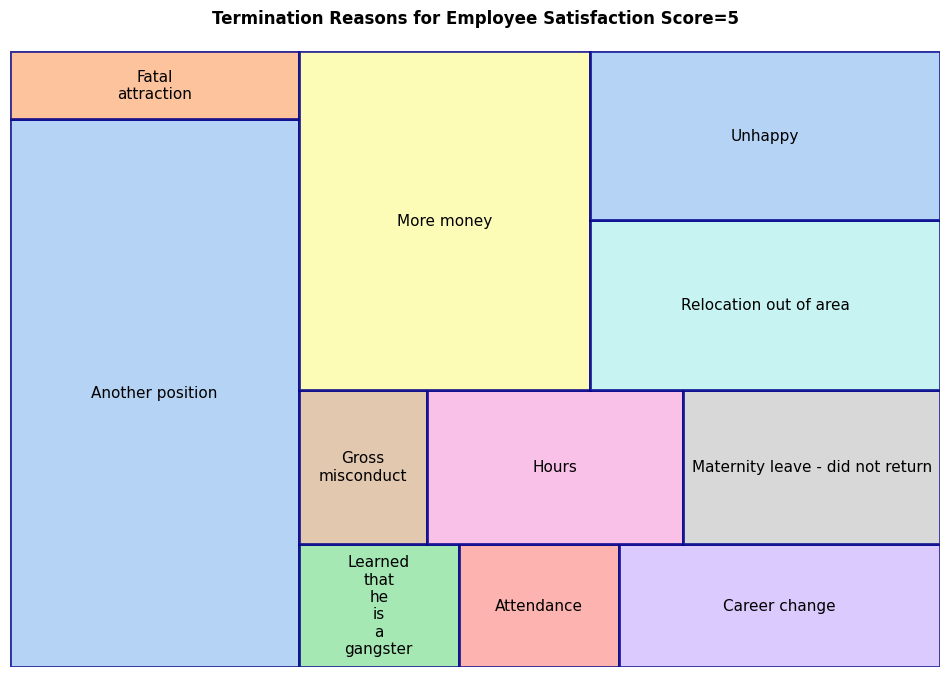

In [146]:
# Capitalise the first letter of each label.
percentage_df['TermReason'] = percentage_df['TermReason'].apply(lambda x: x.capitalize())

# Generate a pastel color palette based on the number of termination reasons.
pastel_colors = generate_pastel_palette(len(percentage_df['TermReason']))

# Function to wrap labels if percentage is less than 4.
def wrap_label(label, percentage, max_percentage=4):
    if percentage < max_percentage:
        words = label.split()  # Split label into words
        wrapped_label = '\n'.join(words)  # Join words with newline characters
        return wrapped_label
    else:
        return label

# Apply the function to the labels
labels = [wrap_label(label, percentage) for label, percentage in zip(percentage_df['TermReason'], percentage_df['percentage'])]

# Plotting the treemap
plt.figure(figsize=(12, 8))
ax = squarify.plot(sizes=percentage_df['percentage'], label=labels, 
              alpha=0.8,
              text_kwargs={'wrap': True, 'fontsize': 11},
              color=pastel_colors,
              edgecolor='darkblue',  # Specify the edge color
              linewidth=2) # Specify the width of the border)
        
plt.axis('off')  # Turn off axis
plt.title('Termination Reasons for Employee Satisfaction Score=5', fontweight='bold', pad=20)
plt.show()

* The most significant percentage of employees with high satisfaction scores is attributed to employees leaving for another position.

* More Money - While job satisfaction may be high, employees may be attracted to external opportunities that offer better financial incentives. 

* The data underscores the importance of understanding the diverse reasons for employee turnover and implementing strategies to **retain talent**, foster career growth, and create a supportive work environment.

### Salary Distribution across Departments 
(Continuous and categorical variables)

[Back to Top](#Table-of-Contents:)

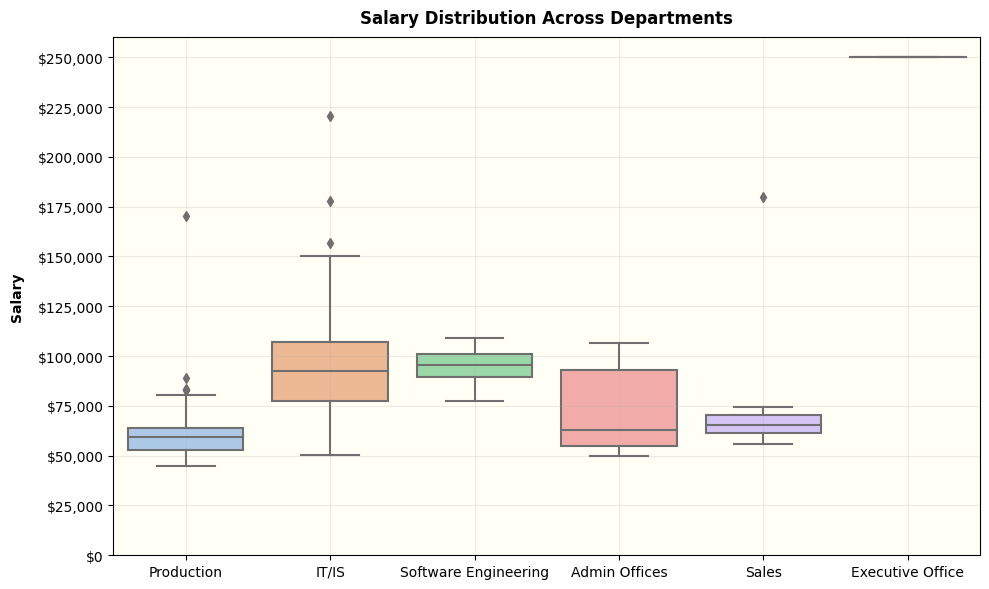

In [147]:
# Generate a pastel color palette with 6 colors to choose 2 from.
pastel_colors = generate_pastel_palette(6)

# Set the background color of the chart
plt.figure(figsize=(10,6))

# Create the box plot for combined salaries
ax = sns.boxplot(x='Department', y='Salary', data=df, 
            palette=pastel_colors)

ax.set_facecolor(chart_bg_color)

# Format the tick values y as a string with dollar sign, comma separator, and zero decimal places.
yticks = np.arange(0, max_ytick + 1, 25000)
ytick_labels = ['${:,.0f}'.format(y) for y in yticks]

# Set yticks and yticklabels
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

# Set the title and labels
plt.title('Salary Distribution Across Departments', fontweight='bold', pad=10)
plt.ylabel('Salary', fontweight='bold', labelpad=10)
plt.xlabel('')
plt.tight_layout()
plt.grid(True,alpha=0.25)

# Show the plot
plt.show()

In [148]:
department_summary = df.groupby('Department')['Salary'].describe()
department_summary

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Admin Offices,9.0,71791.888889,21706.397164,49920.0,55000.00,63003.0,93046.0,106367.0
Executive Office,1.0,250000.000000,NaN,250000.0,250000.00,250000.0,250000.0,250000.0
IT/IS,50.0,97064.640000,33209.612190,50178.0,77417.75,92328.5,106844.5,220450.0
Production,209.0,59953.545455,11422.656822,45046.0,53018.00,59472.0,64066.0,170500.0
Sales,31.0,69061.258065,21271.393236,55875.0,61561.50,65310.0,70506.5,180000.0
Software Engineering,11.0,94989.454545,9566.505698,77692.0,89601.50,95660.0,100807.5,108987.0


**Range of Salaries**

* The widest range of salaries is observed in the IT/IS department, with salaries ranging from $50,178 to 220,450
* The Admin Offices department also has a relatively wide salary range, spanning from 49,920 to 106,367.

**Median Salary:**

* The Executive Office has the highest median salary at $250,000, reflecting the executive-level or CEO position.
* The Software Engineering department also has a relatively high median salary of 95,660, indicating competitive compensation for technical roles.

**Other notes:**
* Software Engineering department exhibits minimal outliers, indicating a relatively uniform distribution of salaries among employees
* This department's salary distribution has a relatively high standard deviation of around $33,210, indicating variability in salaries within the department

**Actionable Insights:**
* Evaluate the performance and contributions of Sales Department employees to ensure that compensation levels align with their achievements and results. Implement performance-based incentives or commission structures to motivate sales teams and reward high performers, thereby enhancing overall sales productivity.
* Analyse industry benchmarks and market trends to compare salary distributions across departments with industry standards. This can provide insights into whether the organisation's compensation practices are competitive and aligned with market norms.

### Absences by Special Projects Count 
(Continuous and discrete variables)

In [149]:
pearson_coef, p_value = stats.pearsonr(perf_df['Absences'], perf_df['SpecialProjectsCount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.020452484246077974  with a P-value of P = 0.7193940929309435


* While the Pearson coefficient suggests a weak negative correlation between the two variables and the high p-value indicates a lack of statistical significance for a linear relationship, it's important to recognise that correlation does not imply causation. There may be additional variables at play that influence the observed relationship between the variables of interest. Factors such as stress levels, job satisfaction, and other unmeasured variables.

In [150]:
absent_by_project_count = df.groupby('SpecialProjectsCount')['Absences'].mean().reset_index()
absent_by_project_count

,SpecialProjectsCount,Absences
0,0,10.331950
1,1,20.000000
2,2,3.000000
3,3,6.333333
4,4,11.333333
5,5,8.952381
6,6,9.428571
7,7,11.500000
8,8,13.000000


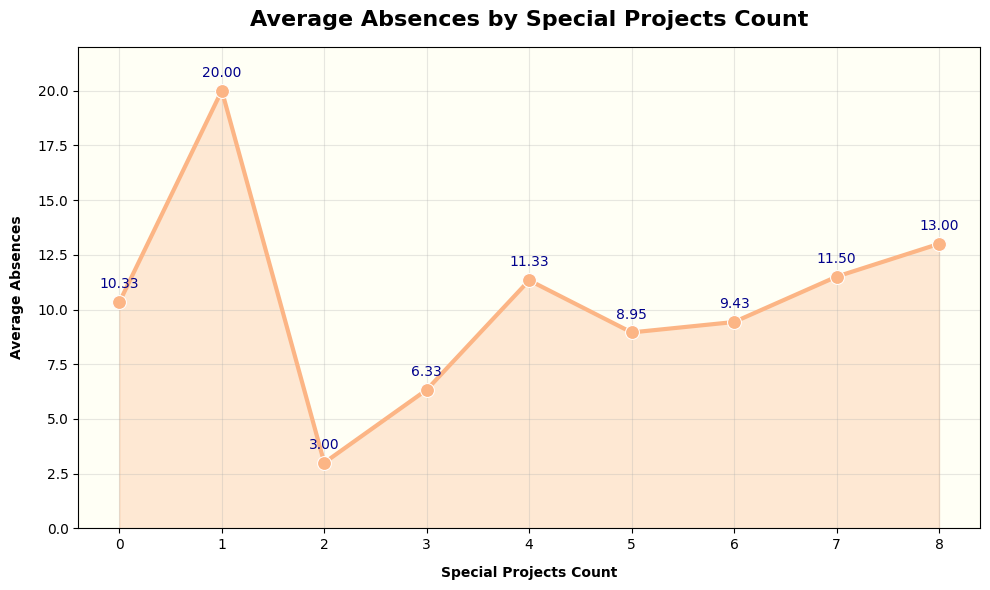

In [151]:
# Generate a pastel color palette.
pastel_colors = generate_pastel_palette(2)

# Create line area chart
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='SpecialProjectsCount', y='Absences', data=absent_by_project_count, 
             marker='o',
             markersize=10,
             color=pastel_colors[1], 
             linewidth=3)

ax.set_facecolor(chart_bg_color)
plt.fill_between(absent_by_project_count['SpecialProjectsCount'], absent_by_project_count['Absences'], color=pastel_colors[1], alpha=0.3)

# Add annotations on markers.
for index, row in absent_by_project_count.iterrows():
    ax.annotate(f"{row['Absences']:.2f}", (row['SpecialProjectsCount'], row['Absences']), 
                textcoords="offset points", xytext=(0,10), ha='center', color=annotation_color)
        
# Add labels and title
plt.title('Average Absences by Special Projects Count', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Special Projects Count', labelpad=10, fontweight='bold')
plt.ylabel('Average Absences', labelpad=10, fontweight='bold')

# Add padding after the maximum marker location
max_absences = absent_by_project_count['Absences'].max()
plt.ylim(0, max_absences * 1.1)  # Increase the y-axis limit by 10%

# Show plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

* Despite the weak correlation observed between these variables, the visualisation highlights distinct trends in absences as the number of projects increases. For instance, there appears to be a noticeable uptick in mean absences after a certain threshold of project count (2), suggesting a potential association between workload intensity and employee absenteeism. 

    * **Actionable Insight:** These patterns may indicate areas for intervention, such as implementing measures to mitigate the impact of increased workload on employee well-being, enhancing resource allocation strategies, or providing additional support and resources to manage workloads effectively. 
    

* The notably high average absence of 20 observed on what could be the first project assigned to an employee raises concerns and prompts considerations for additional analysis. This observation may suggest several possibilities, including the need for further training or onboarding processes for employees when they are assigned their first project. It could also indicate heightened stress levels or adjustment difficulties associated with undertaking new responsibilities or roles within the organisation.

    * **Actionable Insight:** Conducting qualitative assessments, such as employee feedback surveys or one-on-one interviews, can provide valuable insights into employees' experiences, perceptions, and challenges during their initial project assignments

### Special Projects Count and Performance Score
(Two oridinal variables)

[Back to Top](#Table-of-Contents:)

In [152]:
projects_df = df.copy()

# Define the mapping dictionary
score_mapping = {'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}

# Replace categorical values with numerical values
projects_df['PerformanceScore'] = projects_df['PerformanceScore'].replace(score_mapping).astype(int)
projects_df['PerformanceScore'].value_counts()

PerformanceScore
2    243
3     37
1     18
0     13
Name: count, dtype: int64

In [153]:
perfscore_by_project_count = projects_df.groupby('SpecialProjectsCount')['PerformanceScore'].mean()
perfscore_by_project_count

SpecialProjectsCount
0    1.962656
1    0.000000
2    2.000000
3    2.333333
4    1.888889
5    2.238095
6    1.904762
7    2.083333
8    2.000000
Name: PerformanceScore, dtype: float64

#### Calculate normalised count for each performance score category within each project count

In [154]:
# Group by SpecialProjectsCount and COUNT the number of performance scores.
performance_data = df.groupby(['SpecialProjectsCount', 'PerformanceScore']).size().reset_index(name='Count')
performance_data

# Group by 'SpecialProjectsCount' and calculate the SUM of counts for each Project count.
performance_data['SumCounts'] = performance_data.groupby('SpecialProjectsCount')['Count'].transform('sum')

# Calculate normalised count for each performance score category within each project count.
performance_data['NormalisedCount'] = performance_data['Count'] / performance_data['SumCounts']
print(performance_data)

    SpecialProjectsCount   PerformanceScore  Count  SumCounts  NormalisedCount
0                      0            Exceeds     29        241         0.120332
1                      0        Fully Meets    185        241         0.767635
2                      0  Needs Improvement     16        241         0.066390
3                      0                PIP     11        241         0.045643
4                      1                PIP      1          1         1.000000
5                      2        Fully Meets      1          1         1.000000
6                      3            Exceeds      1          3         0.333333
7                      3        Fully Meets      2          3         0.666667
8                      4        Fully Meets      8          9         0.888889
9                      4  Needs Improvement      1          9         0.111111
10                     5            Exceeds      5         21         0.238095
11                     5        Fully Meets     16  

Out of the Projects where the count of Special Projects is 0:
* Approximately 12.03% of individuals received an "Exceeds" performance score.
* Approximately 76.76% of individuals received a "Fully Meets" performance score.

Normalising the counts allows to compare the distribution of performance scores across different project counts in a standardised way, making it easier to identify any trends or patterns in performance across various project scenarios.

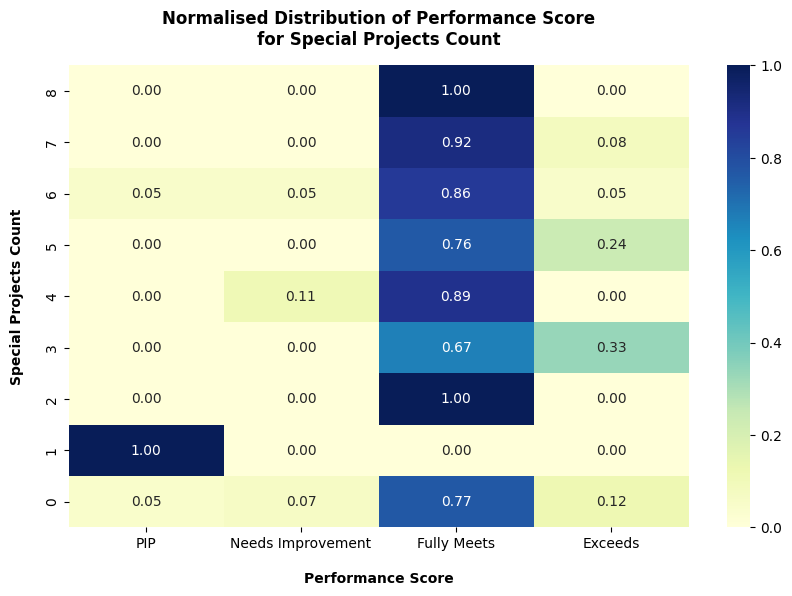

In [155]:
# Pivot the data to have 'PerformanceScore' as columns
pivot_table = performance_data.pivot(index='SpecialProjectsCount', columns='PerformanceScore', values='NormalisedCount').fillna(0)

# Sort rows by special projects count in ascending order
pivot_table_sorted = pivot_table.sort_index(ascending=False)

# Sort columns by performance score in descending order
pivot_table_sorted = pivot_table_sorted.sort_index(axis=1, ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_sorted, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xlabel('Performance Score', labelpad=15, fontweight='bold')
plt.ylabel('Special Projects Count', labelpad=15, fontweight='bold')
plt.title('Normalised Distribution of Performance Score\nfor Special Projects Count', pad=15, fontweight='bold')
plt.show()

**Majority Meet Targets:** Across various special projects counts, the majority of individuals tend to meet performance targets, as indicated by the high normalised counts for the "Fully Meets" performance score. This trend is consistent across different project counts.

**Exceptional Performance:** In cases where there are fewer special projects (SpecialProjectsCount=1, 2, 3, 4), there are instances where individuals receive an "Exceeds" performance score, especially when the number of special projects is relatively low. This indicates that a smaller workload might allow individuals to excel and exceed expectations.

**Actionable Insight - Training and Development for Improvement:**
Recognise that a small proportion of individuals receive a "Needs Improvement" or "PIP" performance score, representing only about 0.5% of the workforce. These individuals may require targeted training and development interventions to address performance gaps.
Allocate resources for training programs or coaching sessions to support individuals in improving their performance and moving towards meeting performance targets.

***

## Conclusion
[Back to Top](#Table-of-Contents:)

### Summary of the analysis

The analysis provided insights into various aspects of the organisation, including attrition rates, recruitment sources, employee satisfaction, performance scores, salary distributions, and their relationships with other variables like engagement, absenteeism, and project counts.

### Interesting Key Findings

**1.** A total of 311 workers were observed, with 207 actively employed and 104 inactive, leading to an overall attrition rate of 33.44%.

**2.** Among female workers, the attrition rate stands at 34.09%, while among male workers, it is slightly lower at 32.59%, indicating a slight gender disparity in turnover.

**3.** Identification of departments and managerial styles associated with high attrition rates, with the Production department attrition at 39.12% and some managers reaching as high as 62%.

**4.** Examination of recruitment sources by race, highlighting the effectiveness of events like "Diversity Job Fair"' for hiring Black or African American candidates.

**5.** Assessment of performance scores across different departments, indicating underperformance in "Sales" and "Production" departments, with average scores falling below the benchmark of "Fully Meets."

**6.** Exploration of salary satisfaction correlations, with higher satisfaction generally correlating with higher salaries.

**7.** Insights into absenteeism patterns reveal a potential link between workload intensity and employee absenteeism, particularly evident with an increase in absences after reaching a project count threshold of 2. Additionally, a concerning average absence of 20 is observed on employees' first (or only) assigned project.

**8.** Examination of performance scores in relation to special projects, revealing that the majority of individuals tend to meet performance targets across various project counts.

**9.** Workers aged 60 years and above exhibit the highest attrition rate, indicating potential challenges faced by older workers.

**10.** Black or African American workers have the highest attrition rate at 36.25%.

**11.** Workers with 0-5 years of experience show a 100% attrition rate, highlighting the importance of early career support.

**12.** The salary bins ranging from 100,000 to 120,000 and 120,000 to 140,000 demonstrate particularly high attrition rates, with rates reaching 50%.

**13.** Divorced and widowed workers exhibit higher attrition rates, being 53% and 50% respectively.

**14.** The mean salary for female Network Engineers, at 51,674.50, is substantially lower compared to their male counterparts, who earn an average of 68,225.33, indicating a significant gender-based pay disparity within this role.

### Actionable Insights

**Addressing Attrition Rates:** 
  
- Conduct comprehensive compensation analysis to ensure competitiveness in salary and benefits packages for workers earning between 100,000 to 140,000. Ensure that they are competitive compared to industry standards and offer attractive benefits and incentives to **retain talent**.
   
- Evaluate the **career development opportunities** available within the organisation for employees in the high-attrition salary range. Identify areas for improvement such as training programs, mentorship opportunities, or promotion pathways to increase employee engagement and retention.
   
- Identify **department-specific** issues in Production and Sales departments and develop targeted retention strategies tailored to each department's needs,where attrition rates exceed 30%.
   
- Explore reasons and implement targeted retention strategies for **older workers** (aged 60 years and above) , such as flexible work arrangements and mentoring programs.
   
- Provide robust onboarding programs and establish career development pathways for **early-career employees** with 0-5 years of experience.
   
- Offer support programs like employee assistance programs and flexible work policies to help employees maintain work-life balance for **divorced and widowed workers**. 

    
**Optimising Recruitment Sources:** 
- Leveraging diversity job fairs and optimising online platforms like Google Search, Indeed, and LinkedIn can **enhance diversity initiatives** and recruitment strategies.


**Improving Employee Satisfaction and Retention of Talent:** 
- Implement targeted retention strategies to maintain high satisfaction levels, rated at 5, and mitigate attrition, particularly focusing on employees within specific salary brackets, such as 130,000-140,000 and 220,000-230,000, to retain top talent
    
    
**Performance Scores:** 
- Implementing performance-based incentives and providing support to managers with high attrition rates are recommended actions to improve performance and retention rates.


**Salary-Satisfaction Correlation:** 
- Anomalies in salary satisfaction, such as lower satisfaction rates (4) despite higher salaries, warrant further investigation and potential compensation adjustments.


**Absenteeism Patterns:** 
- Mitigating the impact of workload intensity on absenteeism and conducting qualitative assessments for deeper insights into employee experiences are suggested actions to improve attendance and engagement.


**Special Projects and Performance:** 
- Implement support measures for employees handling a SpecialProjectsCount of 4 and 7 to mitigate potential burnout or increased workload. Ensure resources and assistance are readily available to manage concurrent projects effectively.

- Address the high attrition rate associated with a SpecialProjectsCount of 0 by enhancing employee engagement and motivation. Offer opportunities for skill development and career advancement to maintain job satisfaction and retention.


**Diversity and Inclusion Efforts:** 
- Implement diversity and inclusion programs to promote equal opportunities and address biases faced by under-represented groups.


**Gender Diversity and Retention Efforts:** 
- Implement initiatives to address the higher attrition rate among females, including conducting comprehensive exit interviews and employee surveys to pinpoint specific factors contributing to their attrition.
- Review salary structures and compensation policies meticulously to ensure gender equity and fairness. Address any discrepancies in salary distribution, especially within the salary range of 130,000 to 180,000, aiming to foster gender equality and alleviate potential concerns related to pay inequity. Pay particular attention to roles such as Network Engineer to ensure parity in compensation.

By implementing the actionable insights the organisation can effectively address challenges, enhance employee satisfaction, and improve overall performance and retention rates.